**Pierdamiano Zagaria** - Matricola **737752** - A.A. **2024/2025** - [**Repository**](https://github.com/Cry4775/csgo-round-winner-prediction)

# Introduzione
Questo progetto ha l’obiettivo di sviluppare un sistema avanzato per analizzare e prevedere l’esito dei round di gioco nel celebre sparatutto in prima persona **Counter-Strike: Global Offensive (CS:GO)**. Attraverso l’utilizzo di tecniche di apprendimento non supervisionato, apprendimento supervisionato, appredimento probabilistico e basi di conoscenza, l’analisi si concentrerà sui dati raccolti durante le partite competitive per fornire insight predittivi e strategici.

---

## Cos'é CS:GO?
**Counter-Strike: Global Offensive (CS:GO)** è uno sparatutto tattico a squadre in cui due team, i **Contro-Terroristi (CT)** e i **Terroristi (T)**, si affrontano in una serie di round. La modalità di gioco principale è **Bomb Defusal**, in cui il team Terrorista tenta di piazzare una bomba in uno dei siti designati, mentre i Contro-Terroristi cercano di impedirglielo o di disinnescare la bomba qualora venga piazzata.

### Composizione delle Squadre
Ogni squadra è composta da **5 giocatori**, per un totale di **10 partecipanti**. Le squadre competono in una partita al meglio di **30 round**: la prima squadra che ne vince **16** si aggiudica la vittoria. Ogni round dura al massimo **1 minuto e 55 secondi**.

- **Contro-Terroristi (CT)**: Proteggono i siti A e B dove i Terroristi possono piazzare la bomba. Hanno l'obiettivo di prevenire il piazzamento o disinnescare la bomba una volta attivata.
- **Terroristi (T)**: Devono piazzare la bomba in uno dei due siti e proteggerla fino all'esplosione (40 secondi), oppure eliminare tutti i Contro-Terroristi.

### Mappe di Gioco
Le partite si svolgono su una delle **7 mappe disponibili**, ognuna con layout unico che influisce sulle strategie adottabili.

### Fasi della Partita
- Una squadra inizia come Contro-Terroristi e l’altra come Terroristi. Dopo 15 round, le squadre scambiano i ruoli.
- Ogni round inizia con una fase chiamata **Freeze Time**, in cui i giocatori possono eventualmente spendere i crediti guadagnati nei round precedenti per equipaggiarsi. I tipi di acquisti variano a seconda delle strategie e del budget disponibile:
    - **Full Buy**: Acquisto completo di armi, armature, e utility (granate, kit di disinnesco).
    - **Force Buy**: Massimo acquisto possibile per le risorse limitate.
    - **Eco Round**: Risparmio intenzionale per accumulare risorse nei round successivi.
    
    Questa dinamica aggiunge un elemento di gestione economica che influisce sulle decisioni tattiche dei team.
- Il round si sviluppa in una serie di azioni tattiche fino al raggiungimento di uno degli obiettivi.
- Se la partita non si decide nei 30 round, si va ai **round di Overtime**.

---

## Dataset
Il dataset utilizzato é stato creato da Christian Lillelund e può essere scaricato da [Kaggle](https://www.kaggle.com/christianlillelund/csgo-round-winner-classification).
Il dataset è stato originariamente pubblicato da **Skybox** come parte del loro **CS:GO AI Challenge**, un evento che si è svolto dalla primavera all'autunno del 2020. I dati raccolti derivano da circa **700 demo** di partite giocate in tornei di alto livello negli anni **2019 e 2020**. 

### Caratteristiche del Dataset
1. **Filtraggio dei dati**:
   - Sono stati esclusi i round di riscaldamento (*warmup*) e i riavvii.
   - I dati si concentrano esclusivamente sui round attivi (*live rounds*).

2. **Struttura dei dati**:
   - Per ogni round attivo, è stato registrato uno snapshot ogni **20 secondi** fino alla conclusione del round.
   - I dati includono **122.411 snapshot** totali.

3. **Pre-elaborazione**:
   - Il dataset è stato pre-processato e appiattito per migliorare la leggibilità e facilitarne l’uso da parte degli algoritmi.

### Data Dictionary

Il dataset è costituito da snapshot indipendenti e identicamente distribuiti (*i.i.d.*), ciascuno dei quali descrive lo stato di un round specifico. È importante notare che:
- Ogni snapshot può essere trattato individualmente.
- Più snapshot possono derivare dallo stesso round, ma rappresentano momenti diversi.

| Variabile          | Definizione                                             | Note                                        |
|--------------------|---------------------------------------------------------|---------------------------------------------|
| `time_left`        | Tempo rimanente nel round corrente.                     | Misurato in secondi.                        |
| `ct_score`         | Punteggio attuale del team Contro-Terroristi.           |                                             |
| `t_score`          | Punteggio attuale del team Terroristi.                  |                                             |
| `map`              | Mappa su cui si gioca il round.                         | Es.: *de_dust2*, *de_inferno*.              |
| `bomb_planted`     | Stato della bomba (piazzata o no).                      | *False* = No, *True* = Sì.                  |
| `ct_health`        | Salute totale dei giocatori Contro-Terroristi.          | Valore per ogni giocatore: 0-100.           |
| `t_health`         | Salute totale dei giocatori Terroristi.                 | Valore per ogni giocatore: 0-100.           |
| `ct_armor`         | Armatura totale dei giocatori Contro-Terroristi.        | Valore per ogni giocatore: 0-100.           |
| `t_armor`          | Armatura totale dei giocatori Terroristi.               | Valore per ogni giocatore: 0-100.           |
| `ct_money`         | Totale del denaro del team Contro-Terroristi.           | Valore in USD.                              |
| `t_money`          | Totale del denaro del team Terroristi.                  | Valore in USD.                              |
| `ct_helmets`       | Numero di elmetti nel team Contro-Terroristi.           | Valori possibili: 0-5.                      |
| `t_helmets`        | Numero di elmetti nel team Terroristi.                  | Valori possibili: 0-5.                      |
| `ct_defuse_kits`   | Numero di kit di disinnesco nel team Contro-Terroristi. | Valori possibili: 0-5.                      |
| `ct_players_alive` | Numero di giocatori Contro-Terroristi vivi.             | Valori possibili: 0-5.                      |
| `t_players_alive`  | Numero di giocatori Terroristi vivi.                    | Valori possibili: 0-5.                      |
| `ct_weapon_X`      | Numero di armi di tipo X nel team Contro-Terroristi.    | Es.: *AK-47*, *Deagle*, *UMP-45*.           |
| `t_weapon_X`       | Numero di armi di tipo X nel team Terroristi.           | Es.: *AK-47*, *Deagle*, *UMP-45*.           |
| `ct_grenade_X`     | Numero di granate di tipo X nel team Contro-Terroristi. | Es.: *HeGrenade*, *Flashbang*.              |
| `t_grenade_X`      | Numero di granate di tipo X nel team Terroristi.        | Es.: *HeGrenade*, *Flashbang*.              |
| `round_winner`     | Vincitore del round.                                    | *CT* = Contro-Terroristi, *T* = Terroristi. |

L'obiettivo del sistema è prevedere l'etichetta **`round_winner`** (vincitore del round) basandosi sulle caratteristiche di ciascun snapshot.

---

## Fonti e risorse aggiuntive

- **Skybox Website**: [Skybox](https://skybox.gg/)
- **Informazioni su CS:GO**: [Wikipedia](https://en.wikipedia.org/wiki/Counter-Strike:_Global_Offensive)
- **CS:GO su Steam Store**: [Steam Store](https://store.steampowered.com/app/730/CounterStrike_Global_Offensive/)
- **Approfondimenti su CS:GO competitivo**: [HLTV](https://www.hltv.org/)

---

# Importazione delle dipendenze

In [1]:
import math
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.io as pio
import seaborn as sns
import xgboost as xg
import kaleido
from pyswip import Prolog
from kneed import KneeLocator
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix, recall_score, log_loss, roc_curve, roc_auc_score, silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.model_selection import learning_curve, train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from skopt import BayesSearchCV
from sklearn.feature_selection import SelectKBest, SelectFromModel

In [3]:
# Variabili e funzioni utili
color_ct = '#66b3ff'
color_t = '#ff9999'

pio.renderers.default = 'png'

def hyperparameter_search(models, param_grids, X_train, y_train, method="bayes", scoring='accuracy', cv=5, n_iter=50):
    """
    Esegue la ricerca degli iperparametri per una lista di modelli utilizzando BayesSearchCV o GridSearchCV.

    Parametri:
    - models (dict): Dizionario con nome del modello come chiave e modello come valore.
    - param_grids (dict): Dizionario con il nome del modello come chiave e i parametri di ricerca come valore.
    - X_train (array): Dati di training.
    - y_train (array): Target di training.
    - method (str): Metodo di ricerca ('bayes' o 'grid').
    - scoring (str): Metrica per valutare i modelli.
    - cv (int): Numero di fold per la cross-validation.
    - n_iter (int): Numero di iterazioni (solo per BayesSearchCV).

    Ritorna:
    - best_models (dict): Dizionario dei modelli con i migliori iperparametri.
    """
    best_models = {}

    for model_name, model in models.items():
        print(f"Ricerca degli iperparametri per {model_name} ({method})")

        # Configura la ricerca in base al metodo
        if method == "bayes":
            search = BayesSearchCV(
                model,
                param_grids[model_name],
                scoring=scoring,
                n_jobs=-1,
                cv=cv,
                n_iter=n_iter
            )
        elif method == "grid":
            search = GridSearchCV(
                model,
                param_grids[model_name],
                scoring=scoring,
                n_jobs=-1,
                cv=cv
            )
        else:
            raise ValueError("Metodo non valido. Usa 'bayes' o 'grid'.")

        # Esegui la ricerca
        search.fit(X_train, y_train)

        # Salva il modello migliore
        best_models[model_name] = search.best_estimator_

        # Stampa i risultati
        print(f"Iperparametri migliori per {model_name}: {search.best_params_}")
        print(f"Best {scoring}: {search.best_score_:.4f}")
        print()

    return best_models

def evaluate_models(models, X_train, y_train, X_test, y_test):
    """
    Addestra i modelli e calcola le metriche di valutazione su training e test set.
    Stampa inoltre le matrici di confusione come testo.

    Parametri:
    - models (dict): Dizionario con nome del modello come chiave e modello come valore.
    - X_train (array): Dati di training.
    - y_train (array): Target di training.
    - X_test (array): Dati di test.
    - y_test (array): Target di test.

    Ritorna:
    - score_test (DataFrame): Metriche sul test set.
    - score_train (DataFrame): Metriche sul training set.
    """
    # Crea DataFrame vuoti per memorizzare le metriche
    score_test = pd.DataFrame(columns=['Recall', 'Precision', 'F1 Score', 'Accuracy', 'Modello', 'Order'])
    score_train = pd.DataFrame(columns=['Recall', 'Precision', 'F1 Score', 'Accuracy', 'Modello', 'Order'])

    for order, (model_name, model) in enumerate(models.items()):
        print(f"\n{'='*40}")
        print(f"Addestramento e valutazione per il modello: {model_name}")
        print(f"{'='*40}\n")

        # Addestra il modello
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_train = model.predict(X_train)

        # Calcola le metriche sul test set
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # Calcola le metriche sul training set
        accuracy_train = accuracy_score(y_train, y_pred_train)
        precision_train = precision_score(y_train, y_pred_train)
        recall_train = recall_score(y_train, y_pred_train)
        f1_train = f1_score(y_train, y_pred_train)

        # Calcola le matrici di confusione
        conf_matrix_test = confusion_matrix(y_test, y_pred)
        conf_matrix_train = confusion_matrix(y_train, y_pred_train)

        # Stampa le matrici di confusione come testo
        print(f"Matrice di Confusione - {model_name} (Test):")
        print(conf_matrix_test)
        print(f"\nMatrice di Confusione - {model_name} (Train):")
        print(conf_matrix_train)

        # Aggiungi le metriche al DataFrame dei test set
        test_metrics = pd.DataFrame([(model_name + ' (Test)', recall, precision, f1, accuracy, order)],
                                    columns=['Modello', 'Recall', 'Precision', 'F1 Score', 'Accuracy', 'Order'])
        score_test = pd.concat([test_metrics, score_test], ignore_index=True)

        # Aggiungi le metriche al DataFrame dei training set
        train_metrics = pd.DataFrame([(model_name + ' (Train)', recall_train, precision_train, f1_train, accuracy_train, order)],
                                     columns=['Modello', 'Recall', 'Precision', 'F1 Score', 'Accuracy', 'Order'])
        score_train = pd.concat([train_metrics, score_train], ignore_index=True)

    # Ordina i DataFrame in base alla colonna "Order"
    score_test = score_test.sort_values(by='Order').drop(columns=['Order']).reset_index(drop=True)
    score_train = score_train.sort_values(by='Order').drop(columns=['Order']).reset_index(drop=True)

    # Stampa e ritorna i DataFrame
    print("\nMetriche sul Test Set:")
    print(score_test)

    print("\nMetriche sul Training Set:")
    print(score_train)

    return score_test, score_train

def evaluate_models_multiple(models_with_data):
    """
    Addestra modelli multipli, calcola metriche di valutazione su training e test set,
    e stampa le matrici di confusione.

    Parametri:
    - models_with_data (list): Lista di tuple nel formato 
                               (nome_modello, modello, X_train, y_train, X_test, y_test).

    Ritorna:
    - score_test (DataFrame): Metriche sul test set.
    - score_train (DataFrame): Metriche sul training set.
    """
    # Crea DataFrame vuoti per memorizzare le metriche
    score_test = pd.DataFrame(columns=['Recall', 'Precision', 'F1 Score', 'Accuracy', 'Modello'])
    score_train = pd.DataFrame(columns=['Recall', 'Precision', 'F1 Score', 'Accuracy', 'Modello'])

    for model_name, model, X_train, y_train, X_test, y_test in models_with_data:
        print(f"\n{'='*40}")
        print(f"Addestramento e valutazione per il modello: {model_name}")
        print(f"{'='*40}\n")

        # Addestra il modello
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_train = model.predict(X_train)

        # Calcola le metriche sul test set
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # Calcola le metriche sul training set
        accuracy_train = accuracy_score(y_train, y_pred_train)
        precision_train = precision_score(y_train, y_pred_train)
        recall_train = recall_score(y_train, y_pred_train)
        f1_train = f1_score(y_train, y_pred_train)

        # Calcola le matrici di confusione
        conf_matrix_test = confusion_matrix(y_test, y_pred)
        conf_matrix_train = confusion_matrix(y_train, y_pred_train)

        # Stampa le matrici di confusione come testo
        print(f"Matrice di Confusione - {model_name} (Test):")
        print(conf_matrix_test)
        print(f"\nMatrice di Confusione - {model_name} (Train):")
        print(conf_matrix_train)

        # Aggiungi le metriche al DataFrame del test set
        test_metrics = pd.DataFrame([{
            'Modello': model_name + ' (Test)',
            'Recall': recall,
            'Precision': precision,
            'F1 Score': f1,
            'Accuracy': accuracy
        }])
        score_test = pd.concat([score_test, test_metrics], ignore_index=True)

        # Aggiungi le metriche al DataFrame del training set
        train_metrics = pd.DataFrame([{
            'Modello': model_name + ' (Train)',
            'Recall': recall_train,
            'Precision': precision_train,
            'F1 Score': f1_train,
            'Accuracy': accuracy_train
        }])
        score_train = pd.concat([score_train, train_metrics], ignore_index=True)

    # Stampa le metriche finali
    print("\nMetriche sul Test Set:")
    print(score_test)
    print("\nMetriche sul Training Set:")
    print(score_train)

    return score_test, score_train

def compare_models(*model_scores, categories = None):
    """
    Combina e compara le metriche di più gruppi di modelli.

    Parametri:
    - model_scores: Lista di DataFrame con le metriche dei modelli.
    - categories (list): Lista di etichette per ogni gruppo di modelli.

    Ritorna:
    - combined_scores (DataFrame): DataFrame con tutte le metriche combinate e una colonna "Categoria".
    """
    combined_scores = pd.DataFrame()
    
    if categories is not None:
        for scores, category in zip(model_scores, categories):
            temp = scores.copy()
            temp['Categoria'] = category
            combined_scores = pd.concat([combined_scores, temp], ignore_index=True)
    else:
        for scores in model_scores:
            temp = scores.copy()
            combined_scores = pd.concat([combined_scores, temp], ignore_index=True)

    return combined_scores

def plot_histogram_comparison(combined_scores_train, combined_scores_test, metric):
    """
    Traccia un istogramma comparativo tra i risultati del training set e del test set per una specifica metrica.

    Parametri:
    - combined_scores_train (DataFrame): DataFrame combinato delle metriche sul training set.
    - combined_scores_test (DataFrame): DataFrame combinato delle metriche sul test set.
    - metric (str): Nome della metrica da comparare ('Accuracy', 'Recall', 'Precision', 'F1 Score').
    """
    # Rimuovi la parte "(Test)" o "(Train)" dai nomi dei modelli
    combined_scores_test['Modello'] = combined_scores_test['Modello'].str.replace(r'\s\(.*\)', '', regex=True)
    combined_scores_train['Modello'] = combined_scores_train['Modello'].str.replace(r'\s\(.*\)', '', regex=True)

    # Identifica i modelli e le categorie
    models = combined_scores_test['Modello'].unique()
    categories = combined_scores_test['Categoria'].unique()

    # Larghezza totale delle barre per ciascun gruppo di categorie
    bar_width = 0.2
    x = np.arange(len(models))  # Posizioni centrali per ciascun modello

    plt.figure(figsize=(12, 6))

    # Crea le barre per ogni categoria
    for idx, category in enumerate(categories):
        # Filtra i dati di training e test per questa categoria
        train_data = combined_scores_train[combined_scores_train['Categoria'] == category]
        test_data = combined_scores_test[combined_scores_test['Categoria'] == category]

        # Calcola la posizione delle barre per questa categoria
        bar_positions_train = x + idx * bar_width - (len(categories) * bar_width / 2)
        bar_positions_test = x + idx * bar_width - (len(categories) * bar_width / 2) + bar_width / 2

        # Barre del training set
        plt.bar(bar_positions_train, train_data[metric], bar_width / 2,
                label=f'{category} (Train)', alpha=0.7, color=f'C{idx * 2}')

        # Barre del test set
        plt.bar(bar_positions_test, test_data[metric], bar_width / 2,
                label=f'{category} (Test)', alpha=0.7, color=f'C{idx * 2 + 1}')

    # Configurazione del grafico
    plt.title(f'Confronto della {metric} tra Train e Test Set')
    plt.xlabel('Modelli')
    plt.ylabel(metric)
    plt.xticks(x, models, rotation=45, ha='right')
    plt.legend(loc='best')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.ylim(0.65, None)  # L'asse y parte da 0.65 e il limite superiore è automatico
    plt.tight_layout()
    plt.show()

def plot_train_test_gap(combined_scores_train, combined_scores_test, metric):
    """
    Traccia un istogramma che mostra il gap tra le metriche del training set e del test set per ogni modello.
    Mostra anche la metrica del test set direttamente sopra ogni barra.

    Parametri:
    - combined_scores_train (DataFrame): DataFrame combinato delle metriche sul training set.
    - combined_scores_test (DataFrame): DataFrame combinato delle metriche sul test set.
    - metric (str): Nome della metrica da comparare ('Accuracy', 'Recall', 'Precision', 'F1 Score').
    """

    combined_scores_train['Modello'] = combined_scores_train['Modello'].str.replace(r'\s\(.*\)', '', regex=True)
    combined_scores_test['Modello'] = combined_scores_test['Modello'].str.replace(r'\s\(.*\)', '', regex=True)


    # Calcola il gap tra train e test
    train_metrics = combined_scores_train[['Modello', 'Categoria', metric]].rename(columns={metric: 'Train'})
    test_metrics = combined_scores_test[['Modello', 'Categoria', metric]].rename(columns={metric: 'Test'})

    # Merge dei dati
    merged_metrics = pd.merge(train_metrics, test_metrics, on=['Modello', 'Categoria'])
    merged_metrics['Gap'] = merged_metrics['Train'] - merged_metrics['Test']

    # Identifica modelli e categorie
    models = merged_metrics['Modello'].unique()
    categories = merged_metrics['Categoria'].unique()

    # Posizioni delle barre
    x = np.arange(len(models))  # Posizioni centrali per ogni modello
    bar_width = 0.2  # Larghezza di ogni barra

    plt.figure(figsize=(12, 6))

    # Crea le barre per ciascuna categoria
    for idx, category in enumerate(categories):
        category_data = merged_metrics[merged_metrics['Categoria'] == category]
        bar_positions = x + idx * bar_width - (len(categories) - 1) * bar_width / 2

        bars = plt.bar(
            bar_positions,  # Posizione delle barre
            category_data['Gap'],  # Valore del gap
            width=bar_width,  # Larghezza della barra
            label=category,  # Nome della categoria
            alpha=0.8
        )

        # Aggiungi annotazioni con il valore del test set
        for bar, test_value in zip(bars, category_data['Test']):
            plt.text(
                bar.get_x() + bar.get_width() / 2,  # Posizione centrale della barra
                bar.get_height() + 0.001,  # Altezza leggermente sopra la barra
                f'{test_value:.3f}',  
                ha='center', va='bottom', fontsize=9, color='black'
            )

    # Configurazione del grafico
    plt.xticks(x, models, rotation=45, ha='right')  # Etichette per i modelli
    plt.title(f'Gap Train-Test per {metric}')
    plt.xlabel('Modelli')
    plt.ylabel(f'Gap {metric} (Train - Test)')
    plt.axhline(0, color='black', linestyle='--', linewidth=0.8)  # Linea di riferimento per il gap 0
    plt.legend(title='Categoria')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

def plot_learning_curves(models, X_train, y_train, cv=5, scoring='accuracy'):
    """
    Traccia le curve di apprendimento (accuracy e loss) per una lista di modelli.

    Parametri:
    - models (dict): Dizionario con nome del modello come chiave e modello come valore.
    - X_train (array): Dati di training.
    - y_train (array): Target di training.
    - cv (int): Numero di fold per la cross-validation.
    - scoring (str): Metrica di valutazione per la curva.
    """
    num_models = len(models)
    cols = 3  # Numero di colonne per riga
    rows = math.ceil(num_models / cols)  # Numero di righe necessarie

    # Crea il layout del plot
    fig, axes = plt.subplots(rows, cols, figsize=(24, 6 * rows))
    axes = axes.flatten()  

    for idx, (model_name, model) in enumerate(models.items()):
        print(f"Calcolo delle curve di apprendimento per {model_name}")

        # Calcolo delle curve di apprendimento
        train_sizes, train_scores, test_scores = learning_curve(
            model, X_train, y_train, cv=cv, n_jobs=-1, scoring=scoring, return_times=False
        )

        # Calcolo delle metriche di loss
        train_loss = []
        test_loss = []

        for train_size in train_sizes:
            # Suddividi i dati di training in base alla dimensione
            X_train_subset = X_train[:train_size]
            y_train_subset = y_train[:train_size]

            # Addestra il modello
            model.fit(X_train_subset, y_train_subset)

            # Calcola il log-loss sul training set
            train_prob = model.predict_proba(X_train_subset)
            train_loss.append(log_loss(y_train_subset, train_prob))

            # Calcola il log-loss sul test set
            test_prob = model.predict_proba(X_train)
            test_loss.append(log_loss(y_train, test_prob))

        # Media, deviazione standard e varianza
        train_mean = train_scores.mean(axis=1)
        test_mean = test_scores.mean(axis=1)
        train_std = train_scores.std(axis=1)
        test_std = test_scores.std(axis=1)

        # Traccia le curve di accuracy
        ax = axes[idx]
        ax.plot(train_sizes, train_mean, label='Train Accuracy', color='blue')
        ax.plot(train_sizes, test_mean, label='Test Accuracy', color='red')

        # Traccia le curve di loss
        ax.plot(train_sizes, train_loss, label='Train Loss', color='blue', linestyle='dashed')
        ax.plot(train_sizes, test_loss, label='Test Loss', color='red', linestyle='dashed')

        # Bande di deviazione standard
        ax.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2,
                        label='Train Std Dev')
        ax.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.2,
                        label='Test Std Dev')

        # Configurazione del grafico
        ax.set_title(f'Curva di Apprendimento per {model_name}')
        ax.set_xlabel('Dimensione del Training Set')
        ax.set_ylabel('Score / Loss')
        ax.legend(loc='best')
        ax.grid(True)

    # Rimuove i plot vuoti, se il numero di modelli non è divisibile per 3
    for i in range(idx + 1, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

def plot_learning_curves_multiple(models_with_data, cv=5, scoring='accuracy'):
    """
    Traccia le curve di apprendimento (accuracy e log-loss) per una lista di modelli con i rispettivi set di training.

    Parametri:
    - models_with_data (list): Lista di tuple: (nome_modello, modello, X_train, y_train).
                               Esempio: [('Modello1', modello1, X_train1, y_train1), ...]
    - cv (int): Numero di fold per la cross-validation.
    - scoring (str): Metrica di valutazione per la curva.

    Ritorna:
    - Nessun valore di ritorno. Visualizza direttamente i grafici.
    """
    num_models = len(models_with_data)
    cols = 3  # Numero di colonne per riga
    rows = math.ceil(num_models / cols)  # Numero di righe necessarie

    # Crea il layout dei grafici
    fig, axes = plt.subplots(rows, cols, figsize=(24, 6 * rows))
    axes = axes.flatten()

    for idx, (model_name, model, X_train, y_train) in enumerate(models_with_data):
        print(f"Calcolo delle curve di apprendimento per {model_name}...")

        # Calcolo delle curve di apprendimento
        train_sizes, train_scores, test_scores = learning_curve(
            model, X_train, y_train, cv=cv, n_jobs=-1, scoring=scoring, return_times=False
        )

        # Calcolo delle metriche di loss
        train_loss = []
        test_loss = []

        for train_size in train_sizes:
            # Suddividi i dati di training in base alla dimensione
            X_train_subset = X_train[:train_size]
            y_train_subset = y_train[:train_size]

            # Addestra il modello
            model.fit(X_train_subset, y_train_subset)

            # Calcola il log-loss sul training set
            train_prob = model.predict_proba(X_train_subset)
            train_loss.append(log_loss(y_train_subset, train_prob))

            # Calcola il log-loss sul test set
            test_prob = model.predict_proba(X_train)
            test_loss.append(log_loss(y_train, test_prob))

        # Media, deviazione standard e varianza
        train_mean = train_scores.mean(axis=1)
        test_mean = test_scores.mean(axis=1)
        train_std = train_scores.std(axis=1)
        test_std = test_scores.std(axis=1)

        # Traccia le curve di accuracy
        ax = axes[idx]
        ax.plot(train_sizes, train_mean, label='Train Accuracy', color='blue')
        ax.plot(train_sizes, test_mean, label='Test Accuracy', color='red')

        # Traccia le curve di loss
        ax.plot(train_sizes, train_loss, label='Train Loss', color='blue', linestyle='dashed')
        ax.plot(train_sizes, test_loss, label='Test Loss', color='red', linestyle='dashed')

        # Bande di deviazione standard
        ax.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2,
                        label='Train Std Dev')
        ax.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.2,
                        label='Test Std Dev')

        # Configurazione del grafico
        ax.set_title(f'Curva di Apprendimento per {model_name}')
        ax.set_xlabel('Dimensione del Training Set')
        ax.set_ylabel('Score / Loss')
        ax.legend(loc='best')
        ax.grid(True)

    # Rimuove i plot vuoti se il numero di modelli non è divisibile per 3
    for i in range(idx + 1, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

def plot_roc_auc(models, X_test, y_test):
    """
    Confronta i modelli tracciando le curve ROC e calcolando l'AUC.

    Parametri:
    - models (dict): Dizionario con nome del modello come chiave e modello addestrato come valore.
    - X_test (array): Dati di test.
    - y_test (array): Target di test.

    Ritorna:
    - auc_scores (dict): Dizionario con i nomi dei modelli e il corrispondente ROC-AUC score.
    """
    plt.figure(figsize=(10, 8))
    auc_scores = {}

    for model_name, model in models.items():
        # Predizione delle probabilità positive (classe 1)
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test)[:, 1]
        else:
            # Usa decision_function se predict_proba non è disponibile
            y_proba = model.decision_function(X_test)
        
        # Calcola la curva ROC e l'AUC
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc_score = roc_auc_score(y_test, y_proba)
        auc_scores[model_name] = auc_score

        # Traccia la curva ROC
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.3f})')

    # Configurazione del grafico
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Linea diagonale
    plt.title('Confronto delle Curve ROC-AUC')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.legend(loc='lower right')
    plt.grid(alpha=0.4)
    plt.tight_layout()
    plt.show()

    # Stampa i punteggi AUC
    print("Punteggi ROC-AUC per ciascun modello:")
    for model_name, auc in auc_scores.items():
        print(f"{model_name}: {auc:.3f}")

    return auc_scores

def plot_roc_auc_multiple(models_with_data):
    """
    Confronta i modelli tracciando le curve ROC e calcolando l'AUC.

    Parametri:
    - models_with_data (list): Una lista di tuple, dove ogni elemento è (nome_modello, modello, X_test, y_test).
                               Ad esempio: [('Model1', modello1, X_test1, y_test1), ...]
    
    Ritorna:
    - roc_auc_scores (dict): Dizionario con il nome del modello e il relativo valore di AUC.
    """
    plt.figure(figsize=(10, 7))
    roc_auc_scores = {}

    for model_name, model, X_test, y_test in models_with_data:
        # Predizione delle probabilità
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test)[:, 1]  # Probabilità della classe positiva
        else:
            # Per modelli che non supportano predict_proba, usa decision_function
            y_prob = model.decision_function(X_test)

        # Calcolo ROC-AUC
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = roc_auc_score(y_test, y_prob)
        roc_auc_scores[model_name] = roc_auc

        # Traccia la curva ROC
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.3f})')

    # Configurazione del grafico
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Confronto ROC-AUC tra modelli')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()
    
    # Stampa i punteggi AUC
    print("Punteggi ROC-AUC per ciascun modello:")
    for model_name, auc in roc_auc_scores.items():
        print(f"{model_name}: {auc:.3f}")

    return roc_auc_scores

Carichiamo il dataset:

In [4]:
DATASET_PATH = 'datasets/csgo_round_snapshots.csv'

In [5]:
df = pd.read_csv(DATASET_PATH)

In [6]:
df.head()

time_left  ct_score  t_score       map  bomb_planted  ct_health  t_health  \
0     175.00       0.0      0.0  de_dust2         False      500.0     500.0   
1     156.03       0.0      0.0  de_dust2         False      500.0     500.0   
2      96.03       0.0      0.0  de_dust2         False      391.0     400.0   
3      76.03       0.0      0.0  de_dust2         False      391.0     400.0   
4     174.97       1.0      0.0  de_dust2         False      500.0     500.0   

   ct_armor  t_armor  ct_money  ...  t_grenade_flashbang  \
0       0.0      0.0    4000.0  ...                  0.0   
1     400.0    300.0     600.0  ...                  0.0   
2     294.0    200.0     750.0  ...                  0.0   
3     294.0    200.0     750.0  ...                  0.0   
4     192.0      0.0   18350.0  ...                  0.0   

   ct_grenade_smokegrenade  t_grenade_smokegrenade  \
0                      0.0                     0.0   
1                      0.0                     2.0   
2                      0.0                     2.0   
3                      0.0                     0.0   
4                      0.0                     0.0   

   ct_grenade_incendiarygrenade  t_grenade_incendiarygrenade  \
0                           0.0                          0.0   
1                           0.0                          0.0   
2                           0.0                          0.0   
3                           0.0                          0.0   
4                           0.0                          0.0   

   ct_grenade_molotovgrenade  t_grenade_molotovgrenade  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

   ct_grenade_decoygrenade  t_grenade_decoygrenade  round_winner  
0                      0.0                     0.0            CT  
1                      0.0                     0.0            CT  
2                      0.0                     0.0            CT  
3                      0.0                     0.0            CT  
4                      0.0                     0.0            CT  

[5 rows x 97 columns]

---

# Preprocessing e analisi
## Gestione dei valori nulli e duplicati

In [7]:
# Controlliamo se ci sono valori nulli
df.isnull().sum()

time_left                    0
ct_score                     0
t_score                      0
map                          0
bomb_planted                 0
                            ..
ct_grenade_molotovgrenade    0
t_grenade_molotovgrenade     0
ct_grenade_decoygrenade      0
t_grenade_decoygrenade       0
round_winner                 0
Length: 97, dtype: int64

In [8]:
# Controlliamo se ci sono duplicati
df.duplicated().sum()

np.int64(4962)

Durante l'analisi preliminare del dataset, abbiamo rilevato quanto segue:

- **Valori nulli**: Nessun valore nullo è presente nel dataset.
- **Duplicati**: Sono state trovate **4962** righe duplicate.

In effetti il dataset include snapshot presi durante i periodi di **time-out** nel gioco. Questo significa che, in alcuni casi, i dati catturati non rappresentano variazioni significative nel round e risultano identici a snapshot precedenti.


In [9]:
df.drop_duplicates(inplace=True)

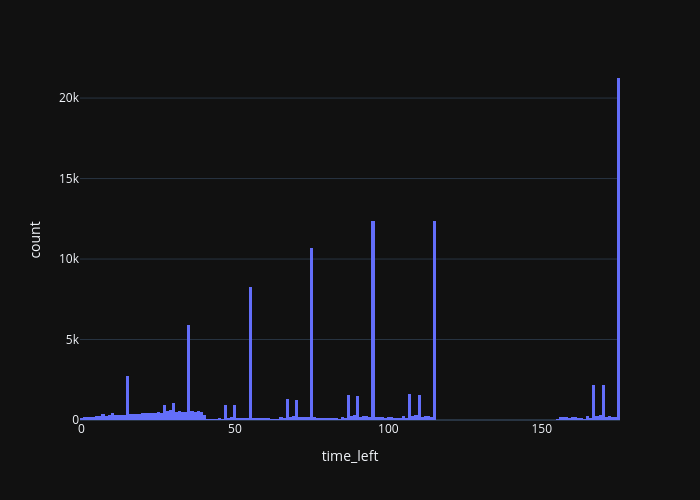

In [10]:
fig = px.histogram(df, "time_left")
fig.show()

Sappiamo che gli snapshot sono stati catturati ogni **20 secondi** durante i round attivi, e il tempo rimanente (`time_left`) dovrebbe teoricamente variare tra **0 e 115 secondi**, corrispondenti alla durata massima di un round. Tuttavia, il grafico sopra rivela la presenza di valori di `time_left` superiori a **115 secondi**, che si riferiscono a snapshot catturati durante fasi iniziali o pause del round attivo, come i periodi di **time-out** o il **freeze-time**.

Queste fasi, pur facendo tecnicamente parte del round attivo e pur non essendo duplicati, non riflettono momenti significativi per l'analisi, poiché i giocatori non hanno ancora completato gli acquisti. Includere questi dati potrebbe quindi introdurre rumore, riducendo l'affidabilità dei modelli. Per migliorare la qualità dell'analisi, è opportuno **eliminare tutte le righe con `time_left` superiore a 115 secondi**, limitando il dataset alle sole fasi attive e significative del round.



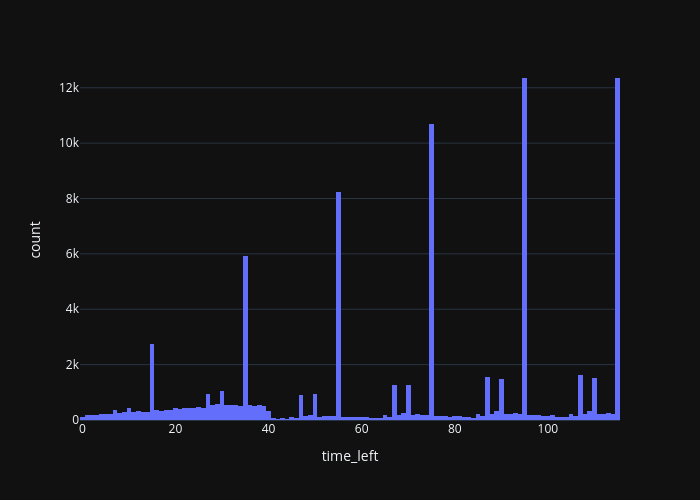

In [11]:
df = df[df['time_left'] <= 115]

fig = px.histogram(df, "time_left")
fig.show()

## Gestione delle colonne costanti
Effettuiamo un controllo sulle colonne per identificare quelle con un unico valore univoco. Queste colonne rappresentano feature che non apportano alcuna informazione significativa al modello di machine learning.

In [12]:
# Identifica le colonne con un solo valore univoco
unique_counts = df.nunique()

# Trova gli indici delle colonne con un solo valore univoco
constant_columns = unique_counts[unique_counts == 1].index

# Stampa gli indici delle colonne costanti
print("Colonne con un solo valore univoco:", constant_columns.tolist())

Colonne con un solo valore univoco: ['ct_weapon_bizon', 'ct_weapon_g3sg1', 't_weapon_m249', 'ct_weapon_negev', 'ct_weapon_r8revolver', 'ct_weapon_sawedoff', 't_weapon_scar20']


<Axes: xlabel='ct_weapon_bizon', ylabel='count'>

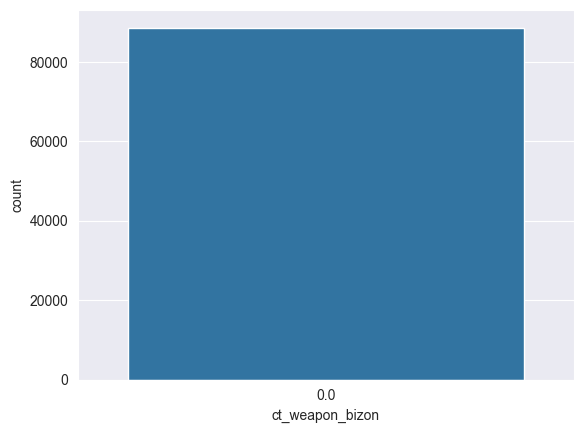

In [13]:
sns.countplot(x='ct_weapon_bizon', data=df)

Possiamo osservare che le colonne relative a equipaggiamenti non utilizzati (es. `ct_weapon_bizon`) contengono un solo valore univoco. Questo significa che nessun giocatore ha utilizzato quell'equipaggiamento durante i round catturati, di conseguenza queste colonne non forniscono alcuna **informazione** utile per il modello di machine learning.

Possiamo quindi procedere all'eliminazione di queste colonne dal dataset, in modo da ridurre la dimensionalità e migliorare le prestazioni del modello.

In [14]:
df.drop(columns=constant_columns, inplace=True)
df.head()

time_left  ct_score  t_score       map  bomb_planted  ct_health  t_health  \
2      96.03       0.0      0.0  de_dust2         False      391.0     400.0   
3      76.03       0.0      0.0  de_dust2         False      391.0     400.0   
5     114.97       1.0      0.0  de_dust2         False      500.0     500.0   
6      94.97       1.0      0.0  de_dust2         False      295.0     111.0   
7      74.97       1.0      0.0  de_dust2         False      295.0     111.0   

   ct_armor  t_armor  ct_money  ...  t_grenade_flashbang  \
2     294.0    200.0     750.0  ...                  0.0   
3     294.0    200.0     750.0  ...                  0.0   
5     500.0      0.0    1750.0  ...                  0.0   
6     296.0      0.0    1700.0  ...                  0.0   
7     296.0      0.0    1700.0  ...                  0.0   

   ct_grenade_smokegrenade  t_grenade_smokegrenade  \
2                      0.0                     2.0   
3                      0.0                     0.0   
5                      3.0                     0.0   
6                      1.0                     0.0   
7                      1.0                     0.0   

   ct_grenade_incendiarygrenade  t_grenade_incendiarygrenade  \
2                           0.0                          0.0   
3                           0.0                          0.0   
5                           1.0                          0.0   
6                           0.0                          0.0   
7                           0.0                          0.0   

   ct_grenade_molotovgrenade  t_grenade_molotovgrenade  \
2                        0.0                       0.0   
3                        0.0                       0.0   
5                        0.0                       0.0   
6                        0.0                       0.0   
7                        0.0                       0.0   

   ct_grenade_decoygrenade  t_grenade_decoygrenade  round_winner  
2                      0.0                     0.0            CT  
3                      0.0                     0.0            CT  
5                      0.0                     0.0            CT  
6                      0.0                     0.0            CT  
7                      0.0                     0.0            CT  

[5 rows x 90 columns]

## Gestione dei dati insufficienti
Il dataset contiene dati relativi a diversi round giocati su varie mappe, rappresentate dalla colonna `map`. Verifichiamo che ogni mappa abbia un numero sufficiente di dati per garantire un'analisi e una modellazione affidabili.


In [15]:
# Controlliamo se ci sono abbastanza dati per ogni mappa
map_counts = df['map'].value_counts()

# Visualizza il conteggio
print("Numero di dati per ogni mappa:")
print(map_counts)


Numero di dati per ogni mappa:
map
de_inferno     17704
de_dust2       16003
de_nuke        13407
de_mirage      13334
de_overpass    10279
de_train        9609
de_vertigo      8241
de_cache         117
Name: count, dtype: int64


Dall'analisi dei conteggi per ogni mappa, è emerso che la mappa `"de_cache"` contiene un numero di dati significativamente inferiore rispetto alle altre. Con solo **117 istanze**, rispetto alle migliaia di dati presenti per le altre mappe, `"de_cache"` è considerata sottorappresentata.
Questo accade perché probabilmente la mappa `"de_cache"` è stata reinserita (o al contrario, rimossa) nel pool ufficiale di mappe (composto da 7 mappe) giocate nei tornei professionistici di CS:GO, alla fine del periodo di acquisizione dei dati (o all'inizio).

Un numero di dati così limitato non consente al modello di apprendere pattern significativi relativi a questa mappa, inoltre la presenza di una mappa con pochi dati potrebbe sbilanciare il processo di apprendimento, introducendo rumore e riducendo l'accuratezza complessiva del modello.

Procediamo, quindi, alla rimozione di tutte le istanze associate alla mappa `"de_cache"` per garantire che il dataset sia bilanciato e rappresentativo delle mappe principali.

In [16]:
df = df[df['map'] != 'de_cache']

# Conferma la rimozione
print("Distribuzione aggiornata delle mappe:")
print(df['map'].value_counts())

Distribuzione aggiornata delle mappe:
map
de_inferno     17704
de_dust2       16003
de_nuke        13407
de_mirage      13334
de_overpass    10279
de_train        9609
de_vertigo      8241
Name: count, dtype: int64


## Correzione degli errori noti sul dataset
Nel dataset sono stati segnalati errori noti, relativi al conteggio delle armi per alcune categorie. In particolare, le seguenti variabili contengono valori che superano il limite massimo di 5 armi per giocatore, il che non è possibile secondo le regole del gioco:

- `t_weapon_cz75auto`
- `t_weapon_glock`
- `ct_weapon_usps`

Questi valori anomali indicano errori nei dati e potrebbero compromettere la qualità dell'analisi e la precisione del modello.

Procediamo quindi all'eliminazione delle relative righe, per migliorare l'integrità e l'affidabilità del dataset.

In [17]:
# Stampa il numero di righe che verranno eliminate
print("Numero di righe anomale:",
      len(df[(df['t_weapon_cz75auto'] > 5) | (df['t_weapon_glock'] > 5) | (df['ct_weapon_usps'] > 5)]))

df.drop(df[(df['t_weapon_cz75auto'] > 5) | (df['t_weapon_glock'] > 5) | (df['ct_weapon_usps'] > 5)].index, inplace=True)
df.head()

Numero di righe anomale: 0


time_left  ct_score  t_score       map  bomb_planted  ct_health  t_health  \
2      96.03       0.0      0.0  de_dust2         False      391.0     400.0   
3      76.03       0.0      0.0  de_dust2         False      391.0     400.0   
5     114.97       1.0      0.0  de_dust2         False      500.0     500.0   
6      94.97       1.0      0.0  de_dust2         False      295.0     111.0   
7      74.97       1.0      0.0  de_dust2         False      295.0     111.0   

   ct_armor  t_armor  ct_money  ...  t_grenade_flashbang  \
2     294.0    200.0     750.0  ...                  0.0   
3     294.0    200.0     750.0  ...                  0.0   
5     500.0      0.0    1750.0  ...                  0.0   
6     296.0      0.0    1700.0  ...                  0.0   
7     296.0      0.0    1700.0  ...                  0.0   

   ct_grenade_smokegrenade  t_grenade_smokegrenade  \
2                      0.0                     2.0   
3                      0.0                     0.0   
5                      3.0                     0.0   
6                      1.0                     0.0   
7                      1.0                     0.0   

   ct_grenade_incendiarygrenade  t_grenade_incendiarygrenade  \
2                           0.0                          0.0   
3                           0.0                          0.0   
5                           1.0                          0.0   
6                           0.0                          0.0   
7                           0.0                          0.0   

   ct_grenade_molotovgrenade  t_grenade_molotovgrenade  \
2                        0.0                       0.0   
3                        0.0                       0.0   
5                        0.0                       0.0   
6                        0.0                       0.0   
7                        0.0                       0.0   

   ct_grenade_decoygrenade  t_grenade_decoygrenade  round_winner  
2                      0.0                     0.0            CT  
3                      0.0                     0.0            CT  
5                      0.0                     0.0            CT  
6                      0.0                     0.0            CT  
7                      0.0                     0.0            CT  

[5 rows x 90 columns]

## Codifica delle Variabili categoriche
Nel nostro dataset, alcune variabili sono categoriche e devono essere trasformate in un formato numerico prima di poter essere utilizzate nei modelli di machine learning. Questo processo, noto come **encoding**, permette di rappresentare valori testuali (es. `"de_dust2"` o `"True"`) come numeri, preservando le relazioni e le informazioni originali.

In questo caso, utilizzeremo tecniche di encoding diverse in base alle caratteristiche di ciascuna variabile categorica:

- **One-Hot Encoding** per la variabile `map`, perché é una variabile categorica nominale. In altre parole, non esiste un ordine intrinseco tra le categorie, quindi vogliamo rappresentare ciascuna mappa come una colonna binaria.
- **Label Encoding** per le variabili `bomb_planted` e `round_winner`, perché hanno solo due stati possibili.

In [18]:
# Crea un LabelEncoder separato per ogni variabile categorica a eccezione di 'map' dove utilizzeremo OneHotEncoder
map_encoder = preprocessing.OneHotEncoder(sparse_output=False)
bomb_encoder = preprocessing.LabelEncoder()
winner_encoder = preprocessing.LabelEncoder()

# One-Hot Encoding
map_encoded = map_encoder.fit_transform(df[['map']])
# Converti in DataFrame con i nomi delle colonne basati sulle categorie
map_encoded_df = pd.DataFrame(map_encoded, columns=map_encoder.get_feature_names_out(['map']))

# Reimpostiamo gli indici dopo aver precedentemente rimosso le righe dal DataFrame
df.reset_index(drop=True, inplace=True)
# Aggiungi le colonne One-Hot al DataFrame originale
df = pd.concat([df, map_encoded_df], axis=1)
# Ora 'map' è stata sostituita da colonne One-Hot quindi possiamo rimuovere la colonna originale
df.drop('map', axis=1, inplace=True)

df['bomb_planted'] = bomb_encoder.fit_transform(df['bomb_planted'])
df['round_winner'] = winner_encoder.fit_transform(df['round_winner'])

df.head()

time_left  ct_score  t_score  bomb_planted  ct_health  t_health  ct_armor  \
0      96.03       0.0      0.0             0      391.0     400.0     294.0   
1      76.03       0.0      0.0             0      391.0     400.0     294.0   
2     114.97       1.0      0.0             0      500.0     500.0     500.0   
3      94.97       1.0      0.0             0      295.0     111.0     296.0   
4      74.97       1.0      0.0             0      295.0     111.0     296.0   

   t_armor  ct_money  t_money  ...  ct_grenade_decoygrenade  \
0    200.0     750.0    500.0  ...                      0.0   
1    200.0     750.0    500.0  ...                      0.0   
2      0.0    1750.0  10550.0  ...                      0.0   
3      0.0    1700.0   5000.0  ...                      0.0   
4      0.0    1700.0   5000.0  ...                      0.0   

   t_grenade_decoygrenade  round_winner  map_de_dust2  map_de_inferno  \
0                     0.0             0           1.0             0.0   
1                     0.0             0           1.0             0.0   
2                     0.0             0           1.0             0.0   
3                     0.0             0           1.0             0.0   
4                     0.0             0           1.0             0.0   

   map_de_mirage  map_de_nuke  map_de_overpass  map_de_train  map_de_vertigo  
0            0.0          0.0              0.0           0.0             0.0  
1            0.0          0.0              0.0           0.0             0.0  
2            0.0          0.0              0.0           0.0             0.0  
3            0.0          0.0              0.0           0.0             0.0  
4            0.0          0.0              0.0           0.0             0.0  

[5 rows x 96 columns]

In [19]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88577 entries, 0 to 88576
Data columns (total 96 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   time_left                     88577 non-null  float64
 1   ct_score                      88577 non-null  float64
 2   t_score                       88577 non-null  float64
 3   bomb_planted                  88577 non-null  int64  
 4   ct_health                     88577 non-null  float64
 5   t_health                      88577 non-null  float64
 6   ct_armor                      88577 non-null  float64
 7   t_armor                       88577 non-null  float64
 8   ct_money                      88577 non-null  float64
 9   t_money                       88577 non-null  float64
 10  ct_helmets                    88577 non-null  float64
 11  t_helmets                     88577 non-null  float64
 12  ct_defuse_kits                88577 non-null  float64
 13  c

time_left      ct_score       t_score  bomb_planted     ct_health  \
count  88577.000000  88577.000000  88577.000000  88577.000000  88577.000000   
mean      69.285562      6.702180      6.766971      0.154363    378.940233   
std       33.439078      4.833709      4.862175      0.361298    141.915446   
min        0.010000      0.000000      0.000000      0.000000      1.000000   
25%       35.220000      3.000000      3.000000      0.000000    291.000000   
50%       74.920000      6.000000      6.000000      0.000000    436.000000   
75%       94.950000     10.000000     10.000000      0.000000    500.000000   
max      115.000000     32.000000     33.000000      1.000000    500.000000   

           t_health      ct_armor       t_armor      ct_money       t_money  \
count  88577.000000  88577.000000  88577.000000  88577.000000  88577.000000   
mean     365.899669    348.643937    342.766982   7254.541247   8677.800671   
std      148.558705    155.048734    152.899752   9018.894580  10074.433811   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%      264.000000    200.000000    251.000000    900.000000   1200.000000   
50%      403.000000    399.000000    391.000000   3850.000000   5050.000000   
75%      500.000000    492.000000    482.000000  10600.000000  12100.000000   
max      500.000000    500.000000    500.000000  72450.000000  68300.000000   

       ...  ct_grenade_decoygrenade  t_grenade_decoygrenade  round_winner  \
count  ...             88577.000000            88577.000000  88577.000000   
mean   ...                 0.030267                0.027264      0.519164   
std    ...                 0.177410                0.168510      0.499635   
min    ...                 0.000000                0.000000      0.000000   
25%    ...                 0.000000                0.000000      0.000000   
50%    ...                 0.000000                0.000000      1.000000   
75%    ...                 0.000000                0.000000      1.000000   
max    ...                 3.000000                2.000000      1.000000   

       map_de_dust2  map_de_inferno  map_de_mirage   map_de_nuke  \
count  88577.000000    88577.000000   88577.000000  88577.000000   
mean       0.180668        0.199871       0.150536      0.151360   
std        0.384745        0.399906       0.357598      0.358401   
min        0.000000        0.000000       0.000000      0.000000   
25%        0.000000        0.000000       0.000000      0.000000   
50%        0.000000        0.000000       0.000000      0.000000   
75%        0.000000        0.000000       0.000000      0.000000   
max        1.000000        1.000000       1.000000      1.000000   

       map_de_overpass  map_de_train  map_de_vertigo  
count     88577.000000  88577.000000    88577.000000  
mean          0.116046      0.108482        0.093038  
std           0.320282      0.310990        0.290487  
min           0.000000      0.000000        0.000000  
25%           0.000000      0.000000        0.000000  
50%           0.000000      0.000000        0.000000  
75%           0.000000      0.000000        0.000000  
max           1.000000      1.000000        1.000000  

[8 rows x 96 columns]

## Aggregazione delle armi per categoria
Nel dataset, le armi sono rappresentate da variabili separate per ogni tipologia, ad esempio:
- `t_weapon_ak47`
- `ct_weapon_awp`
- `ct_weapon_m4a4`

Questa granularità offre un alto livello di dettaglio, ma presenta alcuni problemi:
1. **Elevata dimensionalità**: Un numero elevato di variabili aumenta la complessità del modello e potrebbe introdurre rumore.
2. **Bassa utilità di alcune feature**: Molte armi sono poco utilizzate, e mantenerle separatamente non apporta valore informativo significativo.
3. **Rischio di overfitting**: Un modello addestrato su dati troppo specifici potrebbe non generalizzare bene su nuovi dati.
4. **Minore interpretabilità**: Un modello con troppe feature può essere difficile da interpretare.


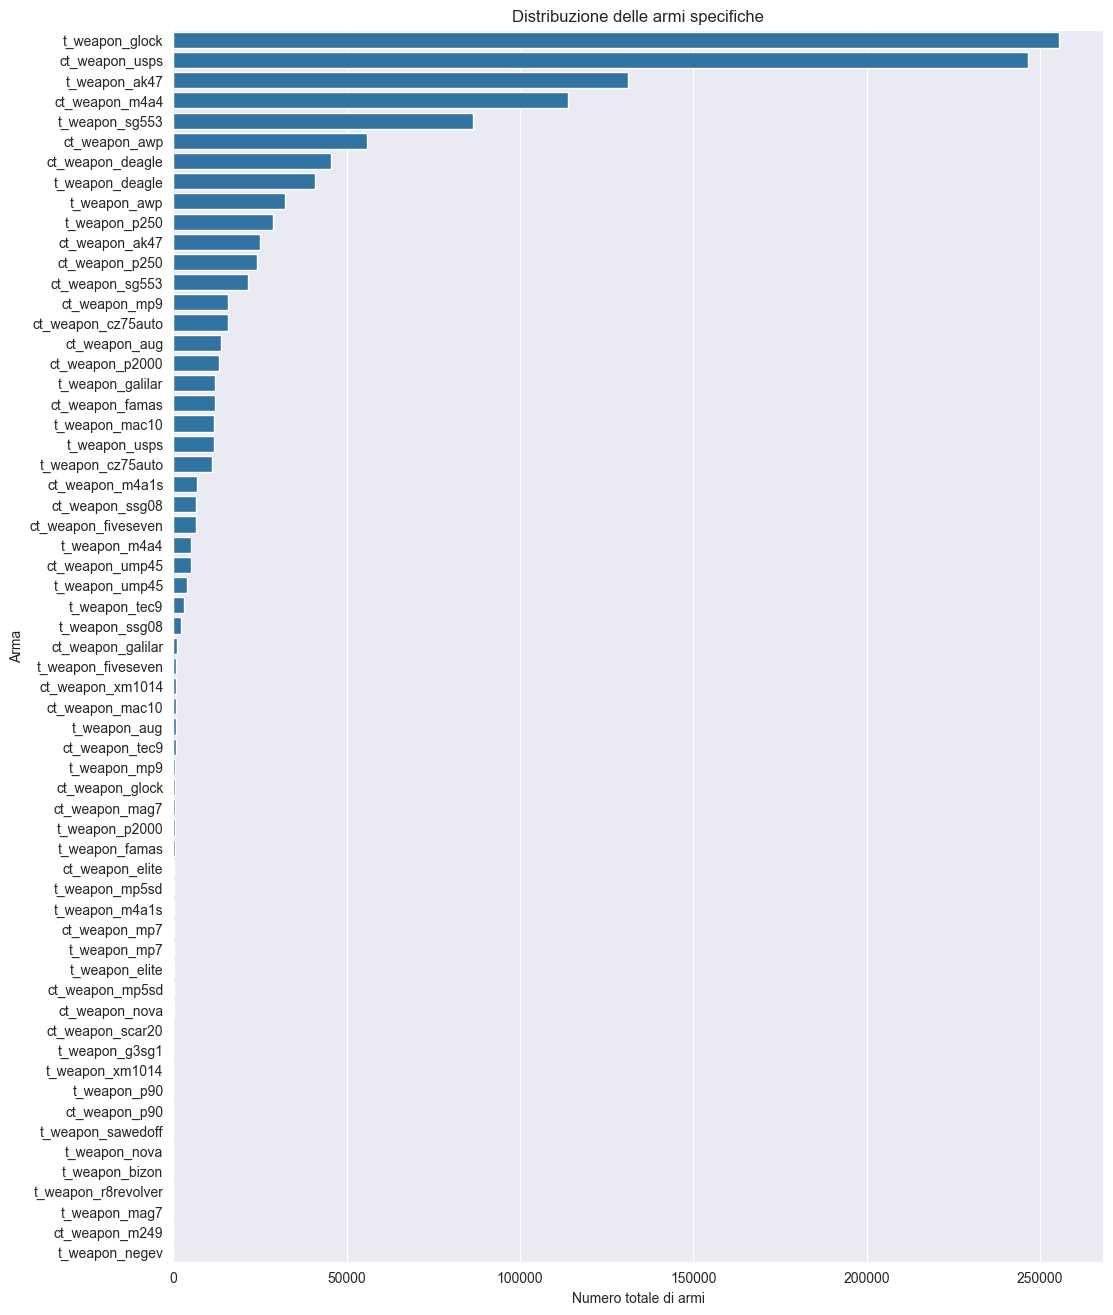

In [20]:
# Lista di colonne delle armi
weapon_columns = [col for col in df.columns if col.startswith('t_weapon') or col.startswith('ct_weapon')]

# Calcola la somma di ogni arma per ciascuna riga (giocatore)
weapon_sums = df[weapon_columns].sum()

# Ordina le armi in base alla frequenza di utilizzo
weapon_sums_sorted = weapon_sums.sort_values(ascending=False)

# Visualizza la distribuzione delle armi
plt.figure(figsize=(12, 16))
sns.barplot(x=weapon_sums_sorted.values, y=weapon_sums_sorted.index)
plt.title('Distribuzione delle armi specifiche')
plt.xlabel('Numero totale di armi')
plt.ylabel('Arma')
plt.show()

Come possiamo osservare, alcune armi appaiono come praticamente inutilizzate, ma questa è una caratteristica giustificata dal loro ruolo nel gioco. Ad esempio, `ct_weapon_glock` è l'arma di default per i Terroristi e non è acquistabile dai Contro-Terroristi, il che ne spiega il basso utilizzo tra le fila di quest'ultima squadra. Al contrario, armi come `t_weapon_negev`, pur essendo acquistabili da entrambe le squadre, sono raramente utilizzate. Questo comportamento può invece essere attribuito a fattori strategici, come la bassa efficacia in certe situazioni di gioco o il costo elevato rispetto ad altre armi più versatili.

Le armi verranno quindi raggruppato nelle seguenti categorie, per `ct` e `t`:
- **`rifle`**: Include fucili d'assalto come AK-47, M4A4, ecc.
- **`sniper`**: Include fucili di precisione come AWP, SSG 08, ecc.
- **`smg`**: Include mitragliette come MP9, UMP-45, ecc.
- **`default`**: Include armi di default ovvero USP-S, P2000 e Glock.
- **`pistol`**: Include pistole come Five-Seven, Deagle, ecc.
- **`heavy`**: Include armi pesanti come M249, Negev, ecc.
- **`shotgun`**: Include fucili a pompa come Nova, XM1014, ecc.

Verranno aggregate anche `grenade_incendiarygrenade` e `grenade_molotov` in **`grenade_incendiary`** in quanto rappresentano la stessa tipologia di granata. 

In [21]:
weapon_categories = {
    'ct_rifle': ['ct_weapon_ak47', 'ct_weapon_m4a4', 'ct_weapon_m4a1s', 'ct_weapon_aug', 'ct_weapon_famas',
                 'ct_weapon_galilar', 'ct_weapon_sg553'],
    't_rifle': ['t_weapon_ak47', 't_weapon_m4a4', 't_weapon_m4a1s', 't_weapon_aug', 't_weapon_famas',
                't_weapon_galilar', 't_weapon_sg553'],
    'ct_sniper': ['ct_weapon_awp', 'ct_weapon_scar20', 'ct_weapon_ssg08'],
    't_sniper': ['t_weapon_awp', 't_weapon_g3sg1', 't_weapon_ssg08'],
    'ct_smg': ['ct_weapon_mac10', 'ct_weapon_mp9', 'ct_weapon_mp7', 'ct_weapon_ump45', 'ct_weapon_p90',
               'ct_weapon_mp5sd'],
    't_smg': ['t_weapon_mac10', 't_weapon_mp9', 't_weapon_mp7', 't_weapon_ump45', 't_weapon_p90', 't_weapon_bizon',
              't_weapon_mp5sd'],
    'ct_default': ['ct_weapon_usps', 'ct_weapon_p2000', 'ct_weapon_glock'],
    't_default': ['t_weapon_usps', 't_weapon_p2000', 't_weapon_glock'],
    'ct_pistol': ['ct_weapon_p250', 'ct_weapon_fiveseven', 'ct_weapon_tec9', 'ct_weapon_cz75auto', 'ct_weapon_deagle',
                  'ct_weapon_elite'],
    't_pistol': ['t_weapon_p250', 't_weapon_fiveseven', 't_weapon_tec9', 't_weapon_cz75auto', 't_weapon_deagle',
                 't_weapon_r8revolver', 't_weapon_elite'],
    'ct_heavy': ['ct_weapon_m249'],
    't_heavy': ['t_weapon_negev'],
    'ct_shotgun': ['ct_weapon_nova', 'ct_weapon_xm1014', 'ct_weapon_mag7'],
    't_shotgun': ['t_weapon_nova', 't_weapon_xm1014', 't_weapon_mag7', 't_weapon_sawedoff']
}

incendiary_grenades_categories = {
    'ct_grenade_incendiary': ['ct_grenade_incendiarygrenade', 'ct_grenade_molotovgrenade'],
    't_grenade_incendiary': ['t_grenade_incendiarygrenade', 't_grenade_molotovgrenade']
}

# Creiamo nuove colonne aggregate per ciascuna categoria
for category, weapons in weapon_categories.items():
    df[f'{category}'] = df[weapons].sum(axis=1)

# Somma totale delle armi per ciascuna categoria
category_sums = df[[f'{category}' for category in weapon_categories]].sum()

# Ordinare le categorie in base alla somma totale
category_sums_sorted = category_sums.sort_values(ascending=False)

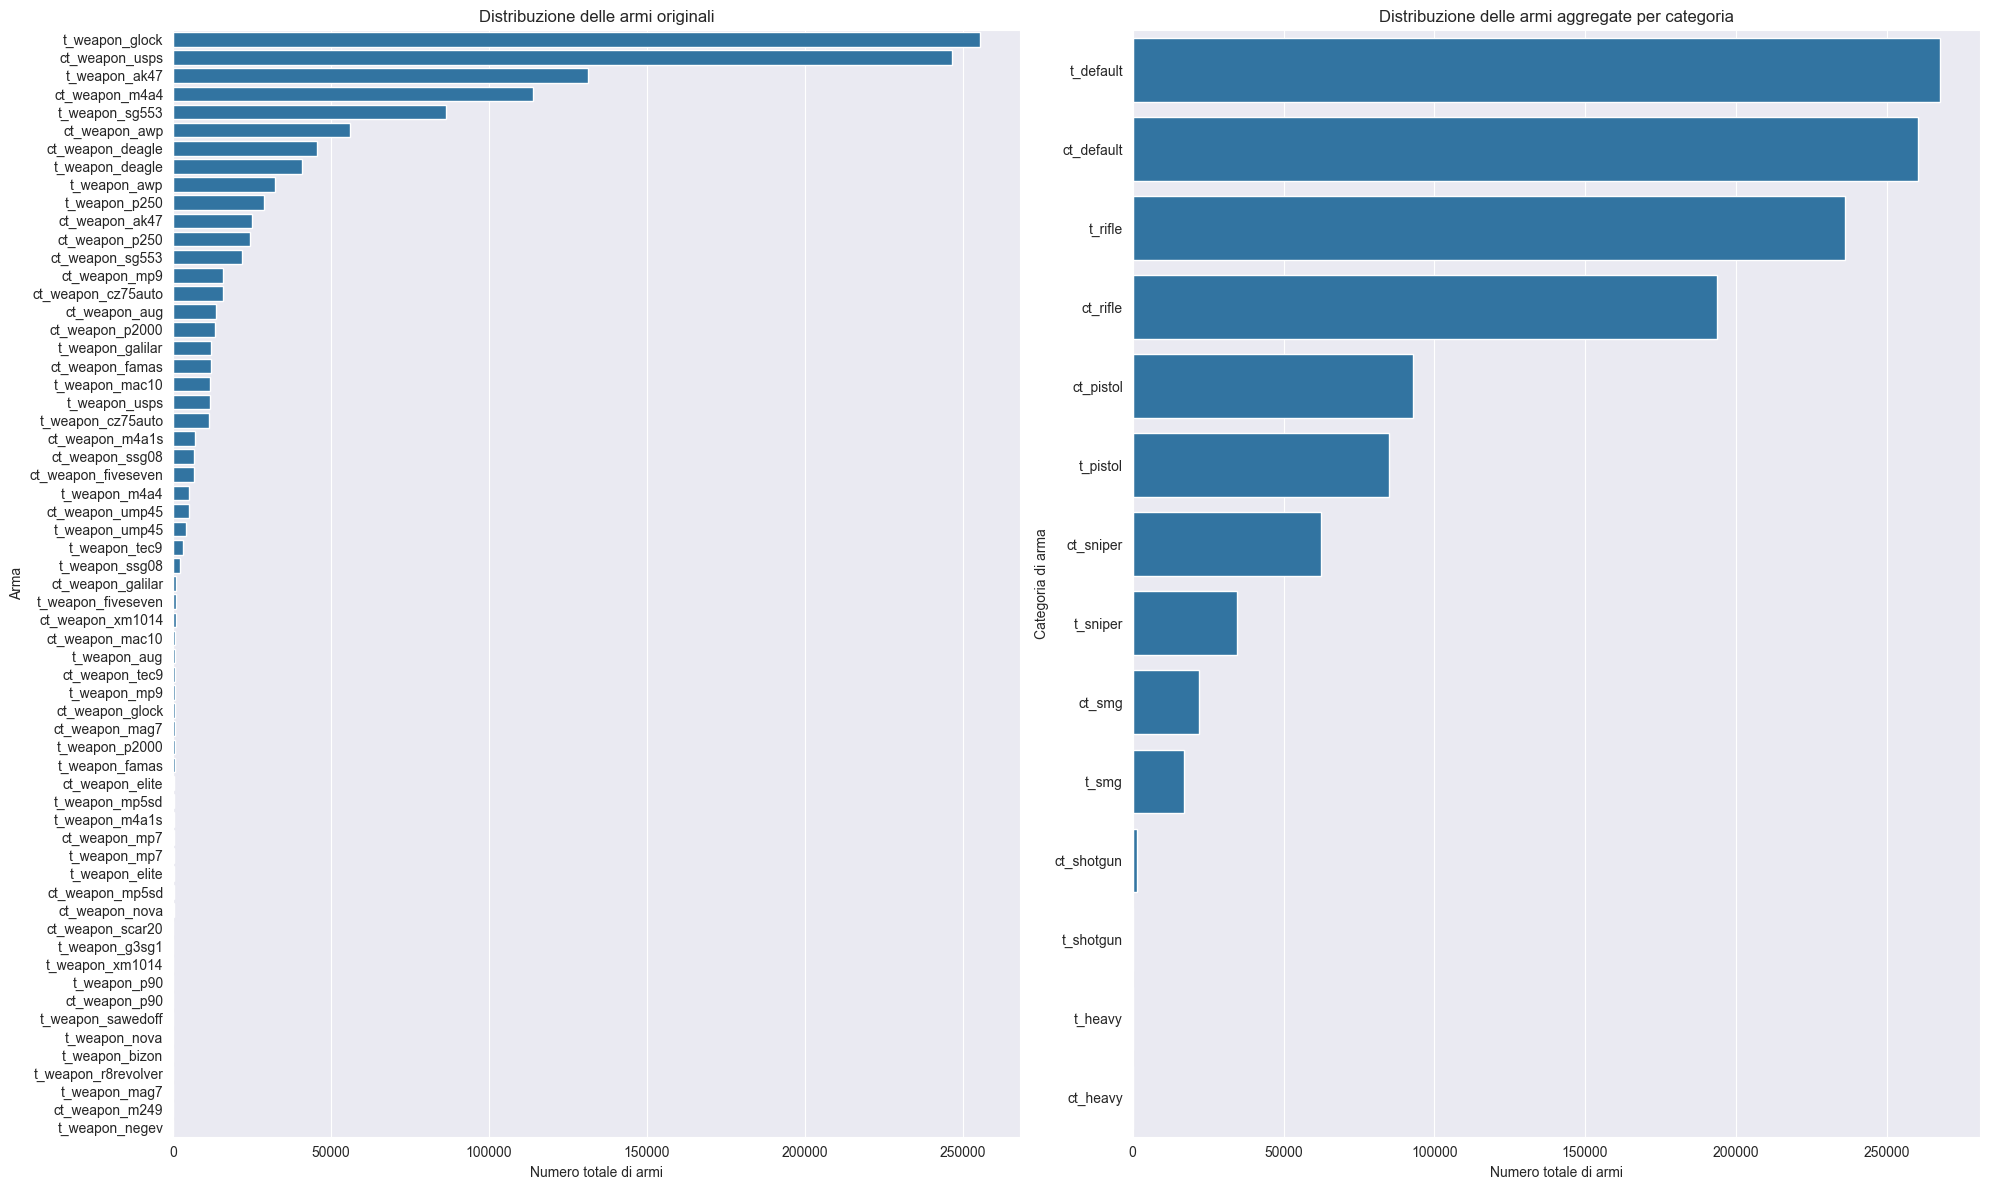

In [22]:
# Creiamo due subplots per confrontare le due distribuzioni
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 12))

# Grafico per la distribuzione delle armi originali
sns.barplot(x=weapon_sums_sorted.values, y=weapon_sums_sorted.index, ax=ax1)
ax1.set_title('Distribuzione delle armi originali')
ax1.set_xlabel('Numero totale di armi')
ax1.set_ylabel('Arma')

# Grafico per la distribuzione delle armi aggregate
sns.barplot(x=category_sums_sorted.values, y=category_sums_sorted.index, ax=ax2)
ax2.set_title('Distribuzione delle armi aggregate per categoria')
ax2.set_xlabel('Numero totale di armi')
ax2.set_ylabel('Categoria di arma')

plt.tight_layout()
plt.show()

Abbiamo ottenuto una rappresentazione più concisa e informativa delle armi, raggruppandole in categorie significative. Questo ci permette di mantenere informazioni rilevanti sulle preferenze dei giocatori per determinate tipologie di armi, riducendo al contempo la complessità dei modelli che utilizzeremo e migliorandone la generalizzazione.

Possiamo quindi procedere all'aggiornamento del dataset con le nuove colonne aggregate.

In [23]:
# Creazione delle nuove colonne aggregate per ciascuna categoria di armi
for category, weapons in weapon_categories.items():
    df[f'{category}'] = df[weapons].sum(axis=1)

for weapons in weapon_categories.values():
    df.drop(columns=weapons, inplace=True)

for category, grenades in incendiary_grenades_categories.items():
    df[f'{category}'] = df[grenades].sum(axis=1)

for grenades in incendiary_grenades_categories.values():
    df.drop(columns=grenades, inplace=True)

# Verifica delle modifiche
df.head()

time_left  ct_score  t_score  bomb_planted  ct_health  t_health  ct_armor  \
0      96.03       0.0      0.0             0      391.0     400.0     294.0   
1      76.03       0.0      0.0             0      391.0     400.0     294.0   
2     114.97       1.0      0.0             0      500.0     500.0     500.0   
3      94.97       1.0      0.0             0      295.0     111.0     296.0   
4      74.97       1.0      0.0             0      295.0     111.0     296.0   

   t_armor  ct_money  t_money  ...  ct_default  t_default  ct_pistol  \
0    200.0     750.0    500.0  ...         4.0        4.0        0.0   
1    200.0     750.0    500.0  ...         4.0        4.0        0.0   
2      0.0    1750.0  10550.0  ...         5.0        5.0        0.0   
3      0.0    1700.0   5000.0  ...         3.0        2.0        0.0   
4      0.0    1700.0   5000.0  ...         3.0        2.0        0.0   

   t_pistol  ct_heavy  t_heavy  ct_shotgun  t_shotgun  ct_grenade_incendiary  \
0       0.0       0.0      0.0         0.0        0.0                    0.0   
1       0.0       0.0      0.0         0.0        0.0                    0.0   
2       0.0       0.0      0.0         0.0        0.0                    1.0   
3       0.0       0.0      0.0         0.0        0.0                    0.0   
4       0.0       0.0      0.0         0.0        0.0                    0.0   

   t_grenade_incendiary  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  

[5 rows x 47 columns]

Controlliamo se ci sono valori anomali per le armi e le granate.

In [24]:
found_anomaly = False

# Itera su ogni categoria di armi nel dizionario
for category, weapons in weapon_categories.items():
    # Controlla se il numero di armi per la categoria è maggiore di 5
    invalid_rows = df[df[category] > 5]

    # Stampa il numero di righe con un valore maggiore di 5 per la categoria corrente
    if len(invalid_rows) > 0:
        found_anomaly = True
        print(f"Numero di righe con {category} > 5: {len(invalid_rows)}")

if not found_anomaly:
    print("Nessun valore anomalo per le armi")


Nessun valore anomalo per le armi


In [25]:
found_anomaly = False

# Facciamo lo stesso controllo per le granate
grenade_categories = [
    'ct_grenade_hegrenade', 'ct_grenade_flashbang', 'ct_grenade_smokegrenade', 'ct_grenade_incendiary',
    'ct_grenade_decoygrenade',
    't_grenade_hegrenade', 't_grenade_flashbang', 't_grenade_smokegrenade', 't_grenade_decoygrenade',
    't_grenade_incendiary'
]

# Itera su ogni categoria di granata
for grenade_col in grenade_categories:
    invalid_rows = df[df[grenade_col] > 5]

    if len(invalid_rows) > 0:
        found_anomaly = True
        print(f"Numero di righe con {grenade_col} > 5: {len(invalid_rows)}")

if not found_anomaly:
    print("Nessun valore anomalo per le granate")

Nessun valore anomalo per le granate


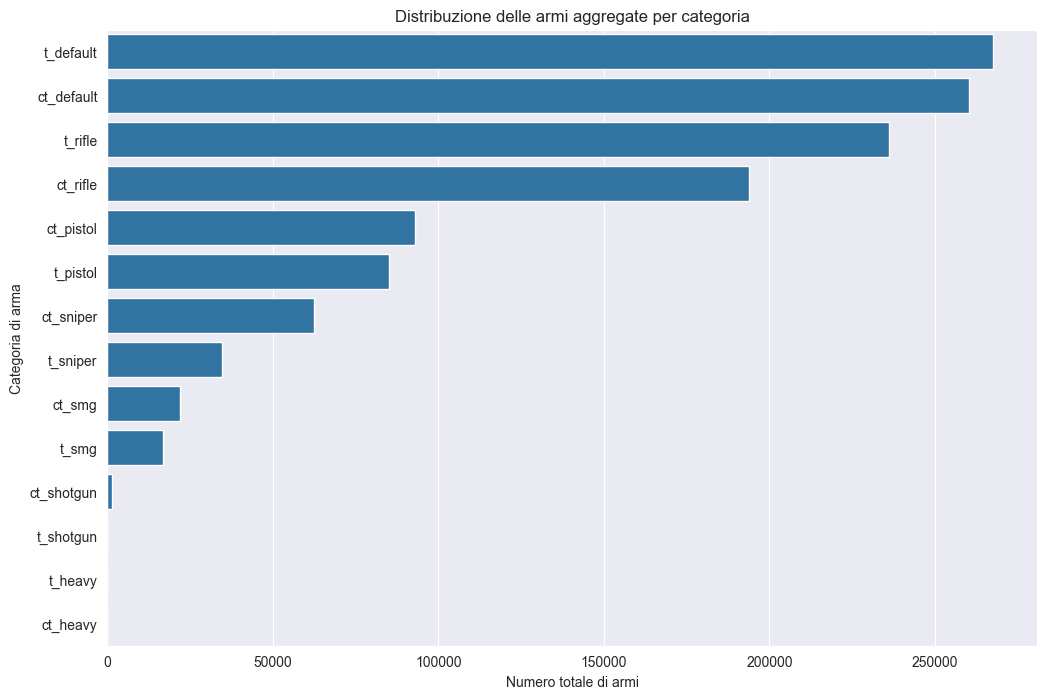

In [26]:
# Distribuzione delle colonne ct_rifle, t_rifle, ct_sniper, t_sniper, ct_smg, t_smg
weapon_category_columns = ['ct_rifle', 't_rifle', 'ct_sniper', 't_sniper', 'ct_smg', 't_smg', 'ct_default', 't_default', 'ct_pistol', 't_pistol', 'ct_heavy', 't_heavy', 'ct_shotgun', 't_shotgun']
weapon_category_sums = df[weapon_category_columns].sum()

# Ordina le categorie in base alla somma totale
weapon_category_sums_sorted = weapon_category_sums.sort_values(ascending=False)

# Visualizza la distribuzione delle armi aggregate
plt.figure(figsize=(12, 8))

sns.barplot(x=weapon_category_sums_sorted.values, y=weapon_category_sums_sorted.index)
plt.title('Distribuzione delle armi aggregate per categoria')
plt.xlabel('Numero totale di armi')
plt.ylabel('Categoria di arma')
plt.show()

Possiamo eliminare le colonne `ct_shotgun`, `t_shotgun`, `ct_heavy` e `t_heavy` in quanto sono poco utilizzate e non influenzano significativamente il gioco.

In [27]:
# Elimina le colonne relative agli shotgun e heavy weapons
df.drop(columns=['ct_shotgun', 't_shotgun', 'ct_heavy', 't_heavy'], inplace=True)
df.reset_index(drop=True, inplace=True)

Infine, possiamo anche eliminare le colonne relative alle granate decoy, in quanto non influenzano in alcun modo il gioco e non sono utilizzate per fini tattici.

In [28]:
# Elimina le colonne relative alle granate decoy
df.drop(columns=['ct_grenade_decoygrenade', 't_grenade_decoygrenade'], inplace=True)
df.reset_index(drop=True, inplace=True)

## Analisi dei dati

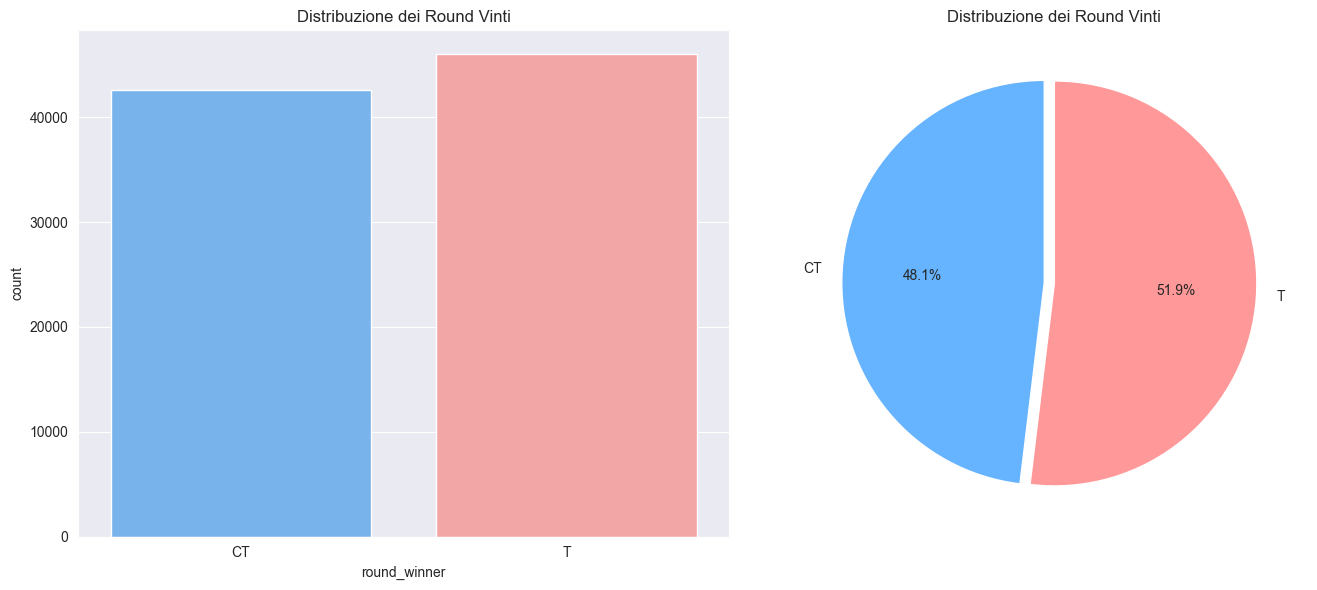

In [29]:
colors = [color_ct, color_t]
labels = ['CT', 'T']

# Creazione della figura con 2 sottotitoli (2 grafici affiancati)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Grafico a barre (countplot)
sns.countplot(x='round_winner', data=df, palette=colors, hue='round_winner', legend=False, ax=axes[0])
axes[0].set_title('Distribuzione dei Round Vinti')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(labels)

# Grafico a torta
round_winner_counts = df['round_winner'].value_counts(ascending=True)

axes[1].pie(round_winner_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=[0.05, 0])
axes[1].set_title('Distribuzione dei Round Vinti')

# Mostra i grafici
plt.tight_layout()
plt.show()

Dal grafico sopra possiamo osservare che il dataset è abbastanza **bilanciato** tra i round vinti dai Contro-Terroristi (0) e quelli vinti dai Terroristi (1). Questo è un aspetto positivo, poiché un bilanciamento corretto dei dati di addestramento è essenziale per evitare che il modello sviluppi bias verso una classe piuttosto che un'altra.

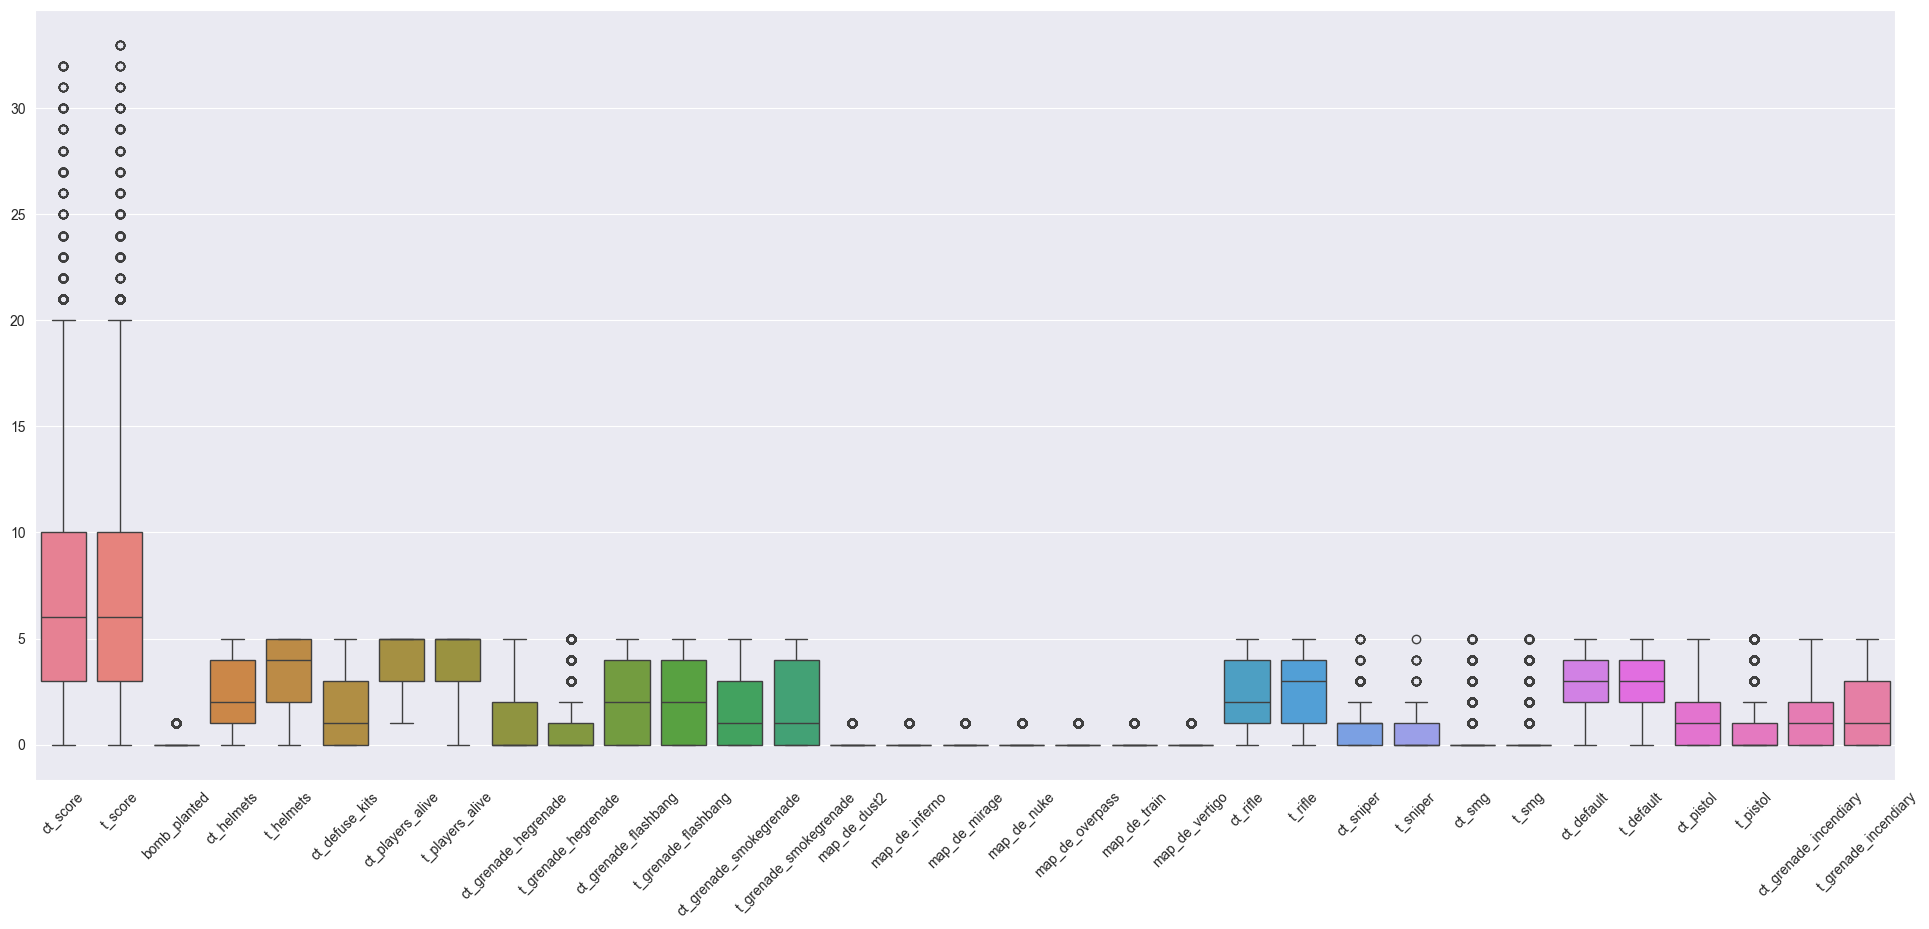

In [30]:
# Analisi degli outliers con boxplot
plt.figure(figsize=(24, 10))
sns.boxplot(data=df.drop(
    columns=['round_winner', 'ct_money', 't_money', 'ct_health', 't_health', 'ct_armor', 't_armor', 'time_left']))
plt.xticks(rotation=45)
plt.show()

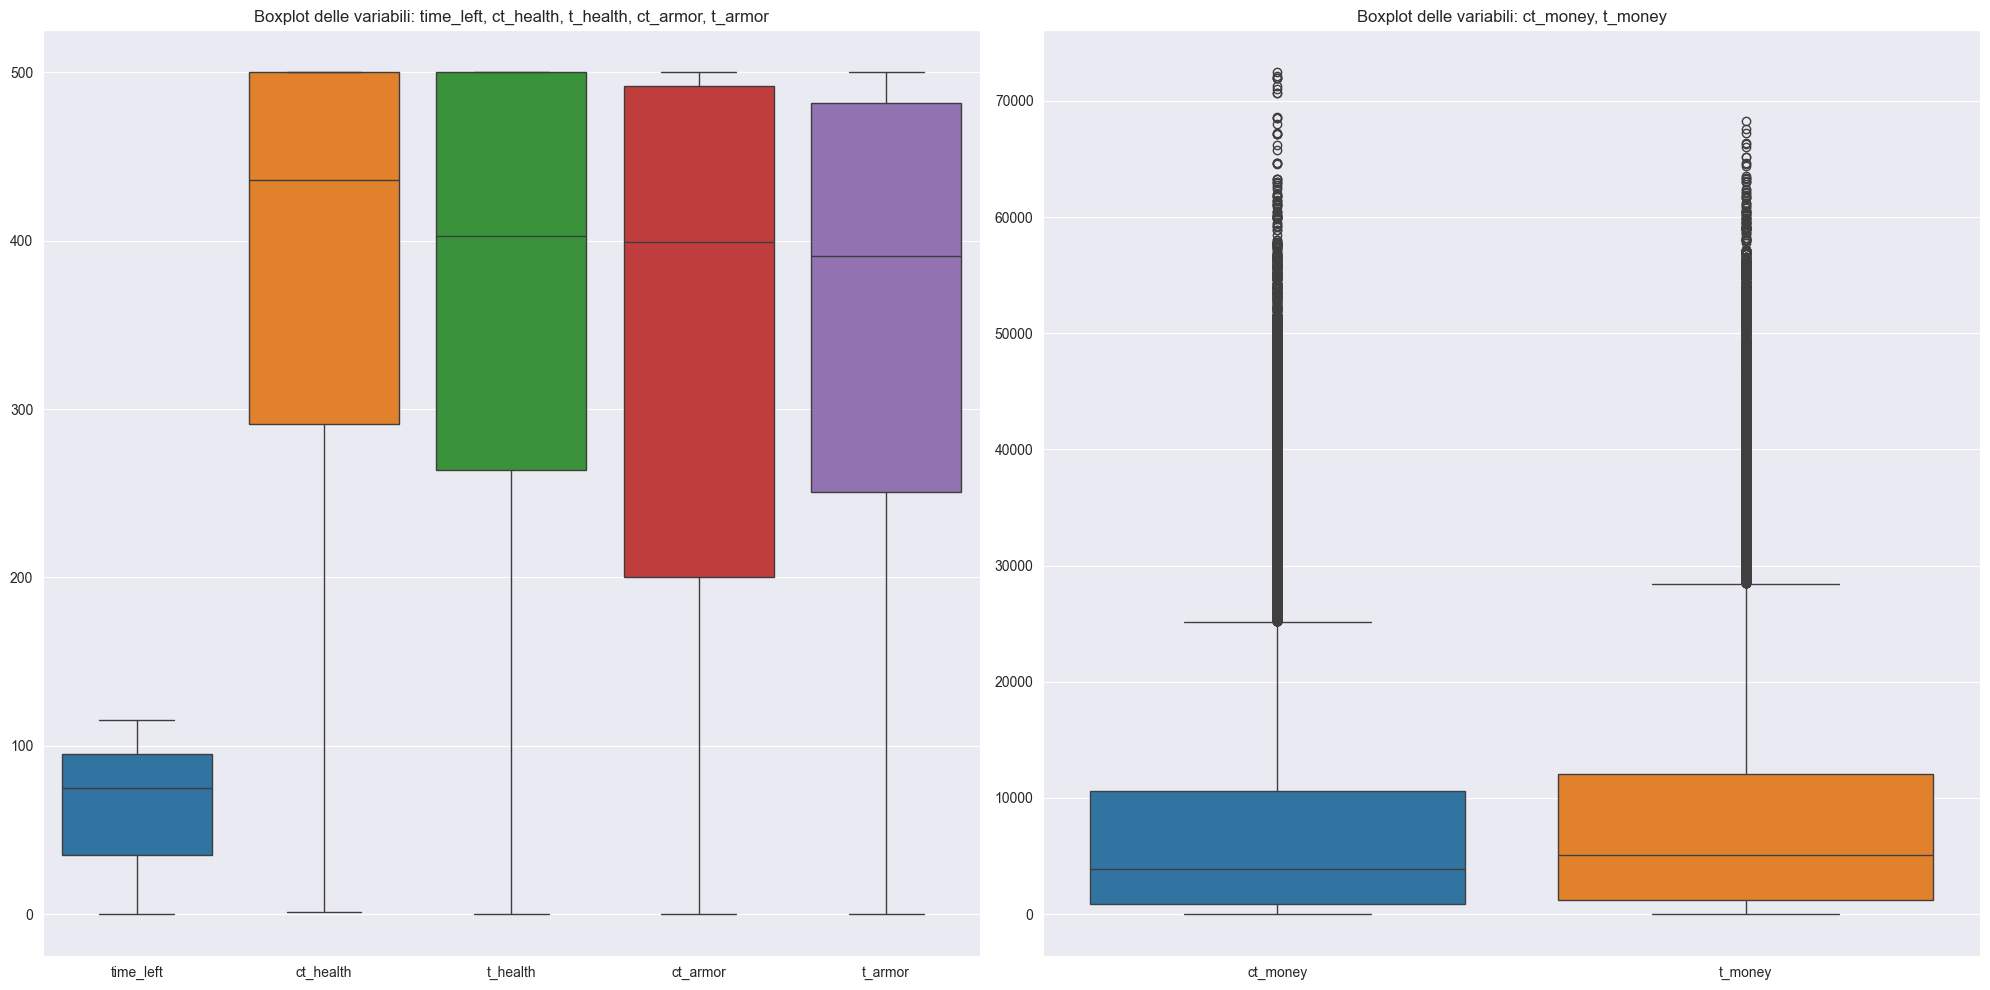

In [31]:
# Crea una figura con 2 sottotrame (uno accanto all'altro)
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Primo grafico: Boxplot per 'time_left', 'ct_health', 't_health', 'ct_armor', 't_armor'
sns.boxplot(data=df[['time_left', 'ct_health', 't_health', 'ct_armor', 't_armor']], ax=axes[0])
axes[0].set_title('Boxplot delle variabili: time_left, ct_health, t_health, ct_armor, t_armor')

# Secondo grafico: Boxplot per 'ct_money' e 't_money'
sns.boxplot(data=df[['ct_money', 't_money']], ax=axes[1])
axes[1].set_title('Boxplot delle variabili: ct_money, t_money')

# Mostra i grafici
plt.tight_layout()  # Migliora la disposizione per evitare sovrapposizioni
plt.show()

Gli outliers problematici sono stati preventivamente eliminati e il dataset risulta abbastanza pulito e significativo.

Vediamo la distribuzione delle mappe giocate dai giocatori professionisti.

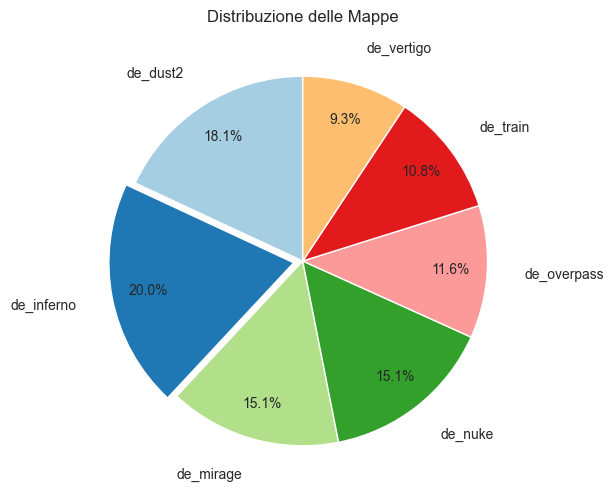

In [32]:
# Ottieni le colonne One-Hot delle mappe
map_columns = [col for col in df.columns if col.startswith('map_')]

# Calcolare le occorrenze di ciascuna mappa
map_counts = df[map_columns].sum()

# Rinominare le mappe rimuovendo il prefisso "map_"
map_counts.index = map_counts.index.str.replace('map_', '')

# Aggiungere l'effetto explode (separare la fetta più grande)
explode = [0.05 if i == map_counts.idxmax() else 0 for i in map_counts.index]

# Creare il grafico a torta
plt.figure(figsize=(12, 6))
map_counts.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors,
    labeldistance=1.2,
    pctdistance=0.8,
    explode=explode
)
plt.title('Distribuzione delle Mappe')
plt.ylabel('')  # Toglie il label y
plt.show()

La mappa più giocata é de_inferno (20.0%), seguita da de_dust2 (18.1%) e de_nuke (15.1%) insieme a de_mirage (15.1%).
La mappa meno giocata é de_vertigo (9.3%).

Analizziamo la distribuzione dei round vinti in ogni mappa, per analizzare se vi é un vantaggio nel giocare da team Terrorista o Contro-Terrorista.

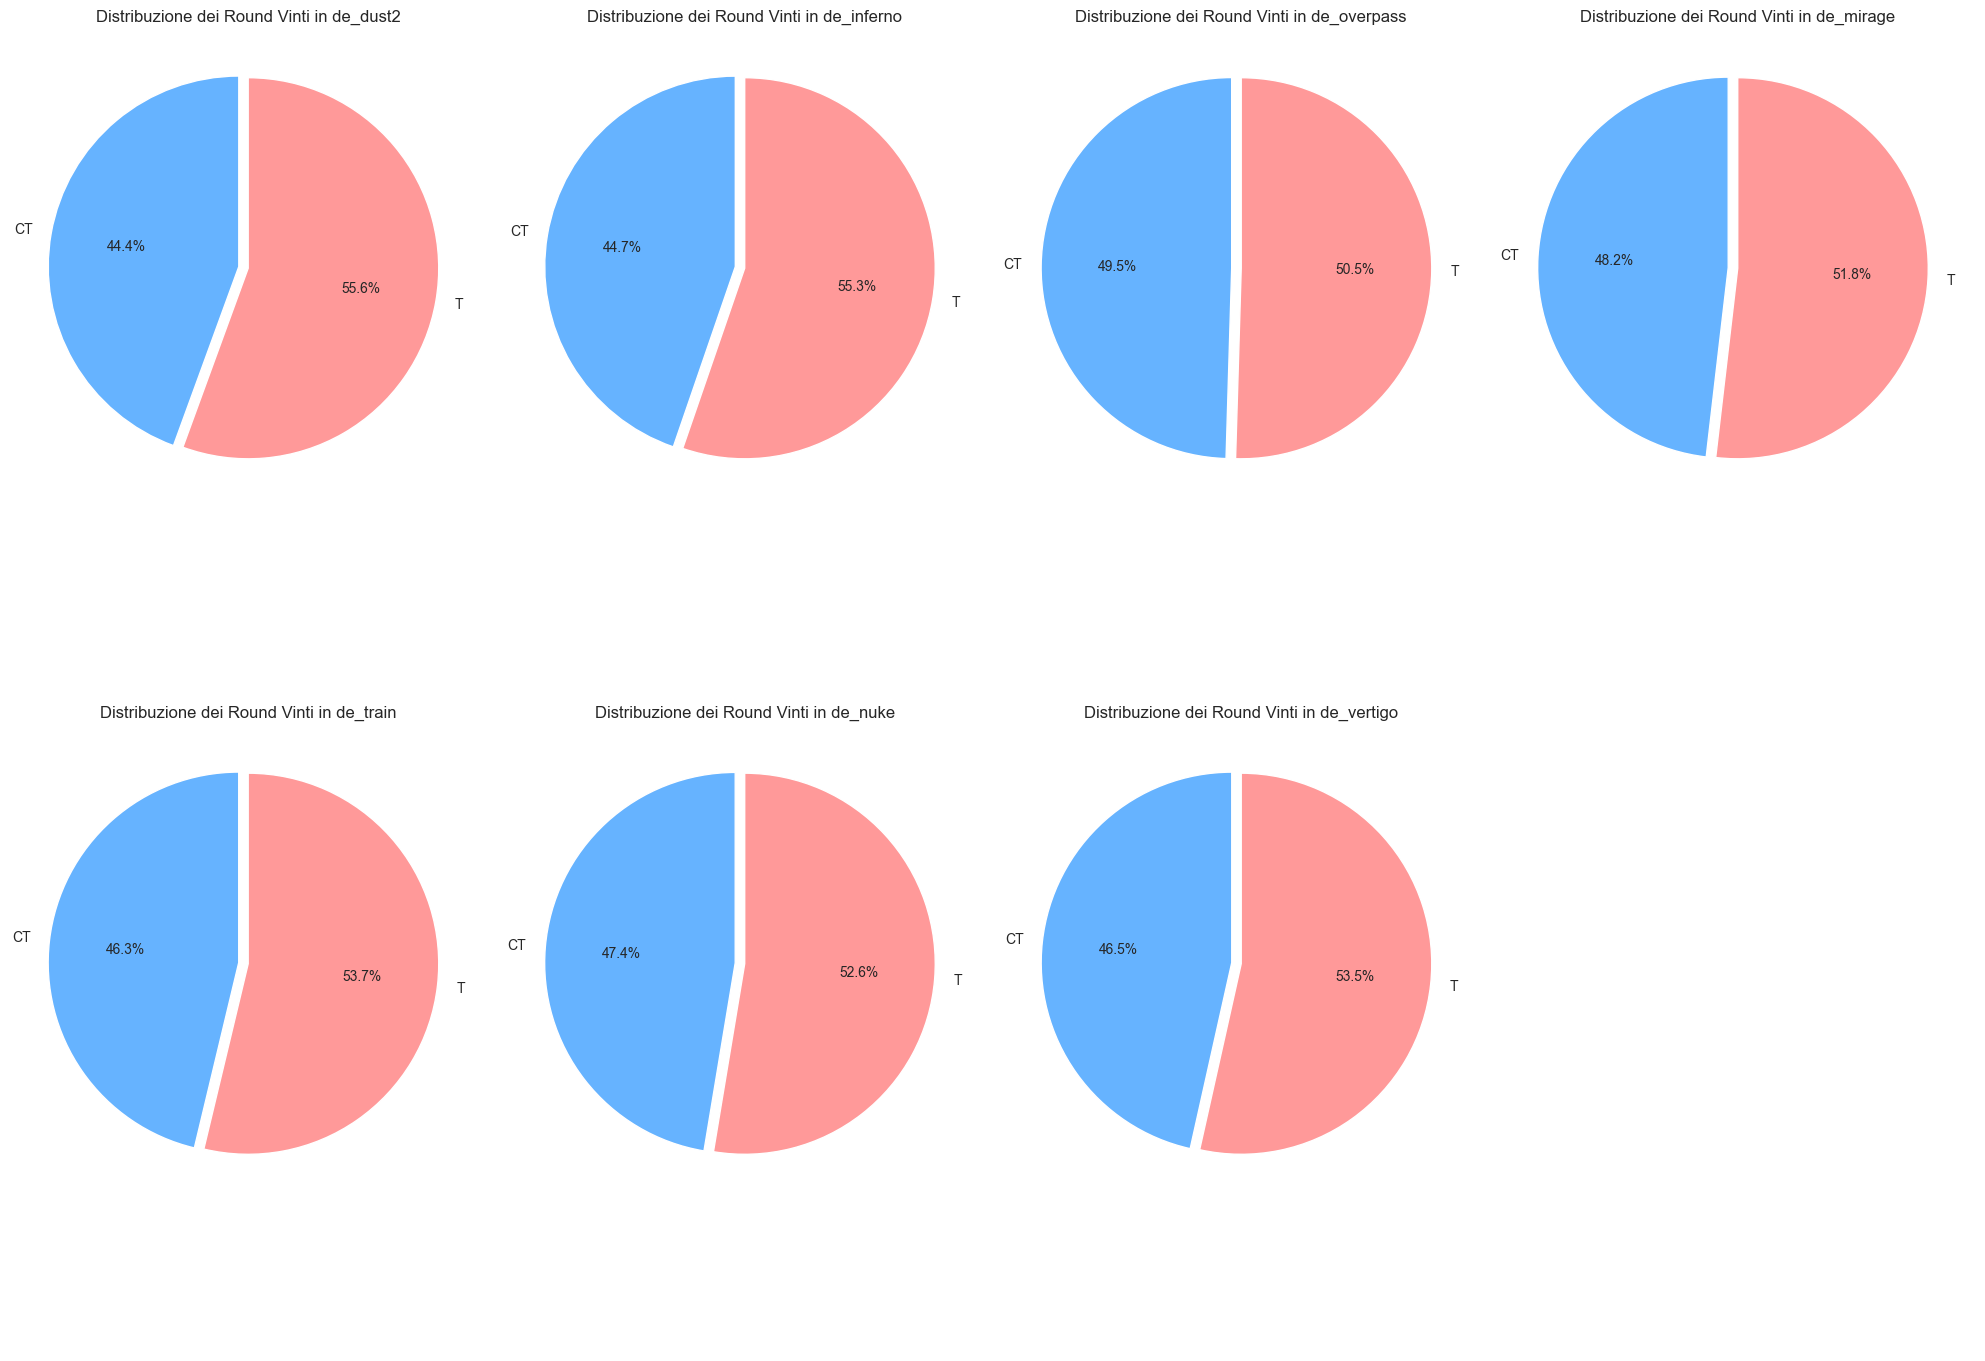

In [33]:
# Elenco delle mappe nel dataset (assumendo che il nome delle colonne sia come 'map_de_inferno')
map_columns = ['map_de_dust2', 'map_de_inferno', 'map_de_overpass', 'map_de_mirage', 'map_de_train', 'map_de_nuke',
               'map_de_vertigo']

# Configura il grafico
fig, axes = plt.subplots(2, 4, figsize=(20, 15))  # 2 righe e 4 colonne per i grafici
axes = axes.flatten()  # Appiattisce l'array degli assi

# Itera su tutte le mappe e crea il grafico per ciascuna
for idx, map_col in enumerate(map_columns):
    map_df = df[df[map_col] == 1]  # Filtra i dati per la mappa corrente
    round_winner_counts = map_df['round_winner'].value_counts(ascending=True)  # Conta i round vinti

    # Disegna il grafico a torta per ciascuna mappa
    axes[idx].pie(
        round_winner_counts,  # I conteggi dei round vinti
        autopct='%1.1f%%',  # Percentuali per ciascuna fetta
        startangle=90,  # Angolo di inizio
        colors=colors,  # Colori per CT e T
        labels=labels,  # Etichette per CT e T
        explode=[0.05, 0],  # Esplosione per la fetta T
    )
    axes[idx].set_title(f'Distribuzione dei Round Vinti in {map_col[4:]}')  # Titolo per ogni mappa
    axes[idx].set_ylabel('')  # Rimuove il label sull'asse Y

# Nascondi eventuali assi vuoti se ci sono meno heatmap di quelle previste
for j in range(len(map_columns), len(axes)):
    axes[j].axis('off')
# Aggiusta il layout per evitare sovrapposizioni
plt.tight_layout()
plt.show()

Pare che su tutte le mappe i T abbiano un vantaggio rispetto ai CT, in alcuni casi anche marcato, con l'eccezione di de_overpass dove i round vinti sono praticamente bilanciati.

Vediamo ora come l'economia influisce sui round vinti.

In [34]:
# 1. Calcola il numero di round vinti dalla squadra con il maggior numero di soldi
rounds_won_by_max_money_team = pd.concat([
    df[(df['ct_money'] > df['t_money']) & (df['round_winner'] == 0)],  # CT ha più soldi e vince
    df[(df['t_money'] > df['ct_money']) & (df['round_winner'] == 1)]  # T ha più soldi e vince
])

# 2. Calcola il numero di round persi dalla squadra con il maggior numero di soldi
rounds_lost_by_max_money_team = pd.concat([
    df[(df['ct_money'] > df['t_money']) & (df['round_winner'] == 1)],  # CT ha più soldi e perde
    df[(df['t_money'] > df['ct_money']) & (df['round_winner'] == 0)]  # T ha più soldi e perde
])

# 3. Calcola il numero di round con parità di denaro
rounds_with_equal_money = df[df['ct_money'] == df['t_money']]

# 4. Calcola la percentuale di round vinti
total_rounds = len(df)
rounds_won = len(rounds_won_by_max_money_team)
percent_rounds_won = (rounds_won / total_rounds) * 100

# 5. Calcola la percentuale di round persi
rounds_lost = len(rounds_lost_by_max_money_team)
percent_rounds_lost = (rounds_lost / total_rounds) * 100

# 6. Calcola la percentuale di round con parità di denaro
percent_equal_money_rounds = (len(rounds_with_equal_money) / total_rounds) * 100

# Mostra i risultati
print(f"Percentuale di round vinti dalla squadra con il maggior numero di soldi: {percent_rounds_won:.2f}%")
print(f"Percentuale di round persi dalla squadra con il maggior numero di soldi: {percent_rounds_lost:.2f}%")
print(f"Percentuale di round con parità di denaro tra le squadre: {percent_equal_money_rounds:.2f}%")


Percentuale di round vinti dalla squadra con il maggior numero di soldi: 59.26%
Percentuale di round persi dalla squadra con il maggior numero di soldi: 39.96%
Percentuale di round con parità di denaro tra le squadre: 0.78%


Quindi, la squadra con piú soldi vince tendenzialmente molti piú round rispetto a quella con meno soldi.

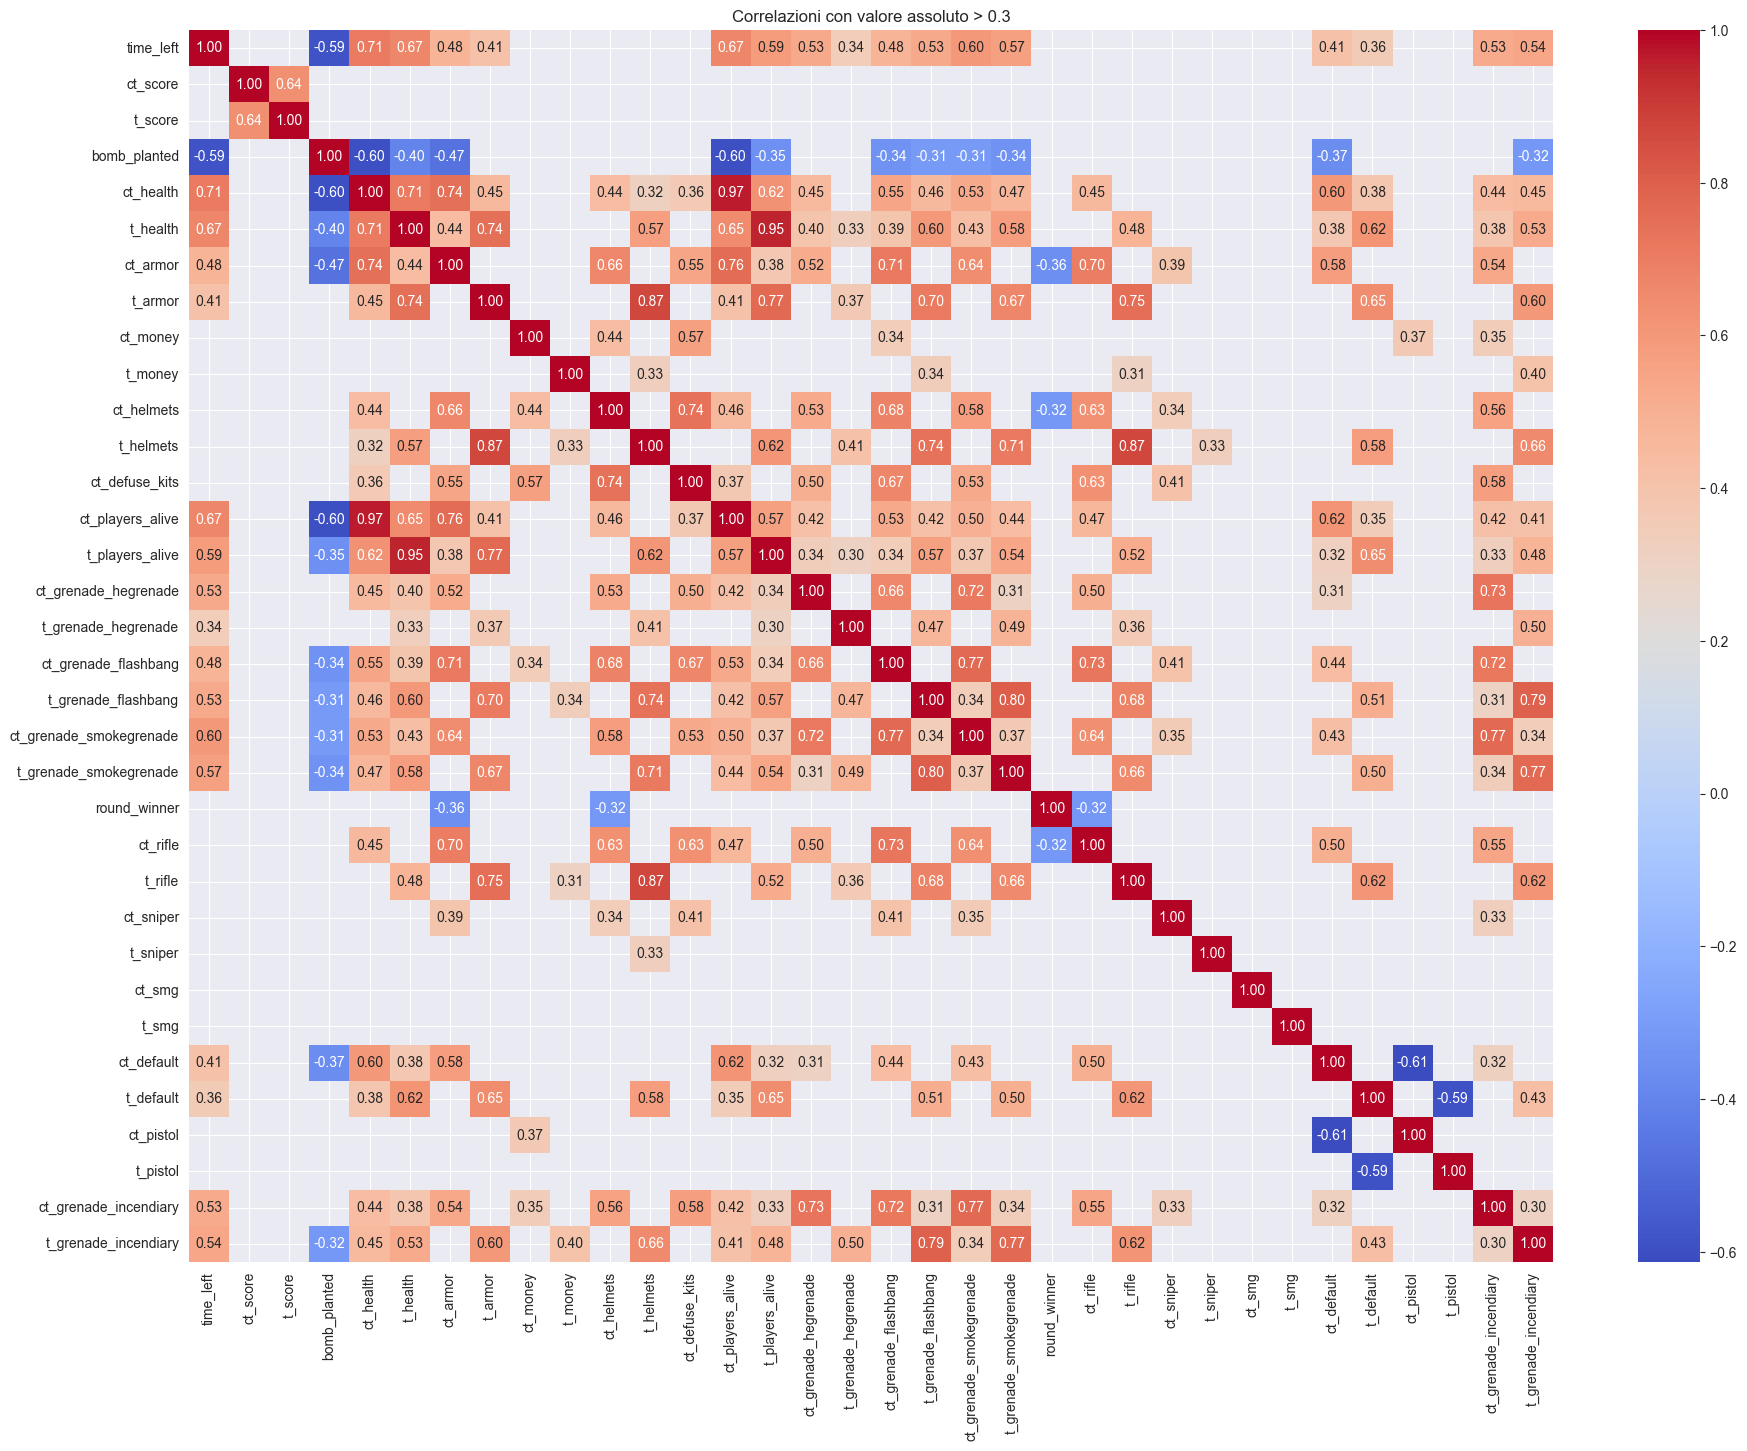

In [35]:
# Calcolare la matrice di correlazione
correlation_matrix = df.corr()

# Rimuovere le colonne che iniziano con "map_"
correlation_matrix = correlation_matrix.drop(
    columns=[col for col in correlation_matrix.columns if col.startswith('map_')],
    index=[col for col in correlation_matrix.columns if col.startswith('map_')])

# Filtrare le correlazioni con valore assoluto superiore a 0.3
high_corr = correlation_matrix[correlation_matrix.abs() > 0.3]

# Creiamo una heatmap per visualizzare solo le correlazioni forti
plt.figure(figsize=(22, 16))
sns.heatmap(high_corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlazioni con valore assoluto > 0.3")
plt.show()

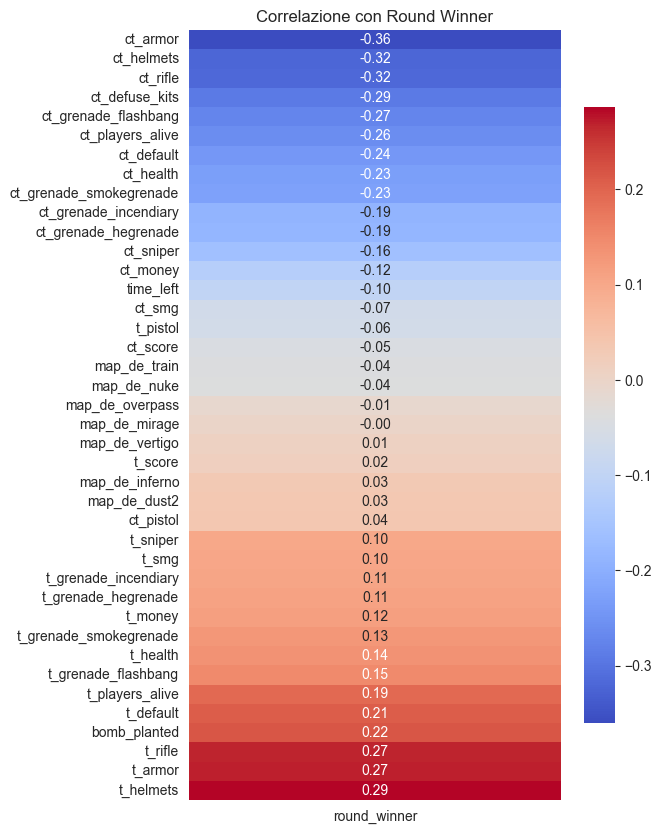

In [36]:
# Calcola le correlazioni tra 'round_winner' e tutte le altre colonne numeriche
correlation = df.corr()  # Calcola la matrice di correlazione
round_winner_corr = correlation['round_winner'].drop(
    'round_winner')  # Prendi solo la colonna 'round_winner' e rimuovi se stessa

# Ordina i valori in ordine crescente
round_winner_corr_sorted = round_winner_corr.sort_values()

plt.figure(figsize=(6, 10))
sns.heatmap(
    round_winner_corr_sorted.to_frame(),  # Converti in dataframe
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    cbar_kws={"shrink": 0.8},  # Riduce la dimensione della barra di colore per evitare sovrapposizioni
    xticklabels=True,
    yticklabels=True
)
plt.title("Correlazione con Round Winner")
plt.show()

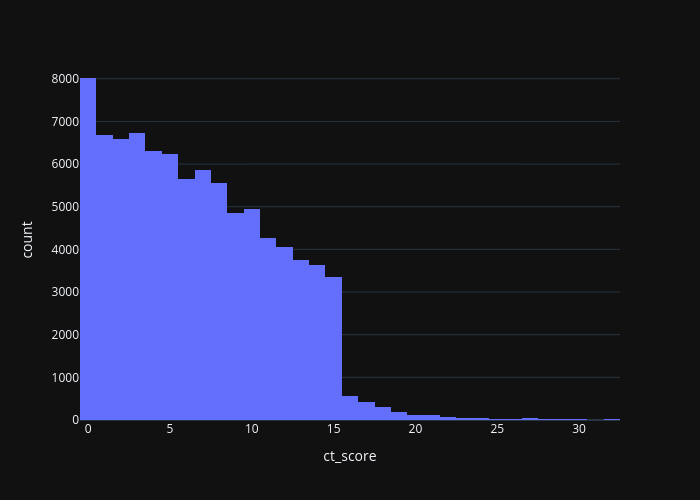

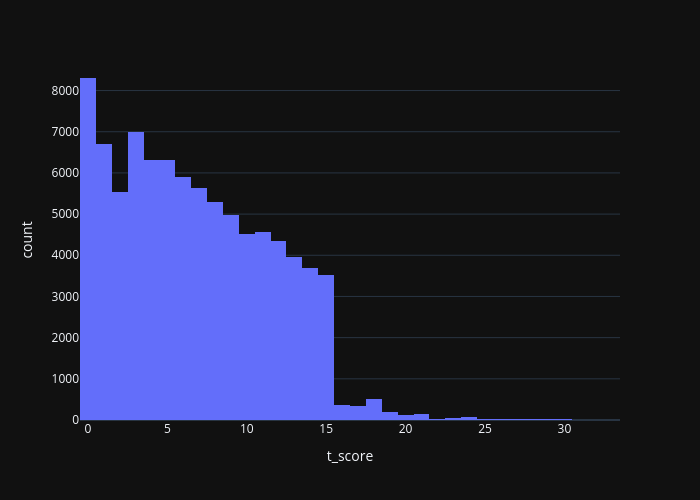

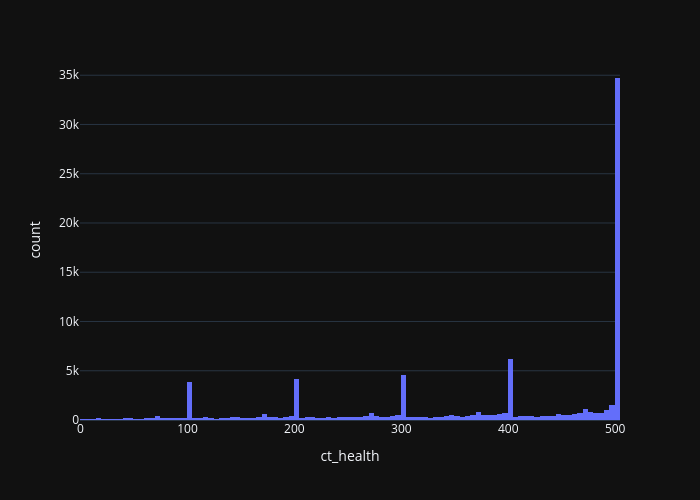

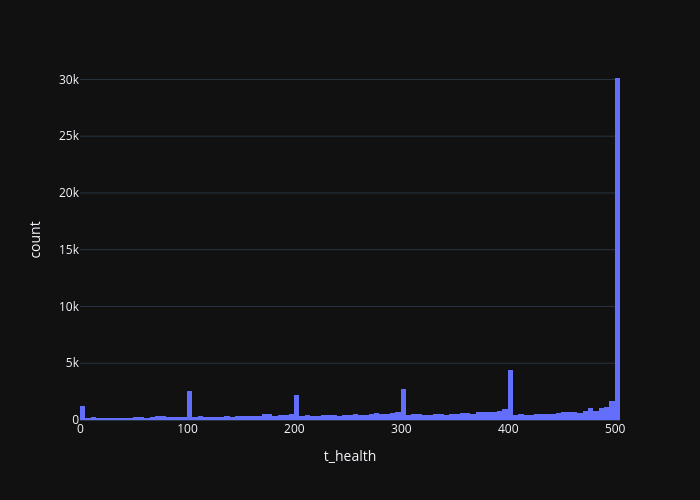

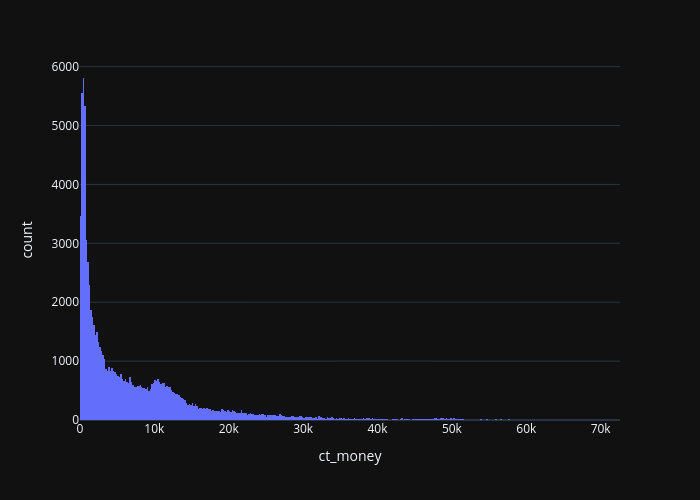

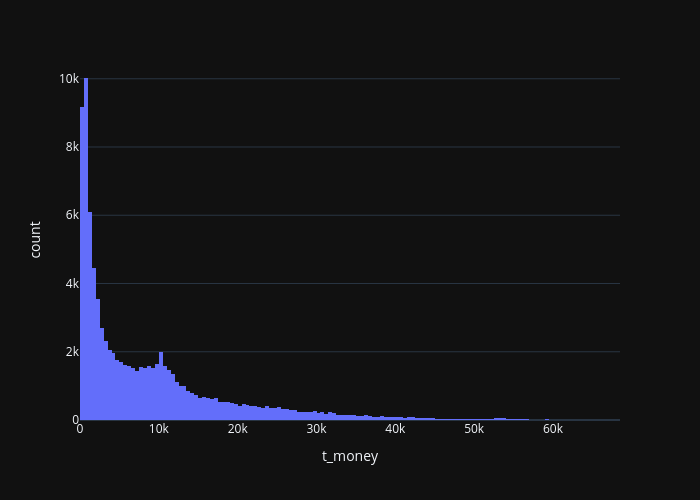

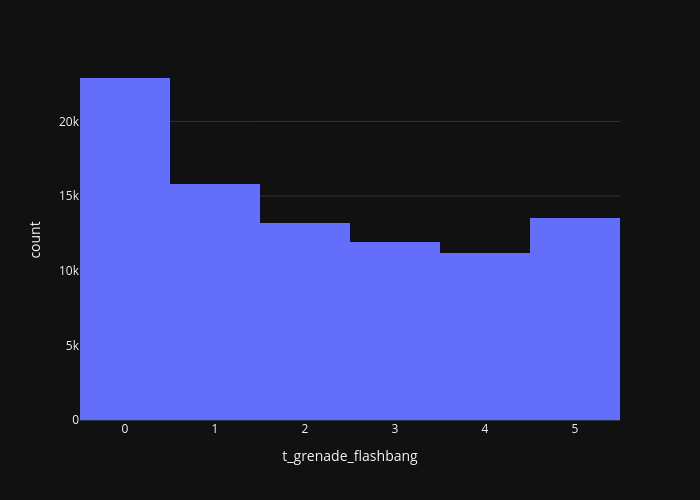

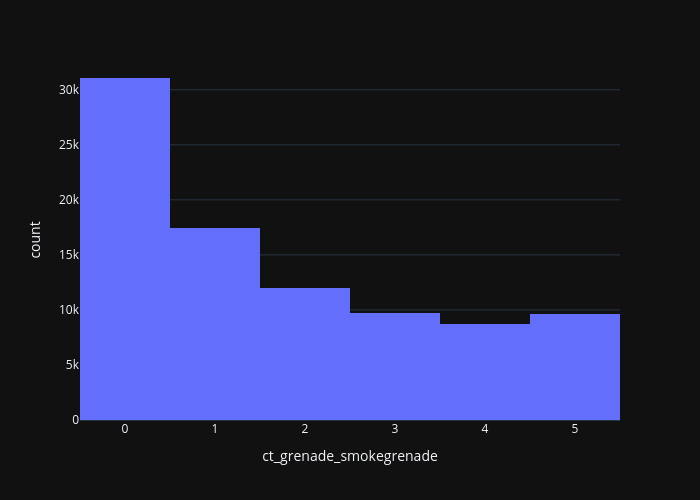

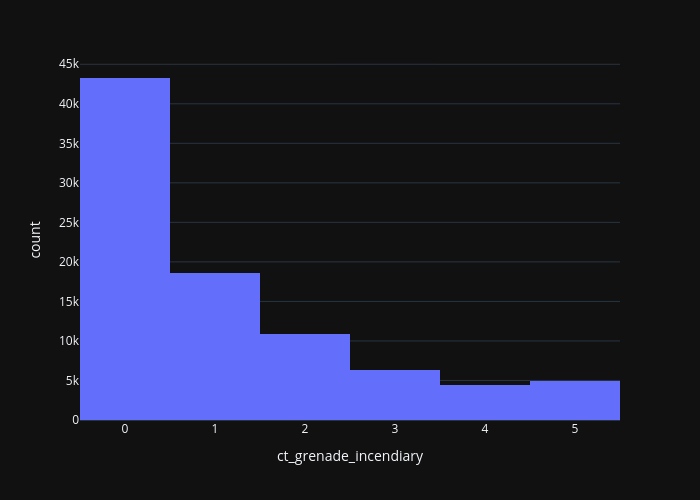

In [37]:
fig = px.histogram(df, "ct_score")
fig.show()

fig = px.histogram(df, "t_score")
fig.show()

fig = px.histogram(df, "ct_health")
fig.show()

fig = px.histogram(df, "t_health")
fig.show()

fig = px.histogram(df, "ct_money")
fig.show()

fig = px.histogram(df, "t_money")
fig.show()

fig = px.histogram(df, "t_grenade_flashbang")
fig.show()

fig = px.histogram(df, "ct_grenade_smokegrenade")
fig.show()

fig = px.histogram(df, "ct_grenade_incendiary")
fig.show()

---

# Apprendimento Non Supervisionato

## Clustering KMeans

Il **clustering** è una tecnica di apprendimento non supervisionato che permette di raggruppare i dati in insiemi basati su caratteristiche simili. Tra i metodi di clustering più utilizzati, il **KMeans** è uno dei più semplici ed efficaci.

Il KMeans è un algoritmo iterativo che suddivide un insieme di dati in un numero predefinito di gruppi (*k cluster*). L'obiettivo è minimizzare la varianza intra-cluster (la distanza tra i punti di ciascun cluster e il rispettivo centroide). 

Il processo si articola in tre passi principali:
1. **Inizializzazione**: Posizionamento casuale dei centri dei cluster (centroidi).
2. **Assegnazione**: Ogni punto viene assegnato al cluster con il centroide più vicino.
3. **Aggiornamento**: I centroidi vengono ricalcolati come media dei punti assegnati a ciascun cluster.

### Quando Utilizzare il KMeans?

Il KMeans è particolarmente efficace per:
- Dati con cluster ben separabili.
- Applicazioni in cui il numero di cluster è noto o stimabile.
- Analisi esplorativa dei dati.

Tuttavia, presenta alcune limitazioni:
- È sensibile alle scale.
- Richiede la scelta a priori del numero di cluster (*k*).

### Metriche per Valutare il Clustering

Per misurare l'efficacia del clustering ottenuto, utilizzeremo le seguenti metriche:
- **Silhouette Score**: Valuta quanto i cluster sono separati tra loro e quanto i punti sono vicini ai centroidi dei rispettivi cluster. Varia tra -1 (clustering non efficace) e 1 (clustering ben definito).
- **Calinski-Harabasz Index**: Misura la densità e separazione dei cluster. Valori più alti indicano una migliore qualità del clustering.
- **Davies-Bouldin Index**: Stima la sovrapposizione tra i cluster. Valori più bassi indicano una migliore separazione.

---

Nell'ambito del progetto, ho applicato il KMeans sul dataframe per identificare pattern significativi nei round. 
L'obiettivo é raggruppare i round in base al tipo di situazione in cui si trovano le squadre, ad esempio in base a soldi, salute, equipaggiamento, tempo rimanente, ecc.

Ho confrontato diverse configurazioni e metriche per scegliere il miglior approccio di clustering.

In [38]:
data = df

# Normalizza i dati con RobustScaler per gestire meglio gli outliers
scaler = preprocessing.RobustScaler()
data_scaled = scaler.fit_transform(data)

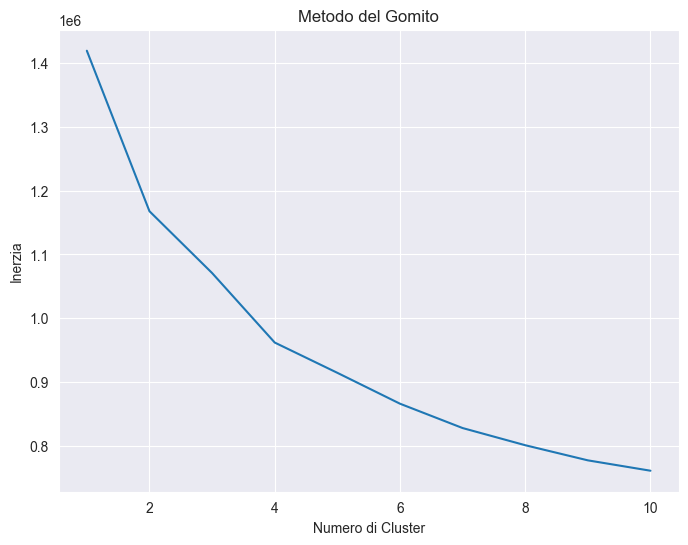

Il k ottimale è: 4


In [39]:
inertias = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_scaled)
    inertias.append(kmeans.inertia_)

# Grafico del metodo del gomito
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertias)
plt.title('Metodo del Gomito')
plt.xlabel('Numero di Cluster')
plt.ylabel('Inerzia')
plt.show()

kl = KneeLocator(range(1, 11), inertias, curve="convex", direction="decreasing")
print('Il k ottimale è: ' + str(kl.elbow))

In [40]:
# Applicare KMeans con il numero di cluster scelto = 4
kmeans = KMeans(n_clusters=kl.elbow, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(data_scaled)

In [41]:
df_kmeans = df.copy()
df_kmeans['cluster'] = y_kmeans

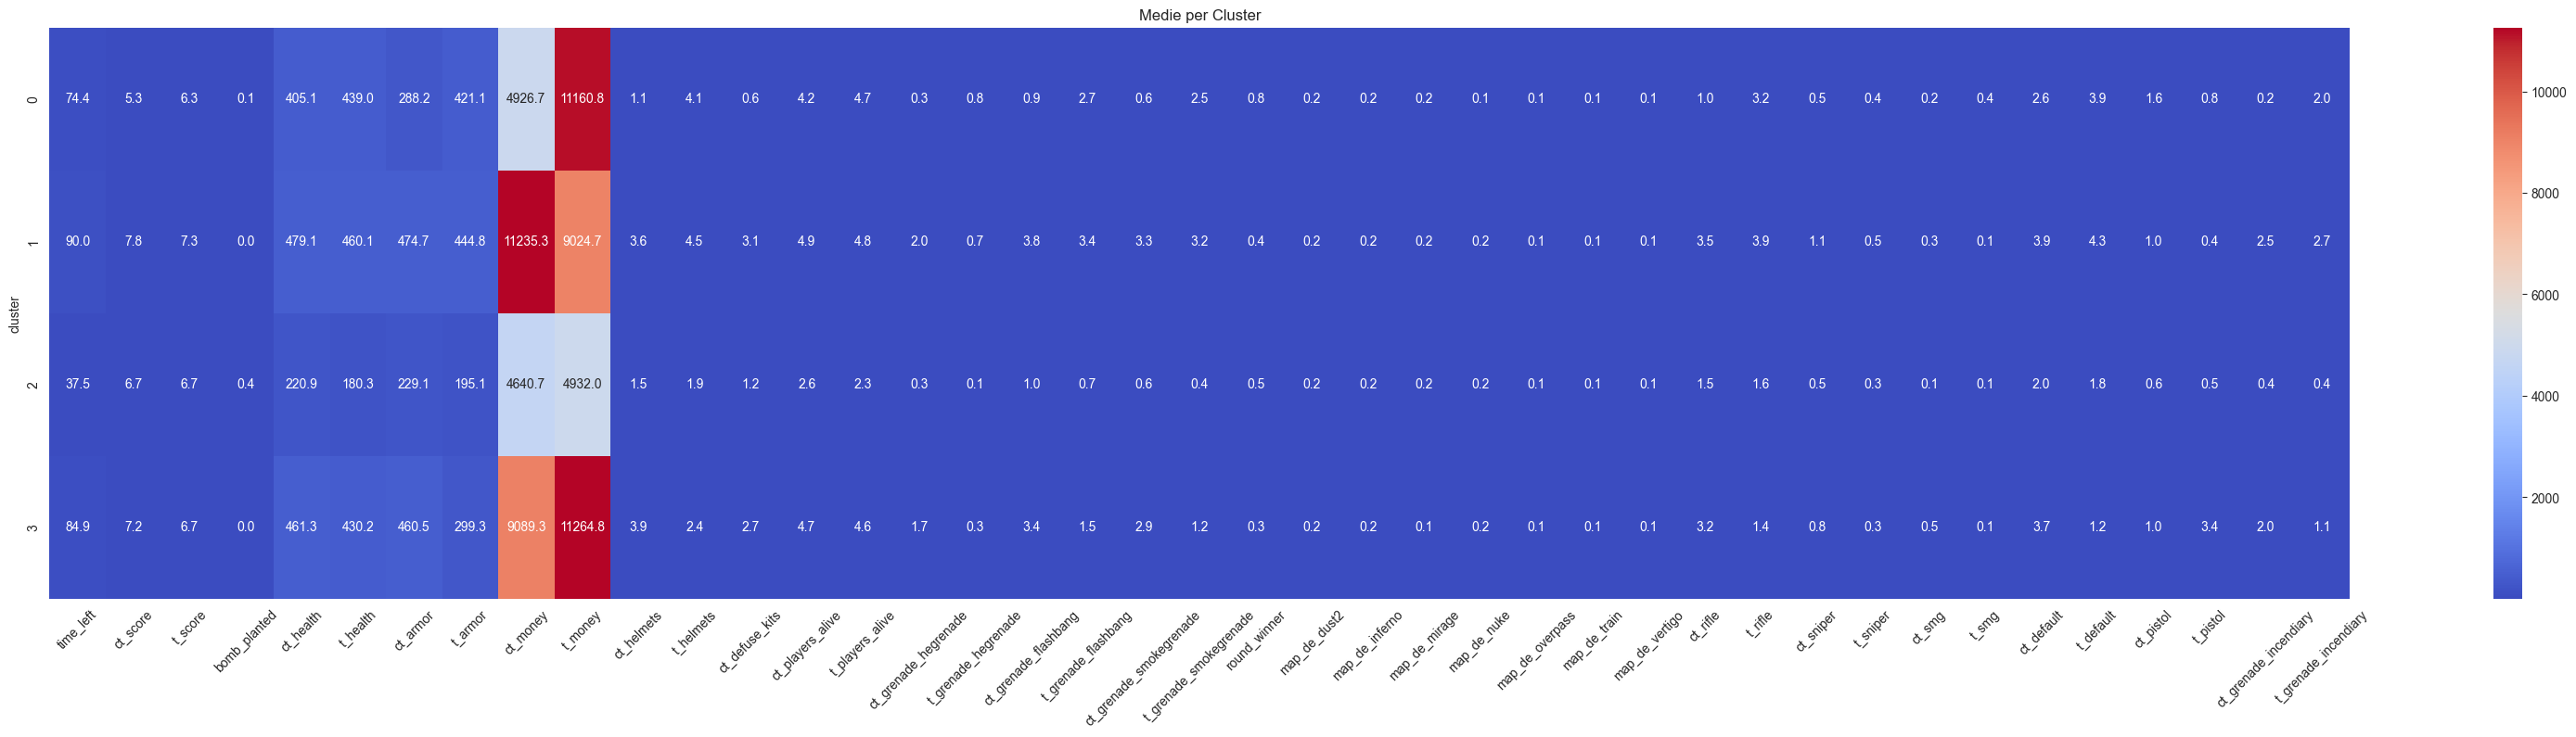

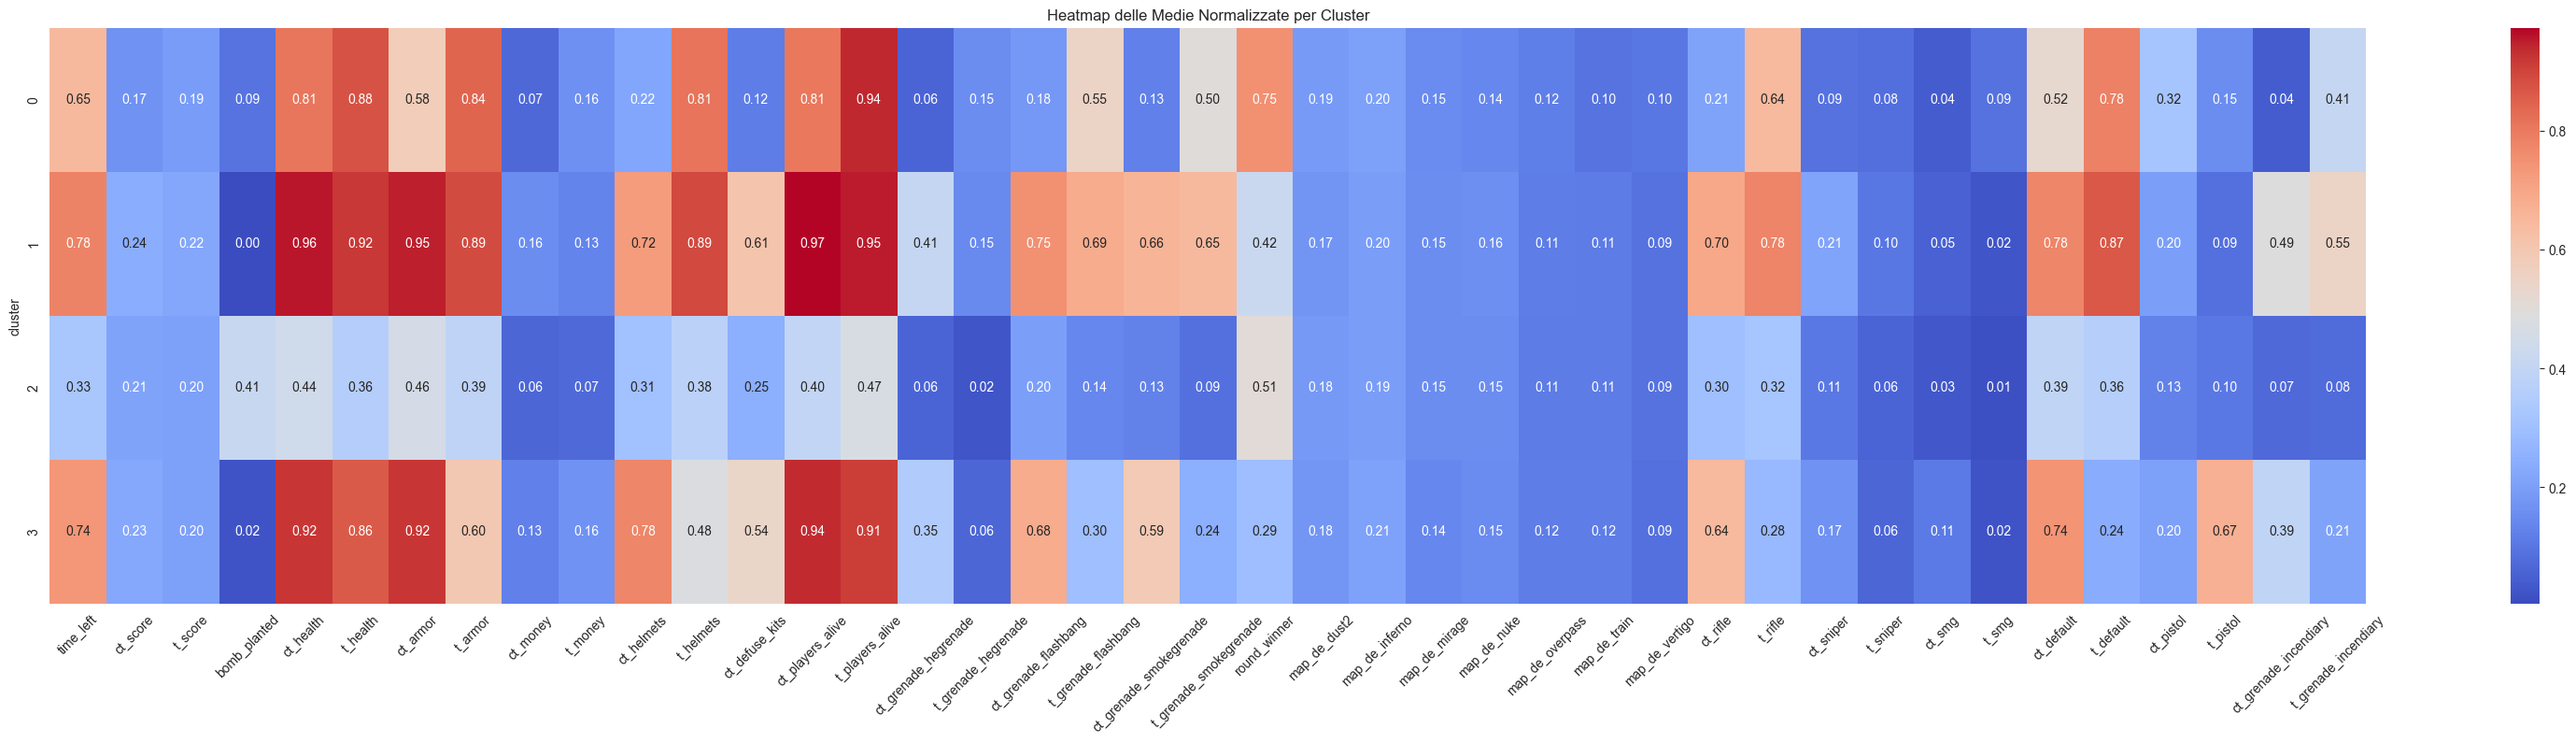

In [42]:
# Calcola la media per ciascun cluster
cluster_means = df_kmeans.groupby('cluster').mean()

# Heatmap delle medie
plt.figure(figsize=(40, 8))
sns.heatmap(cluster_means, cmap='coolwarm', annot=True, fmt=".1f")
plt.title("Medie per Cluster")
plt.xticks(rotation=45)
plt.show()

features = df_kmeans.drop(columns=['cluster'])

# Applica la normalizzazione MinMax solo alle colonne selezionate
scaler = preprocessing.MinMaxScaler()
normalized_data = scaler.fit_transform(features)

# Crea un DataFrame normalizzato
normalized_df = pd.DataFrame(normalized_data, columns=features.columns, index=df_kmeans.index)

normalized_df['cluster'] = df_kmeans['cluster']

# Calcola le medie per cluster
cluster_means_normalized = normalized_df.groupby('cluster').mean()

# Heatmap delle medie normalizzate
plt.figure(figsize=(40, 8))
sns.heatmap(cluster_means_normalized, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Heatmap delle Medie Normalizzate per Cluster")
plt.xticks(rotation=45)
plt.show()

Dai cluster creati possiamo individuare quattro situazioni distinte:
- **Cluster 0**: Questo cluster é caratterizzato da una situazione favorevole per T, con equipaggiamento e salute migliore rispetto a CT.
- **Cluster 1**: Questo cluster é caratterizzato da una situazione equilibrata e mediamente buona per entrambe le squadre. É composto prevalentemente da snapshot verso l'inizio del round.
- **Cluster 2**: Questo cluster è caratterizzato da una situazione precaria sia per CT che per T, in termini di soldi, salute, e tutto ció che ne consegue. Inoltre, é composto prevalentemente da round inoltrati, con poco tempo rimanente.
- **Cluster 3**: Questo cluster é caratterizzato da una situazione favorevole per CT, con equipaggiamento e salute migliore rispetto a T.

Vediamo ora come si distribuiscono i cluster.

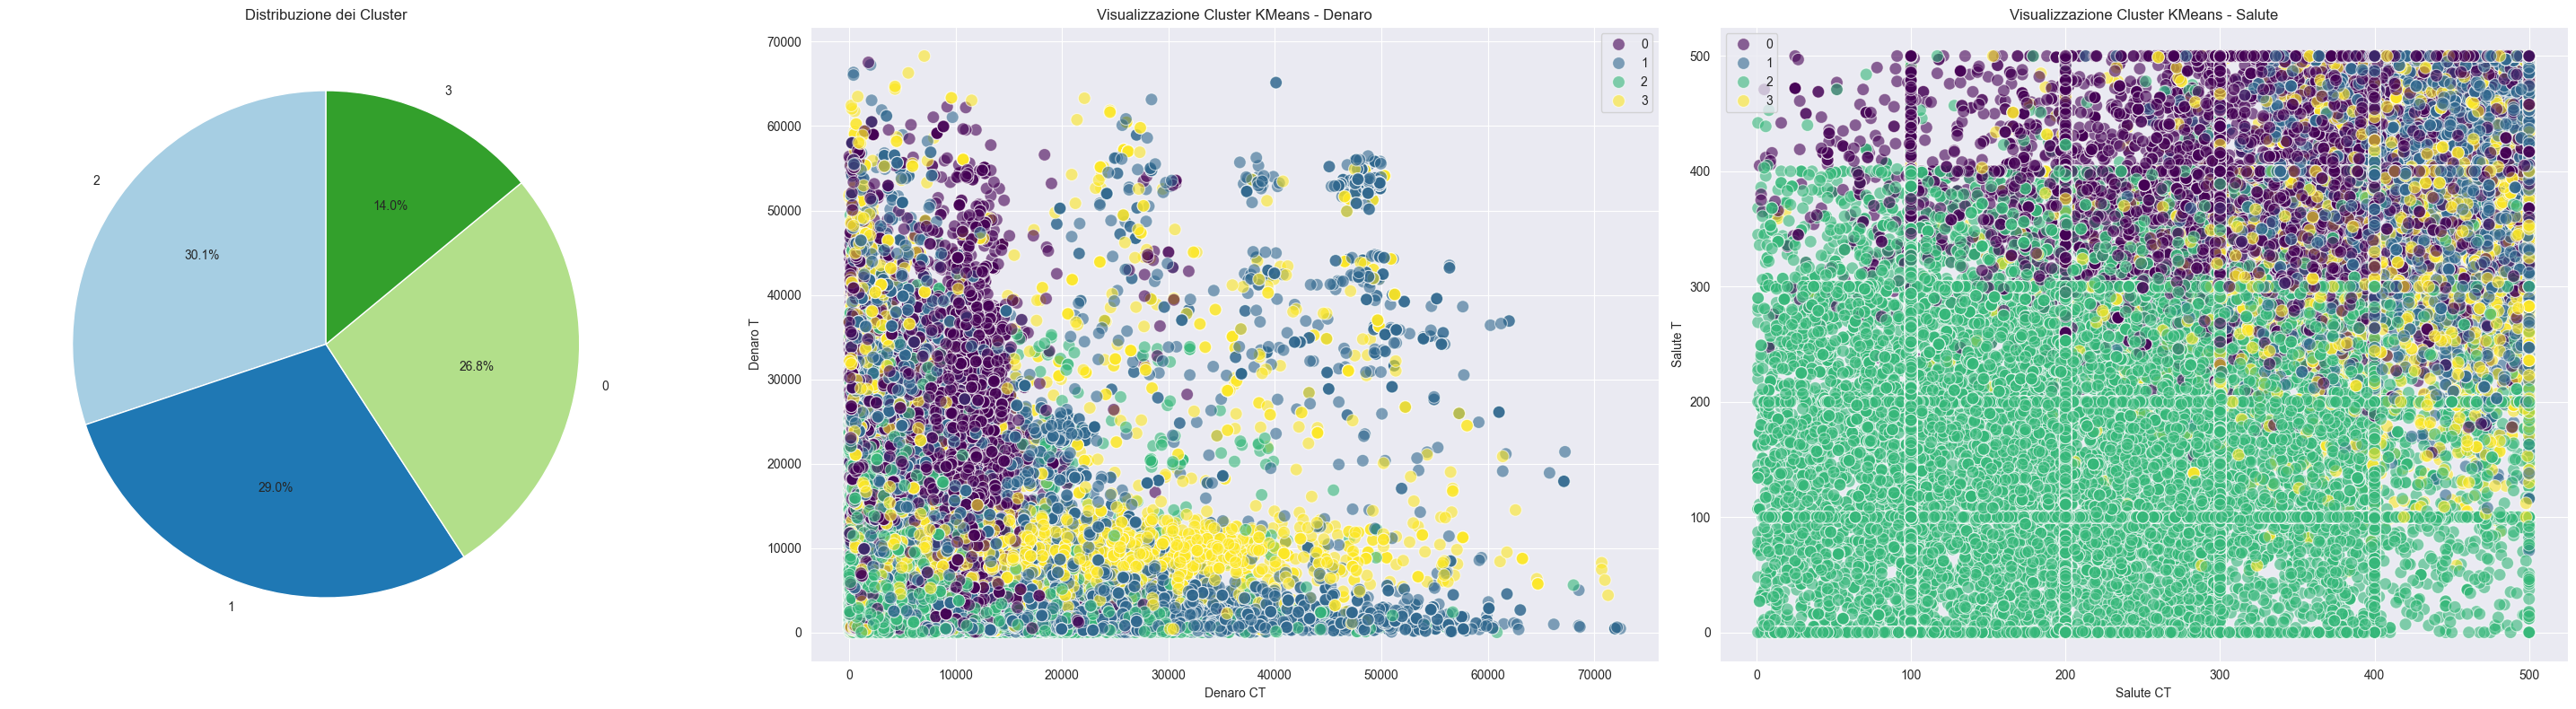

In [43]:
cluster_counts = df_kmeans['cluster'].value_counts()

fig, axes = plt.subplots(1, 3, figsize=(30, 8))
axes[0].pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
axes[0].set_title('Distribuzione dei Cluster')

sns.scatterplot(x=df_kmeans['ct_money'], y=df_kmeans['t_money'], hue=y_kmeans, palette='viridis', s=100, alpha=0.6,
                ax=axes[1])
axes[1].set_title('Visualizzazione Cluster KMeans - Denaro')
axes[1].set_xlabel('Denaro CT')
axes[1].set_ylabel('Denaro T')

sns.scatterplot(x=df_kmeans['ct_health'], y=df_kmeans['t_health'], hue=y_kmeans, palette='viridis', s=100, alpha=0.6,
                ax=axes[2])
axes[2].set_title('Visualizzazione Cluster KMeans - Salute')
axes[2].set_xlabel('Salute CT')
axes[2].set_ylabel('Salute T')

plt.tight_layout()
plt.show()

In [44]:
silhouette_avg = silhouette_score(data_scaled, y_kmeans)
print(f"Silhouette Score: {silhouette_avg}")

calinski_harabasz = calinski_harabasz_score(data_scaled, y_kmeans)
print(f"Calinski-Harabasz Score: {calinski_harabasz}")

# Calcola il Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(data_scaled, y_kmeans)
print(f"Davies-Bouldin Score: {davies_bouldin}")

Silhouette Score: 0.14952335431734337
Calinski-Harabasz Score: 14029.788184859619
Davies-Bouldin Score: 2.111515305028727


Nel clustering iniziale effettuato sull'intero dataframe (46 variabili), abbiamo osservato una distribuzione relativamente uniforme tra i cluster, con il `Cluster 2` che rappresenta la maggior parte dei dati. Questo suggerisce che la maggior parte dei round tende a essere giocata in condizioni di equilibrio tra le squadre. Tuttavia, i grafici di dispersione rivelano una significativa sovrapposizione tra i cluster, confermata dal valore basso degli score, che evidenziano la difficoltà nel separare chiaramente i dati in gruppi distinti e di qualitá.

Per migliorare la qualità del clustering, si é deciso di adottare due approcci alternativi:
- Applicazione del clustering KMeans su **denaro** delle squadre CT e T, escludendo le altre caratteristiche.
- Applicazione del clustering KMeans su **numero di fucili** delle squadre CT e T, escludendo le altre caratteristiche.

Questi approcci dovrebbero consentire di ottenere cluster piú distinti e significativi, andando a identificare situazioni di gioco specifiche in base al denaro o equipaggiamento disponibile per le squadre.

## Clustering KMeans - Denaro

In [45]:
# Seleziona solo le colonne di interesse: denaro CT e T
data = df[['ct_money', 't_money']]

# Normalizza i dati con RobustScaler per gestire meglio gli outliers
scaler = preprocessing.RobustScaler()
data_scaled = scaler.fit_transform(data)

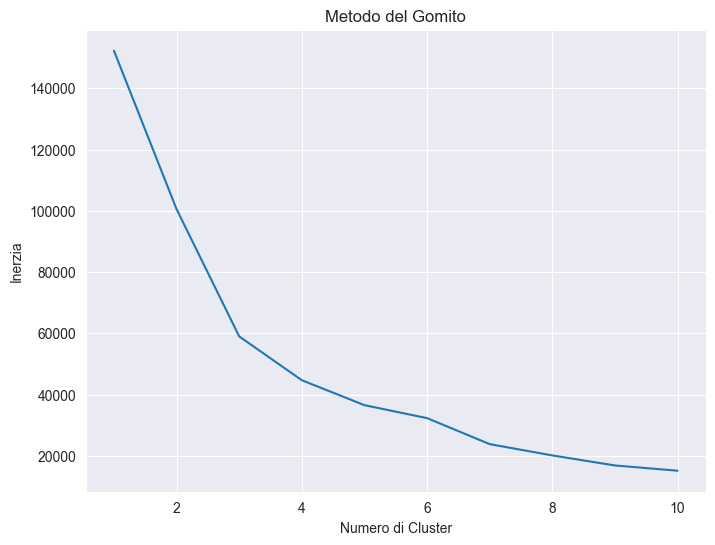

Il k ottimale è: 3


In [46]:
inertias = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=42)
    kmeans.fit(data_scaled)
    inertias.append(kmeans.inertia_)

# Grafico del metodo del gomito
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertias)
plt.title('Metodo del Gomito')
plt.xlabel('Numero di Cluster')
plt.ylabel('Inerzia')
plt.show()

kl = KneeLocator(range(1, 11), inertias, curve="convex", direction="decreasing")
print('Il k ottimale è: ' + str(kl.elbow))

In [47]:
kmeans = KMeans(n_clusters=kl.elbow, init='k-means++', random_state=42)
y_kmeans_money = kmeans.fit_predict(data_scaled)

In [48]:
df_money_kmeans = df.copy()
df_money_kmeans['cluster'] = y_kmeans_money

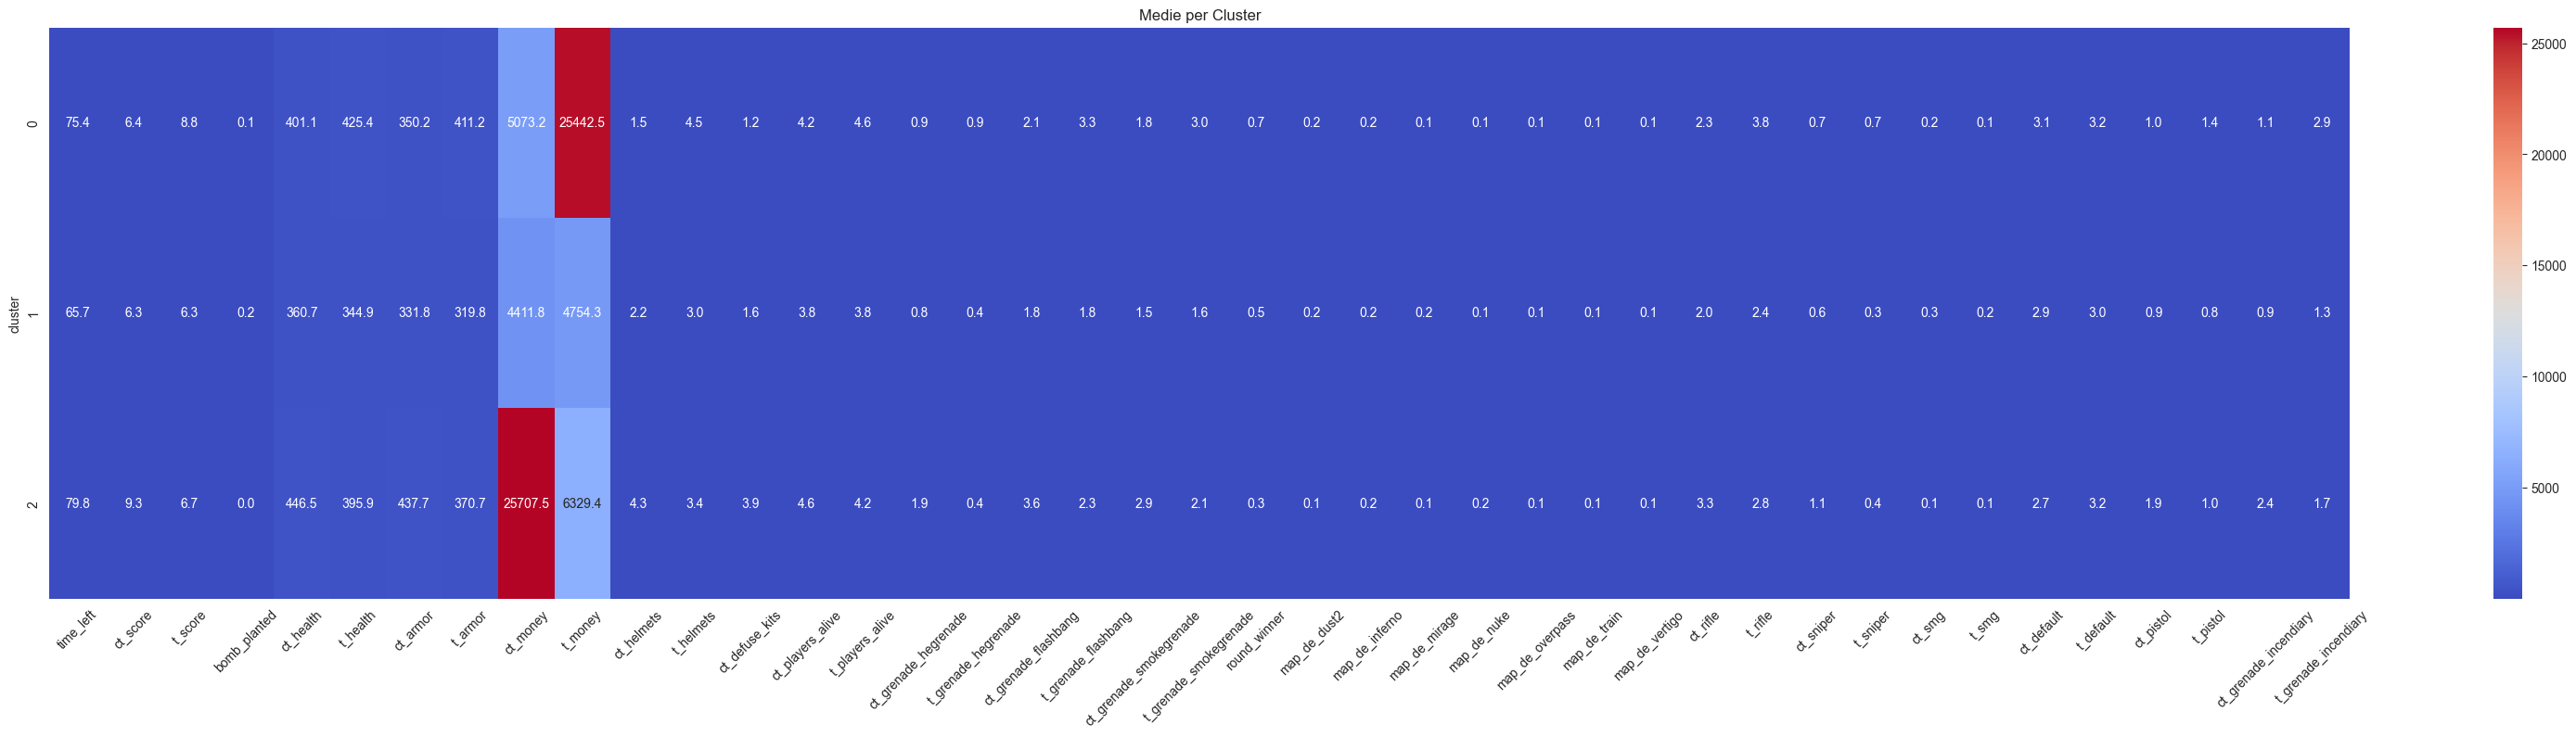

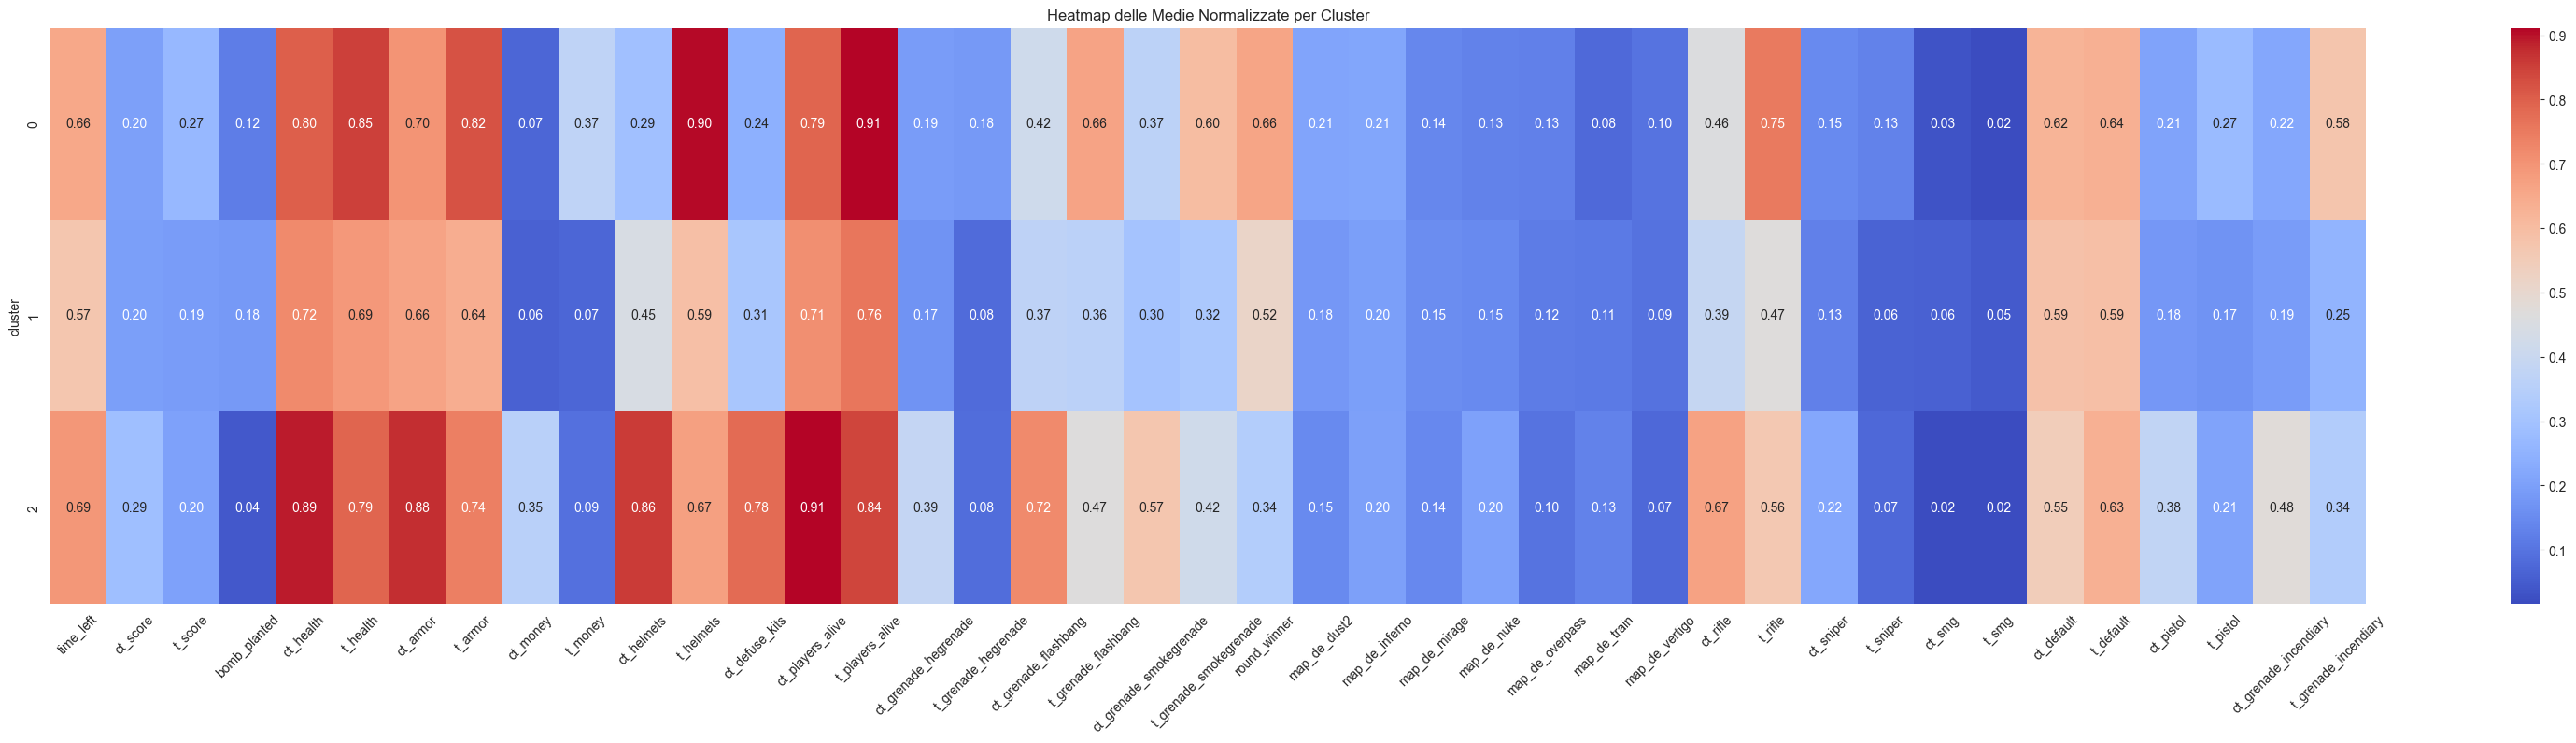

In [49]:
# Calcola la media per ciascun cluster
cluster_means = df_money_kmeans.groupby('cluster').mean()

# Heatmap delle medie
plt.figure(figsize=(40, 8))
sns.heatmap(cluster_means, cmap='coolwarm', annot=True, fmt=".1f")
plt.title("Medie per Cluster")
plt.xticks(rotation=45)
plt.show()

features = df_money_kmeans.drop(columns=['cluster'])

# Applica la normalizzazione MinMax solo alle colonne selezionate
scaler = preprocessing.MinMaxScaler()
normalized_data = scaler.fit_transform(features)

# Crea un DataFrame normalizzato
normalized_df = pd.DataFrame(normalized_data, columns=features.columns, index=df_money_kmeans.index)

normalized_df['cluster'] = df_money_kmeans['cluster']

# Calcola le medie per cluster
cluster_means_normalized = normalized_df.groupby('cluster').mean()

# Heatmap delle medie normalizzate
plt.figure(figsize=(40, 8))
sns.heatmap(cluster_means_normalized, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Heatmap delle Medie Normalizzate per Cluster")
plt.xticks(rotation=45)
plt.show()

In questo caso, dai cluster creati possiamo individuare tre situazioni distinte:
- **Cluster 0**: Questo cluster é caratterizzato da una situazione mediamente favorevole per T, con risorse migliori rispetto a CT.
- **Cluster 1**: Questo cluster è caratterizzato da una situazione mediamente precaria ma equilibrata sia per CT che per T, in termini di soldi, quindi dovrebbero avere piú o meno le stesse risorse.
- **Cluster 2**: Questo cluster é caratterizzato da una situazione mediamente favorevole per CT, con risorse migliori rispetto a T.

Vediamo se abbiamo ottenuto una divisione migliore dei dati rispetto al clustering precedente.

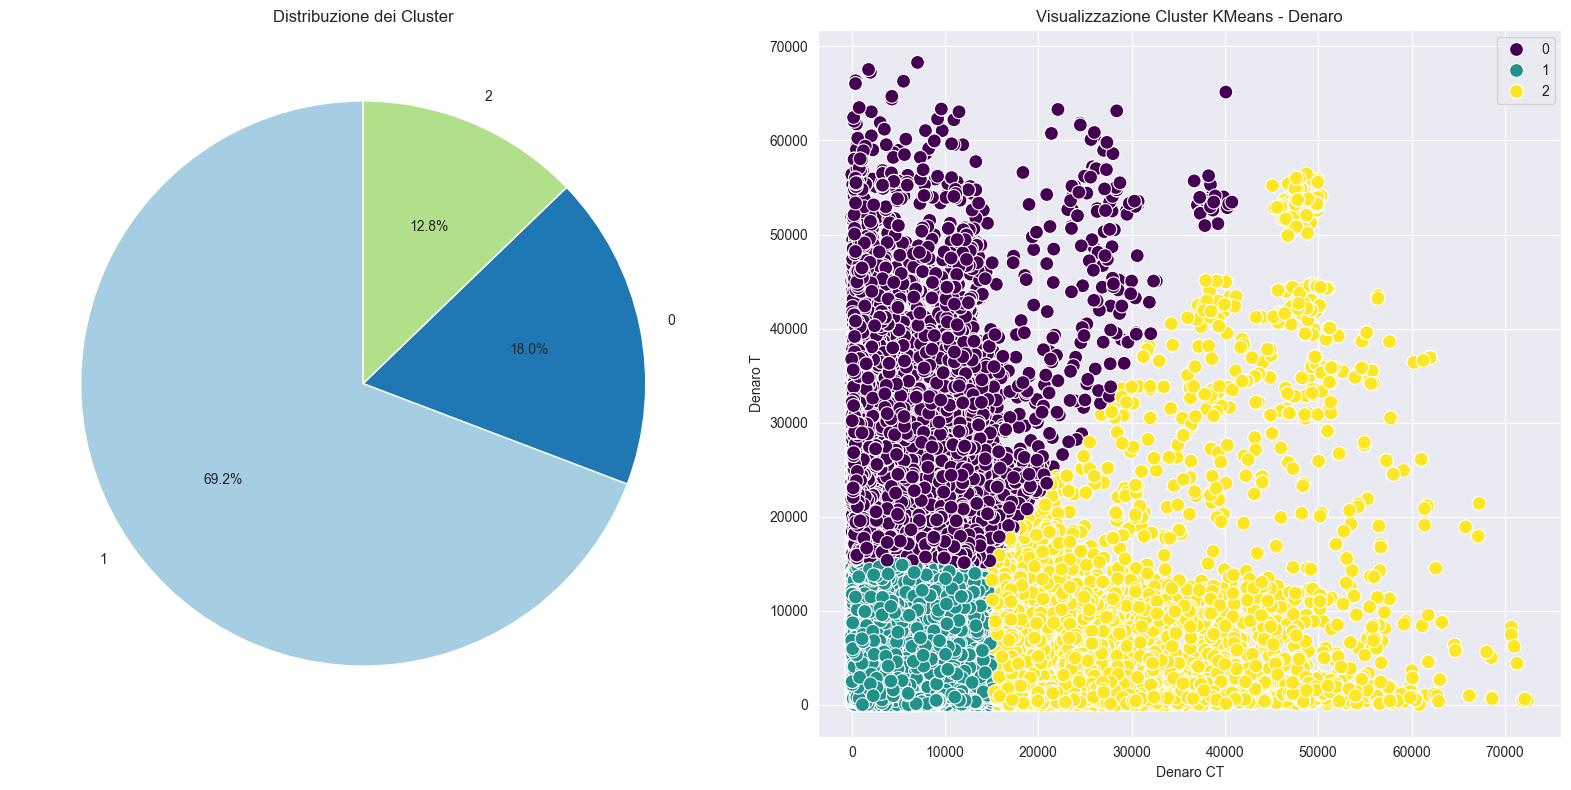

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

cluster_counts = df_money_kmeans['cluster'].value_counts()
axes[0].pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
axes[0].set_title('Distribuzione dei Cluster')

sns.scatterplot(x=df_money_kmeans['ct_money'], y=df_money_kmeans['t_money'], hue=y_kmeans_money, palette='viridis',
                s=100, ax=axes[1])
axes[1].set_title('Visualizzazione Cluster KMeans - Denaro')
axes[1].set_xlabel('Denaro CT')
axes[1].set_ylabel('Denaro T')

plt.tight_layout()
plt.show()

In [51]:
silhouette_avg = silhouette_score(data_scaled, y_kmeans_money)
print(f"Silhouette Score: {silhouette_avg}")

calinski_harabasz = calinski_harabasz_score(data_scaled, y_kmeans_money)
print(f"Calinski-Harabasz Score: {calinski_harabasz}")

davies_bouldin = davies_bouldin_score(data_scaled, y_kmeans_money)
print(f"Davies-Bouldin Score: {davies_bouldin}")

Silhouette Score: 0.5174638449649767
Calinski-Harabasz Score: 69986.75350643114
Davies-Bouldin Score: 0.7357279244282218


Il clustering effettuato sulle variabili rilevanti ha portato a una divisione piú chiara e significativa dei dati, con cluster abbastanza ben distinti e facilmente interpretabili, ma molto poco bilanciati. 
I valori di Silhouette Score, Calinski-Harabasz Score e Davies-Bouldin Score confermano che il clustering ottenuto è di qualità superiore rispetto a quello iniziale.

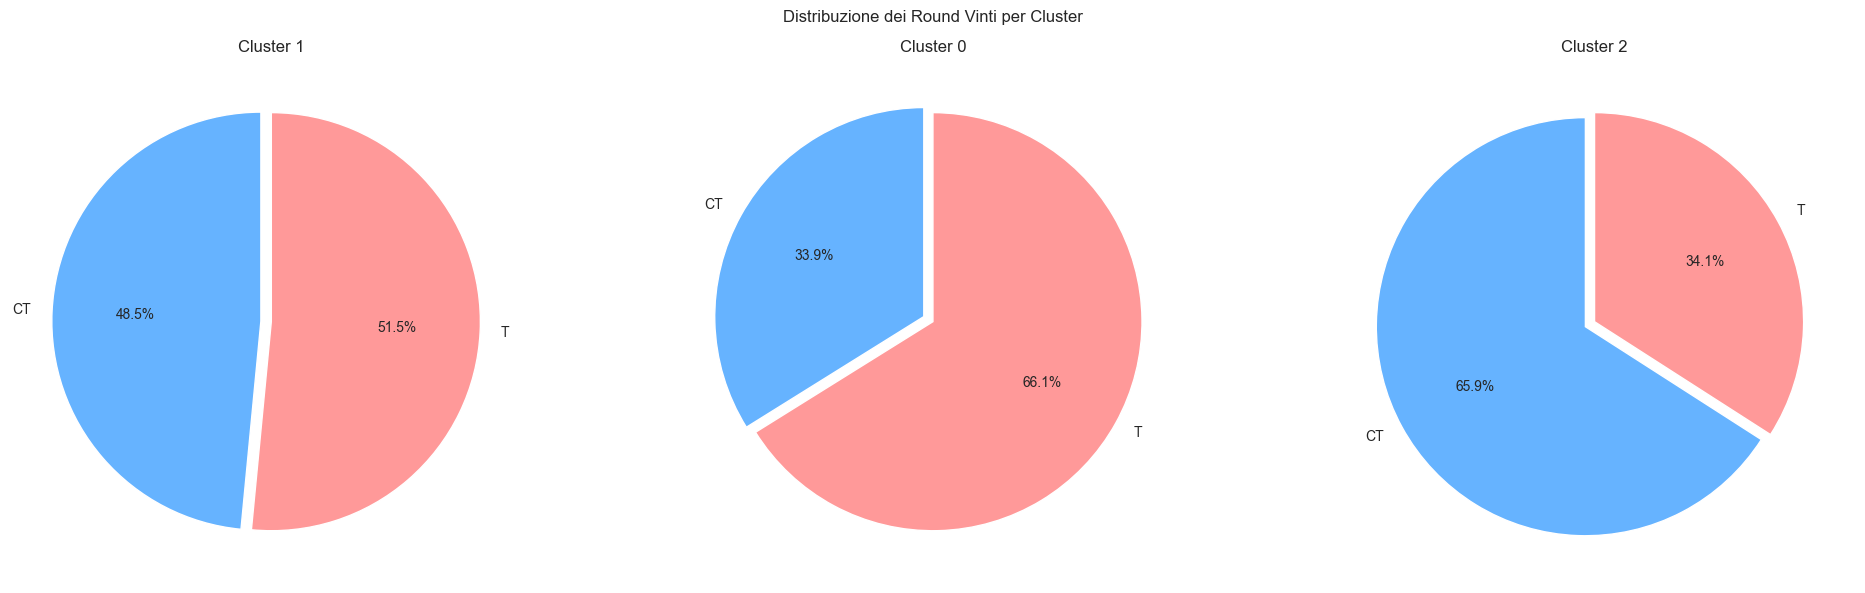

In [52]:
clusters = df_money_kmeans['cluster'].unique()

fig, axes = plt.subplots(1, len(clusters), figsize=(20, 6))
fig.suptitle("Distribuzione dei Round Vinti per Cluster")

for i, cluster in enumerate(clusters):
    # Filtra il dataset per il cluster corrente
    cluster_data = df_money_kmeans[df_money_kmeans['cluster'] == cluster]

    # Conta le occorrenze dei round vinti
    round_winner_counts = cluster_data['round_winner'].value_counts()

    sizes = [round_winner_counts.get(0), round_winner_counts.get(1)]

    axes[i].pie(
        sizes,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        explode=[0.05, 0]
    )
    axes[i].set_title(f'Cluster {cluster}')

plt.tight_layout()
plt.show()


Possiamo vedere che durante i round dove l'economia é equilibrata, i T hanno un leggerissimo vantaggio rispetto ai CT, mentre nei round in cui vi é una disparitá di denaro, la squadra con piú soldi vince la maggior parte dei round, come era stato giá visto precedentemente.

## Clustering KMeans - Fucili
Proviamo ora ad applicare il clustering KMeans sulle variabili `ct_rifle` e `t_rifle`, che rappresentano il numero di fucili posseduti dalle squadre CT e T rispettivamente e che potrebbe rappresentare meglio i round "*full buy*", "*eco*" e "*force buy*", al posto di utilizzare il denaro che potrebbe non essere un indicatore diretto della situazione di gioco, in quanto una squadra potrebbe avere speso tutto il denaro, ma essere comunque in possesso di 5 fucili. Infatti, il denaro indicato dalle colonne `ct_money` e `t_money` non indicano il valore dell'equipaggiamento, ma solo il denaro disponibile in quel momento.

In [53]:
# Seleziona solo le colonne di interesse: rifle CT e T
data = df[['ct_rifle', 't_rifle']]

# Normalizziamo con StandardScaler perché non ci sono outliers
scaler = preprocessing.StandardScaler()
data_scaled = scaler.fit_transform(data)

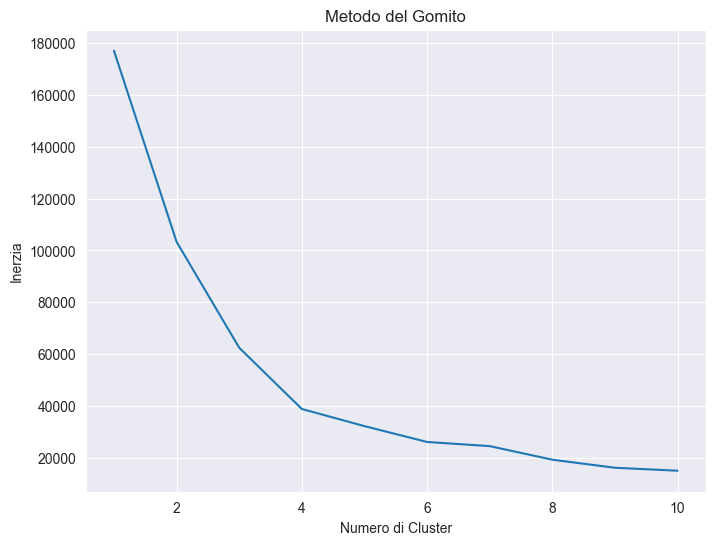

Il k ottimale è: 4


In [54]:
inertias = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=47)
    kmeans.fit(data_scaled)
    inertias.append(kmeans.inertia_)

# Grafico del metodo del gomito
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertias)
plt.title('Metodo del Gomito')
plt.xlabel('Numero di Cluster')
plt.ylabel('Inerzia')
plt.show()

kl = KneeLocator(range(1, 11), inertias, curve="convex", direction="decreasing")
print('Il k ottimale è: ' + str(kl.elbow))

In [55]:
kmeans = KMeans(n_clusters=kl.elbow, init='k-means++', random_state=47)
y_kmeans_rifle = kmeans.fit_predict(data_scaled)

In [56]:
df_rifle_kmeans = df.copy()
df_rifle_kmeans['cluster'] = y_kmeans_rifle

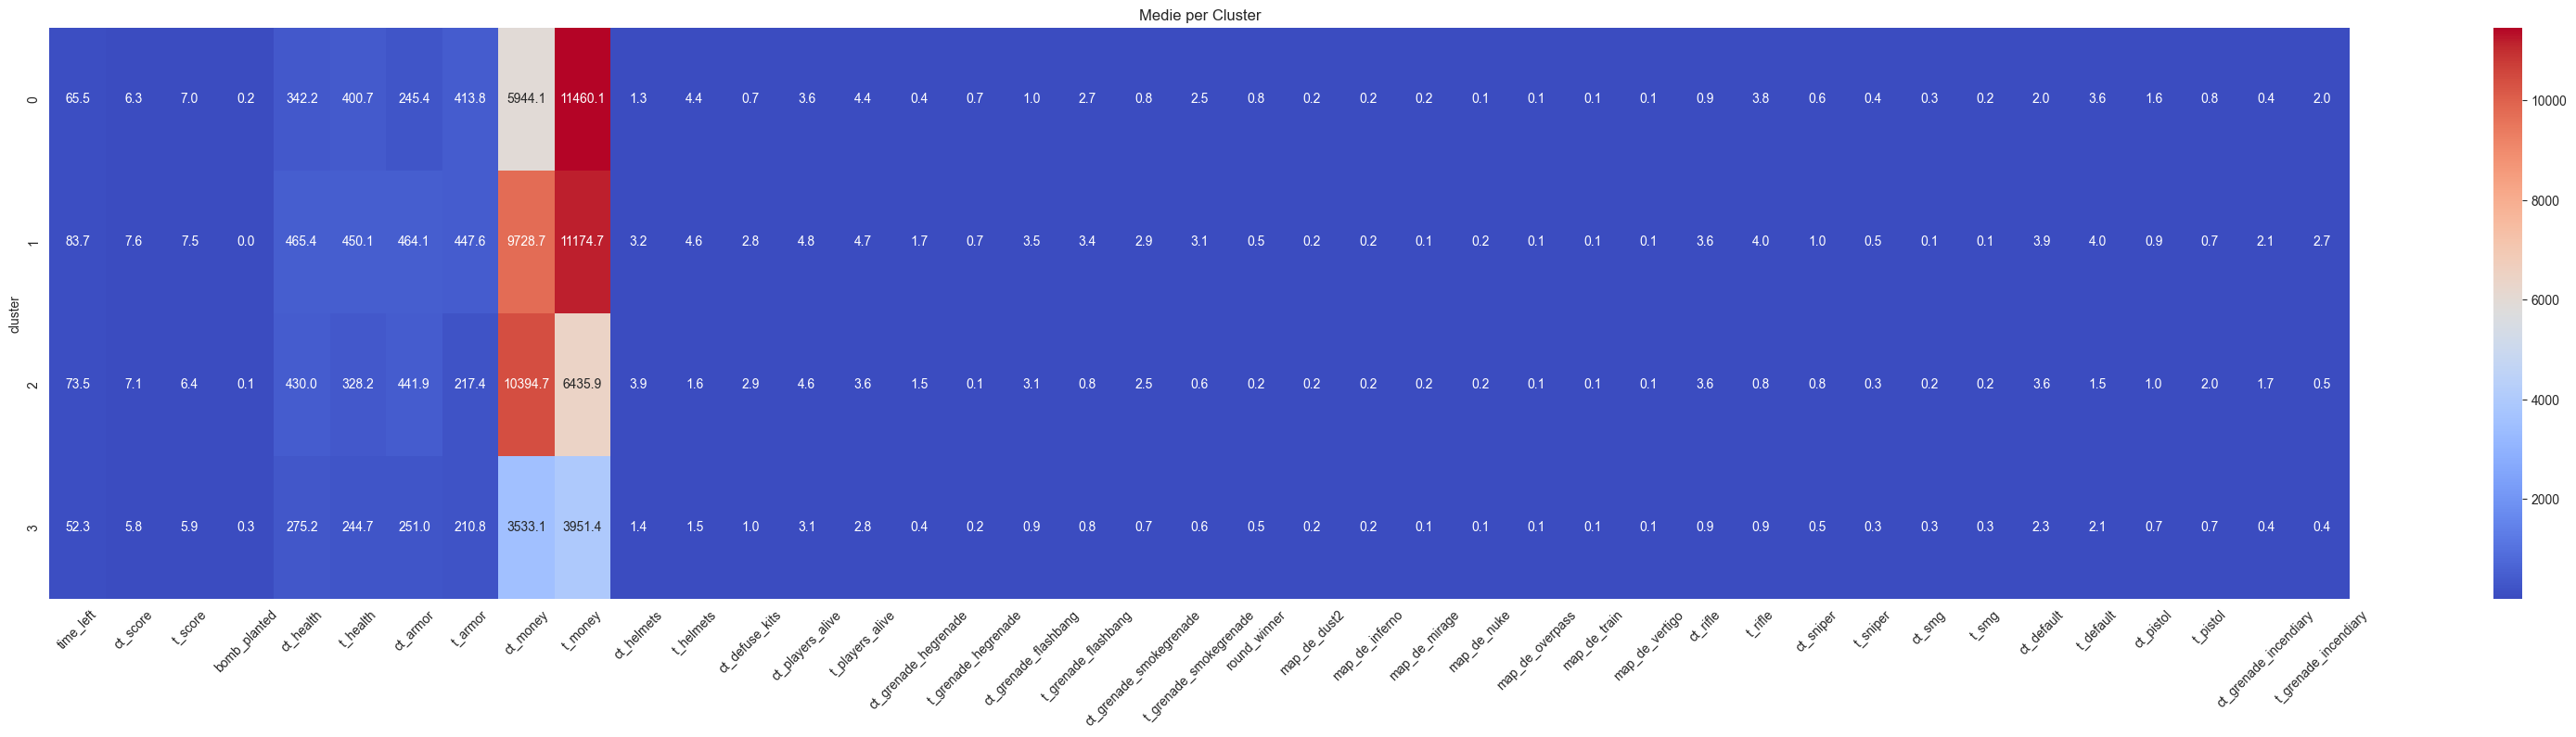

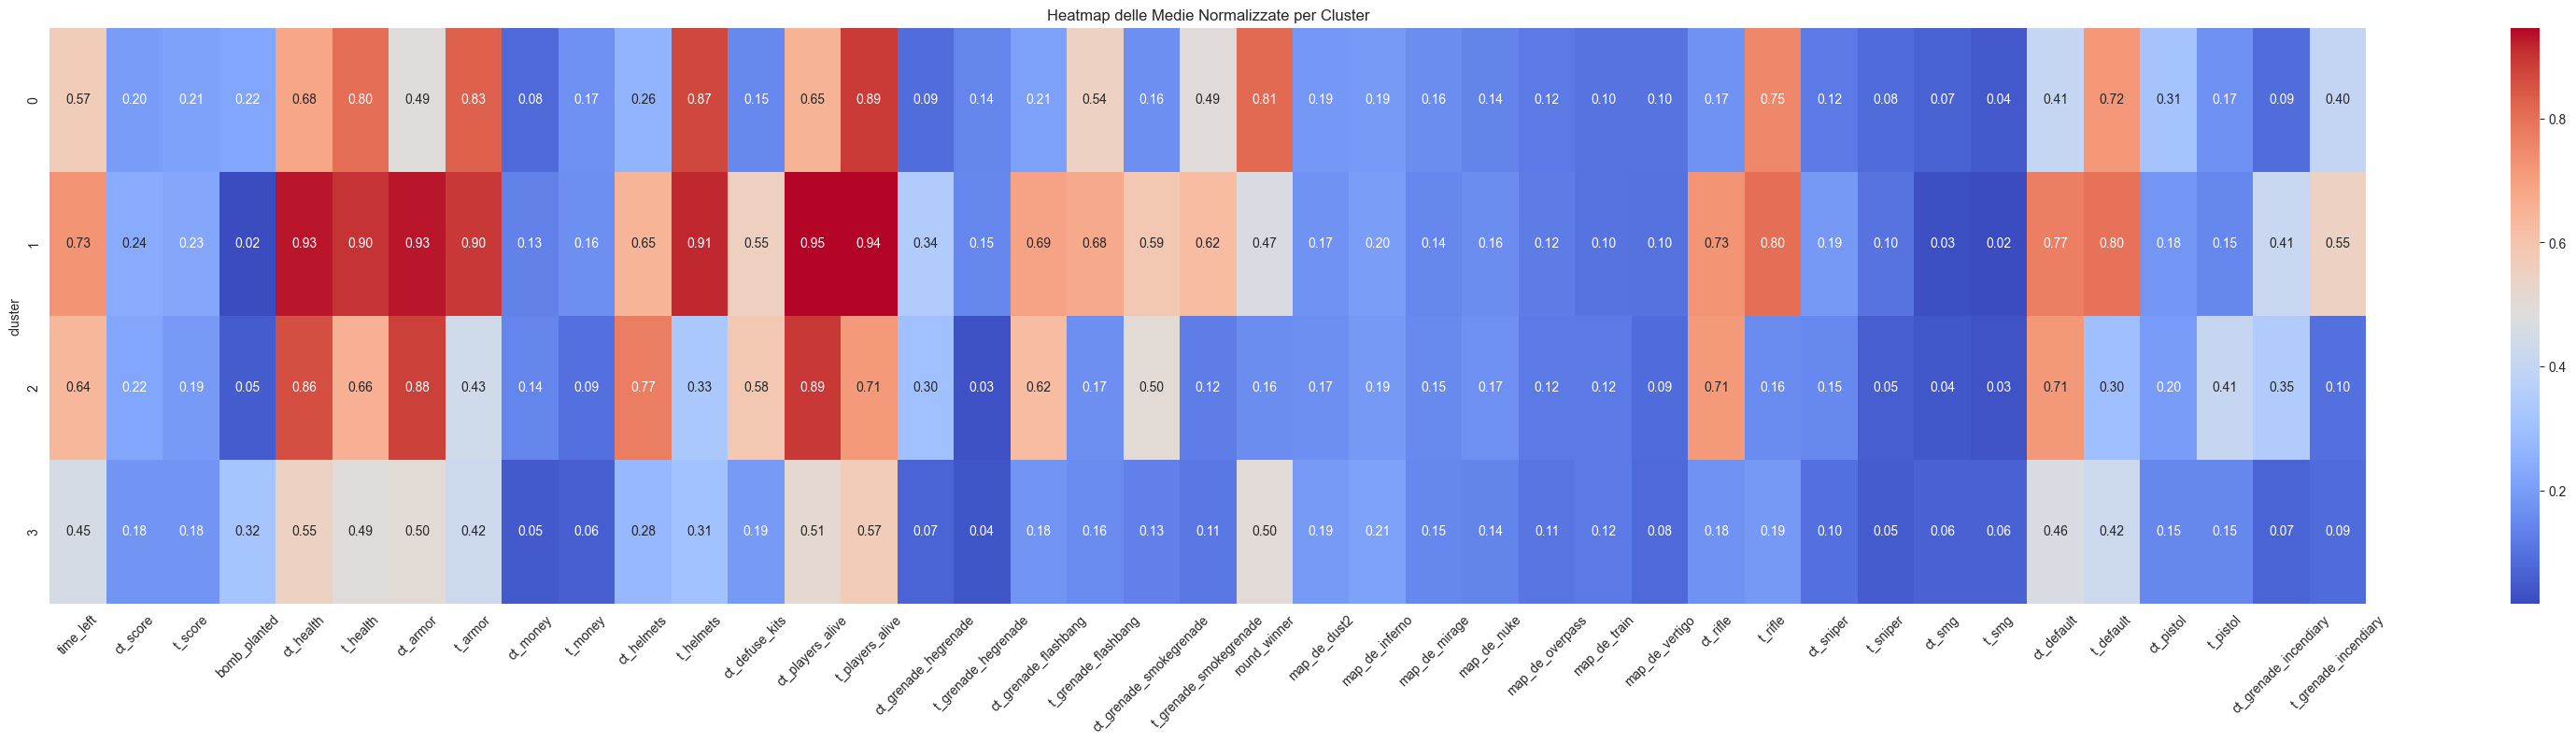

In [57]:
# Calcola la media per ciascun cluster
cluster_means = df_rifle_kmeans.groupby('cluster').mean()

# Heatmap delle medie
plt.figure(figsize=(40, 8))
sns.heatmap(cluster_means, cmap='coolwarm', annot=True, fmt=".1f")
plt.title("Medie per Cluster")
plt.xticks(rotation=45)
plt.show()

features = df_rifle_kmeans.drop(columns=['cluster'])

# Applica la normalizzazione MinMax solo alle colonne selezionate
scaler = preprocessing.MinMaxScaler()
normalized_data = scaler.fit_transform(features)

# Crea un DataFrame normalizzato
normalized_df = pd.DataFrame(normalized_data, columns=features.columns, index=df_rifle_kmeans.index)

normalized_df['cluster'] = df_rifle_kmeans['cluster']

# Calcola le medie per cluster
cluster_means_normalized = normalized_df.groupby('cluster').mean()

# Heatmap delle medie normalizzate
plt.figure(figsize=(40, 8))
sns.heatmap(cluster_means_normalized, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Heatmap delle Medie Normalizzate per Cluster")
plt.xticks(rotation=45)
plt.show()

In questo caso, dai cluster creati possiamo individuare quattro situazioni distinte:
- **Cluster 0**: Questo cluster é caratterizzato da una situazione favorevole per T, con piú fucili rispetto a CT. Rappresenta probabilmente una situazione di "*full buy*" per i Terroristi contro una situazione di "*eco*" o "*force*" per i Contro-Terroristi.
- **Cluster 1**: Questo cluster é caratterizzato da una situazione equilibrata e mediamente buona per entrambe le squadre. Rappresenta probabilmente una situazione di "*full buy*" per entrambe le squadre.
- **Cluster 2**: Questo cluster é caratterizzato da una situazione favorevole per CT, con piú fucili rispetto a T. Rappresenta probabilmente una situazione di "*full buy*" per i Contro-Terroristi contro una situazione di "*eco*" o "*force*" per i Terroristi.
- **Cluster 3**: Questo cluster é caratterizzato da una situazione equilibrata ma mediamente cattiva per entrambe le squadre. Rappresenta probabilmente una situazione di "*eco*" o "*force buy*" per entrambe le squadre. Tipicamente sono i bonus round.

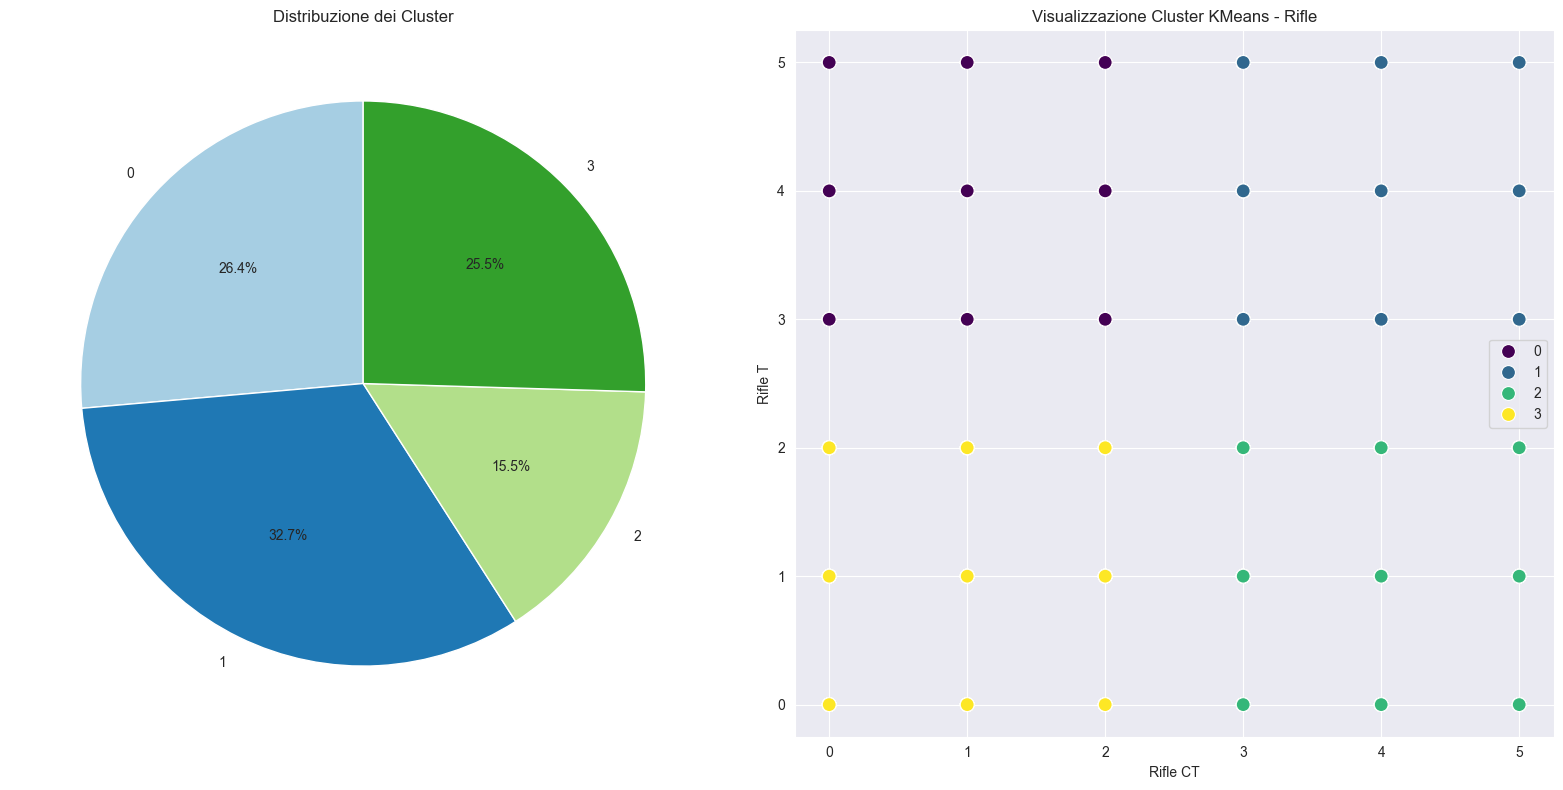

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

cluster_counts = df_rifle_kmeans['cluster'].value_counts()
cluster_counts = cluster_counts.sort_index()

axes[0].pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
axes[0].set_title('Distribuzione dei Cluster')

sns.scatterplot(x=df_rifle_kmeans['ct_rifle'], y=df_rifle_kmeans['t_rifle'], hue=y_kmeans_rifle, palette='viridis',
                s=100, ax=axes[1])
axes[1].set_title('Visualizzazione Cluster KMeans - Rifle')
axes[1].set_xlabel('Rifle CT')
axes[1].set_ylabel('Rifle T')

plt.tight_layout()
plt.show()

In [59]:
silhouette_avg = silhouette_score(data_scaled, y_kmeans_rifle)
print(f"Silhouette Score: {silhouette_avg}")

calinski_harabasz = calinski_harabasz_score(data_scaled, y_kmeans_rifle)
print(f"Calinski-Harabasz Score: {calinski_harabasz}")

davies_bouldin = davies_bouldin_score(data_scaled, y_kmeans_rifle)
print(f"Davies-Bouldin Score: {davies_bouldin}")

Silhouette Score: 0.48236177382332734
Calinski-Harabasz Score: 105370.62011306244
Davies-Bouldin Score: 0.7594849037722822


Sembra che anche il clustering basato sul numero di fucili posseduti dalle squadre CT e T abbia portato a una divisione chiara e significativa dei dati, con cluster ben distinti e facilmente interpretabili. 
Il valore di Silhouette Score é leggermente minore rispetto al clustering basato sul denaro, ma comunque paragonabile. 
Il valore di Davies-Bouldin Score é leggermente piú alto, mentre il Calinski-Harabasz Score é molto piú alto, indicando tutto sommato una qualitá del clustering migliore rispetto a quello basato sul denaro.

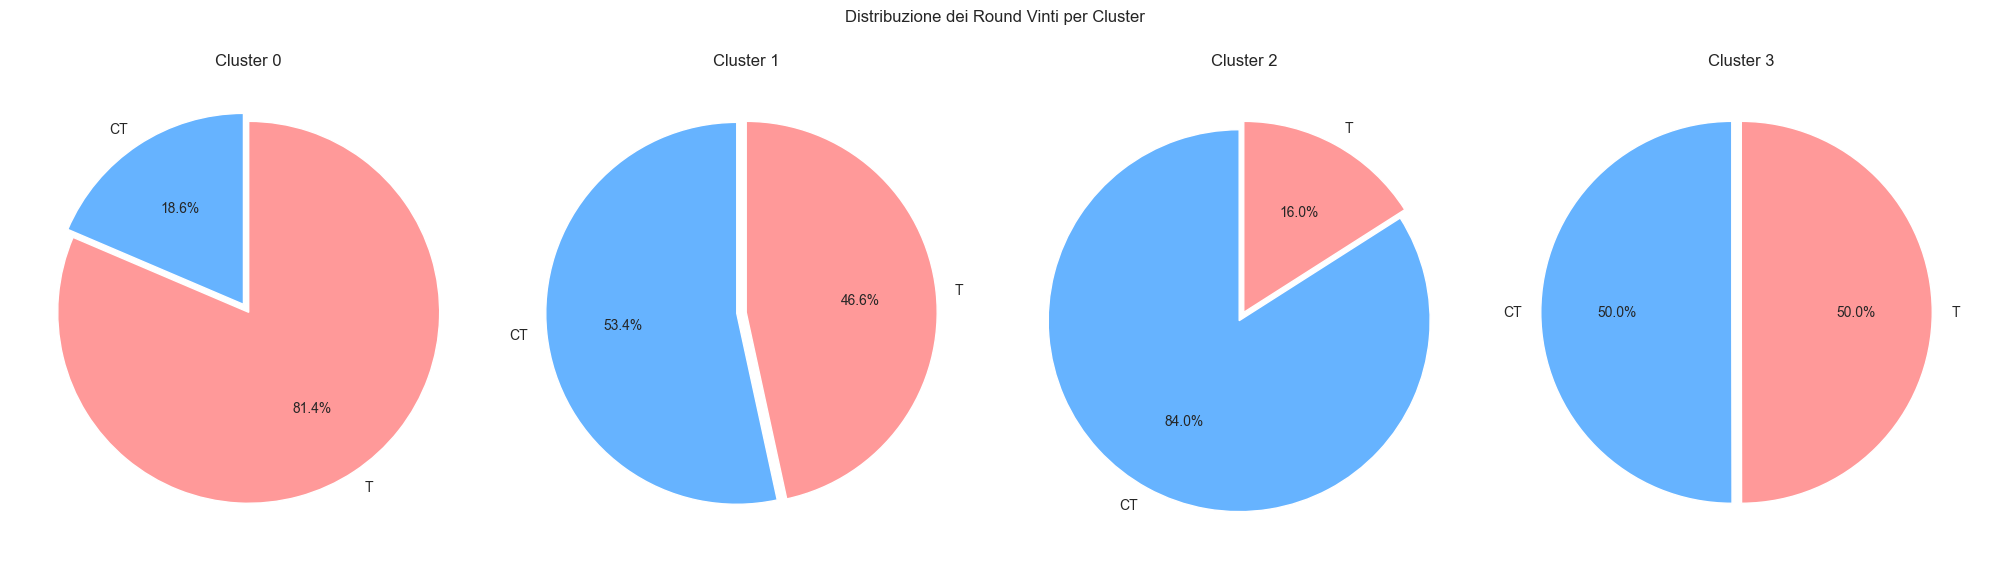

In [60]:
clusters = df_rifle_kmeans['cluster'].unique()
clusters.sort()

fig, axes = plt.subplots(1, len(clusters), figsize=(20, 6))
fig.suptitle("Distribuzione dei Round Vinti per Cluster")

for i, cluster in enumerate(clusters):
    # Filtra il dataset per il cluster corrente
    cluster_data = df_rifle_kmeans[df_rifle_kmeans['cluster'] == cluster]

    # Conta le occorrenze dei round vinti
    round_winner_counts = cluster_data['round_winner'].value_counts()

    sizes = [round_winner_counts.get(0), round_winner_counts.get(1)]

    axes[i].pie(
        sizes,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        explode=[0.05, 0]
    )
    axes[i].set_title(f'Cluster {cluster}')

plt.tight_layout()
plt.show()


Inseriamo quindi entrambi i clustering nel DataFrame originale, eliminando le colonne originali utilizzate per il clustering, in quanto risulterebero ridondanti.

In [61]:
df['cluster_money'] = y_kmeans_money
df['cluster_rifle'] = y_kmeans_rifle

In [62]:
# One-Hot encoding per i cluster
onehot_money = pd.get_dummies(df['cluster_money'], prefix='cluster_money').astype(int)
onehot_rifle = pd.get_dummies(df['cluster_rifle'], prefix='cluster_rifle').astype(int)

# Unisci le nuove colonne al DataFrame originale
df = pd.concat([df, onehot_money, onehot_rifle], axis=1)

# Rimuovi le colonne originali
df = df.drop(columns=['cluster_money', 'cluster_rifle'])

# Rimuovi le colonne che rappresentano i cluster
df = df.drop(columns=['t_rifle', 'ct_rifle', 't_money', 'ct_money'])

df.head()

time_left  ct_score  t_score  bomb_planted  ct_health  t_health  ct_armor  \
0      96.03       0.0      0.0             0      391.0     400.0     294.0   
1      76.03       0.0      0.0             0      391.0     400.0     294.0   
2     114.97       1.0      0.0             0      500.0     500.0     500.0   
3      94.97       1.0      0.0             0      295.0     111.0     296.0   
4      74.97       1.0      0.0             0      295.0     111.0     296.0   

   t_armor  ct_helmets  t_helmets  ...  t_pistol  ct_grenade_incendiary  \
0    200.0         0.0        0.0  ...       0.0                    0.0   
1    200.0         0.0        0.0  ...       0.0                    0.0   
2      0.0         5.0        0.0  ...       0.0                    1.0   
3      0.0         3.0        0.0  ...       0.0                    0.0   
4      0.0         3.0        0.0  ...       0.0                    0.0   

   t_grenade_incendiary  cluster_money_0  cluster_money_1  cluster_money_2  \
0                   0.0                0                1                0   
1                   0.0                0                1                0   
2                   0.0                0                1                0   
3                   0.0                0                1                0   
4                   0.0                0                1                0   

   cluster_rifle_0  cluster_rifle_1  cluster_rifle_2  cluster_rifle_3  
0                0                0                0                1  
1                0                0                0                1  
2                0                0                1                0  
3                0                0                0                1  
4                0                0                0                1  

[5 rows x 44 columns]

---

# Apprendimento Supervisionato

In questa sezione del caso di studio, ci concentreremo sull'apprendimento supervisionato per prevedere il risultato di un round in base alle caratteristiche delle squadre. Utilizzeremo i seguenti modelli di classificazione:
- **K-Nearest Neighbors (KNN):** Per la sua semplicità e adattabilitá.
- **Random Forest:** Per le sue performance anche su dataset con molte features e/o rumorosi.
- **XGBoost:** Per le sue prestazioni eccezionali su dataset complessi, grazie al boosting iterativo.

Per ogni modello, eseguiremo la ricerca degli iperparametri per trovare la configurazione migliore. Successivamente, addestreremo i modelli e valuteremo le loro performance sui dati di test.
Utilizzeremo una K-Fold Cross-Validation con 5 fold per validare i modelli.

Iniziamo dividendo il dataset in features e target, e successivamente in training (80%) e test set (20%), senza stratificazione poiché il dataset é abbastanza bilanciato.

In [63]:
# Dividi il dataset in features e target
X = df.drop(columns=['round_winner'])
y = df['round_winner']

# Dividi il dataset in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Prima di addestrare i modelli, normalizziamo i dati utilizzando il **`RobustScaler`**, che é piú robusto rispetto al `MinMaxScaler`/`StandardScaler` alla presenza di outliers, come nel caso del nostro dataset.
Questo passaggio é importante in special modo per i modelli sensibili alle scale, come il KNN, ma ha generalmente un impatto positivo su tutti i modelli.

In [64]:
# Normalizza i dati con RobustScaler
scaler = preprocessing.RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [65]:
models = {
    'K-Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': xg.XGBClassifier()
}

# Definisci gli iperparametri da cercare per ogni modello
params = {
    'K-Neighbors': {
        'n_neighbors': [1, 3, 5, 7],
        'metric': ['euclidean', 'manhattan'],
        'n_jobs': [-1]
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [20, 25],
        'min_samples_split': [5, 10, 15, 20],
        'min_samples_leaf': [2, 4, 6, 8],
        'random_state': [13],
        'n_jobs': [-1]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 150, 200, 300],
        'max_depth': [3, 5, 7, 10],
        'learning_rate': [0.01, 0.1, 0.5],
        'n_jobs': [-1]
    }
}

In [67]:
%%capture --no-stdout

# Grid Search per la ricerca degli iperparametri
best_models_first = hyperparameter_search(models, params, X_train, y_train, method="grid", scoring='accuracy')

Ricerca degli iperparametri per K-Neighbors (grid)
Iperparametri migliori per K-Neighbors: {'metric': 'manhattan', 'n_jobs': -1, 'n_neighbors': 1}
Best accuracy: 0.8242

Ricerca degli iperparametri per Random Forest (grid)
Iperparametri migliori per Random Forest: {'max_depth': 25, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200, 'n_jobs': -1, 'random_state': 13}
Best accuracy: 0.8075

Ricerca degli iperparametri per XGBoost (grid)
Iperparametri migliori per XGBoost: {'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 300, 'n_jobs': -1}
Best accuracy: 0.8221



Procediamo con l'addestramento e la valutazione dei modelli.

In tutto il caso di studio, calcoleremo le metriche di Accuracy, Recall, Precision e F1 Score, sia per il Test Set, che per il Training Set, per avere una visione completa delle performance dei modelli e per identificare eventuali problemi di **overfitting**.
Valuteremo anche le curve di apprendimento per verificare se i modelli stanno imparando dai dati e le curve ROC-AUC per valutare la capacità di discriminazione dei modelli.

In [68]:
%%capture --no-stdout

# Valutazione dei modelli
score_test_first, score_train_first = evaluate_models(best_models_first, X_train, y_train, X_test, y_test)


Addestramento e valutazione per il modello: K-Neighbors

Matrice di Confusione - K-Neighbors (Test):
[[7030 1468]
 [1424 7794]]

Matrice di Confusione - K-Neighbors (Train):
[[34089     4]
 [    8 36760]]

Addestramento e valutazione per il modello: Random Forest

Matrice di Confusione - Random Forest (Test):
[[7084 1414]
 [1779 7439]]

Matrice di Confusione - Random Forest (Train):
[[33375   718]
 [  819 35949]]

Addestramento e valutazione per il modello: XGBoost

Matrice di Confusione - XGBoost (Test):
[[7133 1365]
 [1466 7752]]

Matrice di Confusione - XGBoost (Train):
[[34083    10]
 [   11 36757]]

Metriche sul Test Set:
                Modello    Recall  Precision  F1 Score  Accuracy
0    K-Neighbors (Test)  0.845520   0.841503  0.843506  0.836758
1  Random Forest (Test)  0.807008   0.840280  0.823308  0.819767
2        XGBoost (Test)  0.840963   0.850280  0.845596  0.840201

Metriche sul Training Set:
                 Modello    Recall  Precision  F1 Score  Accuracy
0    K-Nei

Calcolo delle curve di apprendimento per K-Neighbors
Calcolo delle curve di apprendimento per Random Forest
Calcolo delle curve di apprendimento per XGBoost


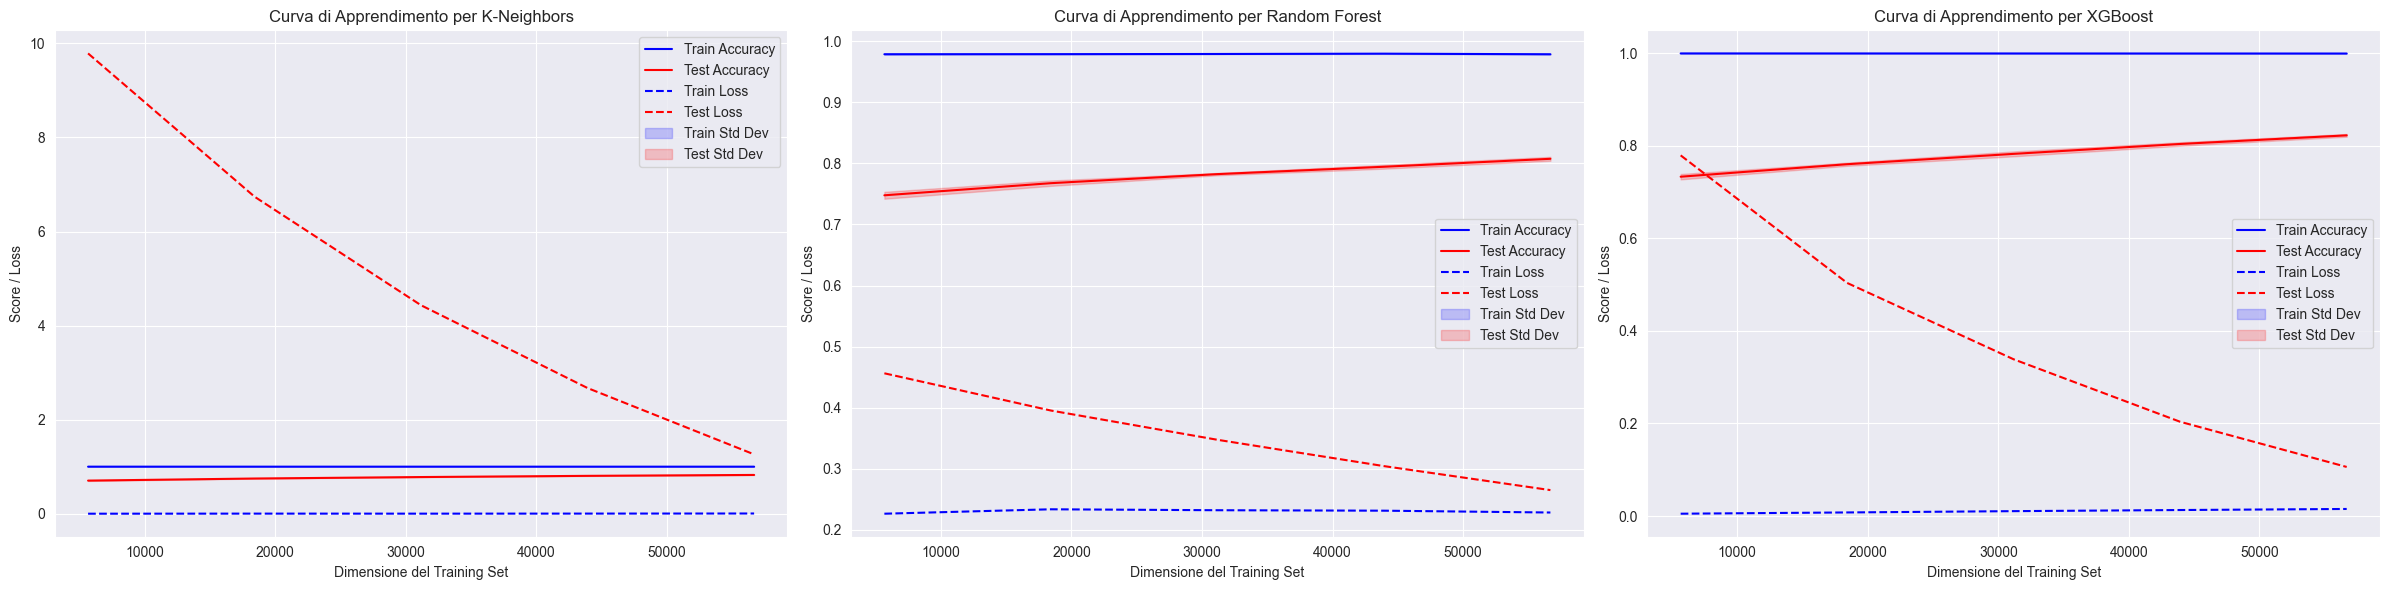

In [69]:
# Traccia le curve di apprendimento
plot_learning_curves(best_models_first, X_train, y_train)

/home/pierdamianozagaria/Documenti/Universita/Esami-da-fare/ICon/Progetto-ICON/venv/lib64/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/home/pierdamianozagaria/Documenti/Universita/Esami-da-fare/ICon/Progetto-ICON/venv/lib64/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names



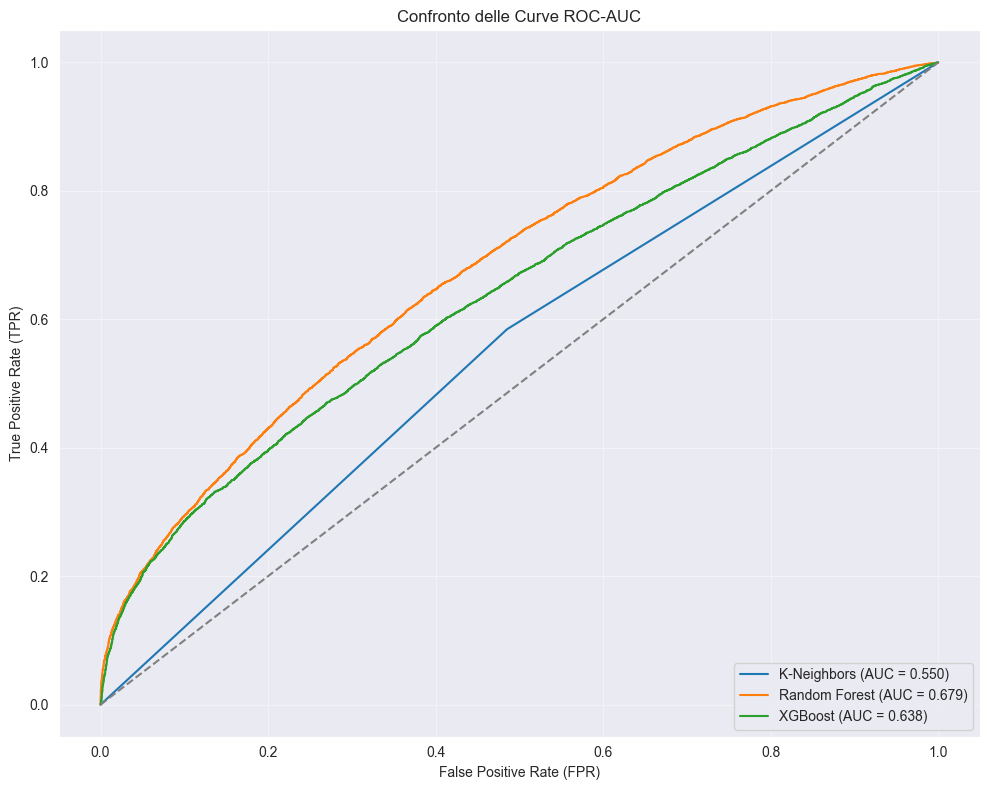

Punteggi ROC-AUC per ciascun modello:
K-Neighbors: 0.550
Random Forest: 0.679
XGBoost: 0.638


In [124]:
roc_auc = plot_roc_auc(best_models_first, X_test, y_test)

Dai risultati ottenuti, é evidente la presenza di overfitting in tutti i modelli, con performance di molto migliori sul training set rispetto al test set. Questo potrebbe essere dovuto alla complessitá dei modelli utilizzati, che potrebbero non generalizzare bene i dati.

Inoltre, la curva ROC-AUC mostra che i modelli faticano a separare in modo netto le due classi, con **Random Forest** e **XGBoost** che mostrano una separazione accettabile rispetto a **K-Nearest Neighbors**, che con un AUC di ~0.55, non é in grado di discriminare bene le classi, mostrando un comportamento simile al classificatore casuale.

## Ottimizzazione dei modelli

Proviamo a ottimizzare i modelli, rendendoli meno complessi per ridurre l'overfitting e rendere i modelli piú robusti e piú capaci di generalizzare.

In [70]:
params_bayes = {
    'K-Neighbors': {
        'n_neighbors': (20, 25),
        'metric': ['manhattan'],
        'n_jobs': [-1]
    },
    'Random Forest': {
        'n_estimators': (50, 200),
        'max_depth': (8, 9),  
        'min_samples_split': (10, 20),
        'min_samples_leaf': (2, 6),
        'max_features': ['sqrt'],
        'bootstrap': [True],
        'random_state': [13],
        'n_jobs': [-1]
    },
    'XGBoost': {
        'max_depth': (5, 7),
        'learning_rate': (0.01, 0.025),
        'n_estimators': (100, 300),
        'colsample_bytree': (0.3, 1.0),
        'subsample': (0.5, 1.0),
        'gamma': (0, 10),
        'min_child_weight': (1, 10),
        'reg_lambda': (0, 10),
        'reg_alpha': (0, 10),
        'random_state': [13],
        'n_jobs': [-1]
    }
}

In [71]:
%%capture --no-stdout

best_models_optimised = hyperparameter_search(models, params_bayes, X_train, y_train, method="bayes", scoring='accuracy')

Ricerca degli iperparametri per K-Neighbors (bayes)
Iperparametri migliori per K-Neighbors: OrderedDict({'metric': 'manhattan', 'n_jobs': -1, 'n_neighbors': 20})
Best accuracy: 0.7591

Ricerca degli iperparametri per Random Forest (bayes)
Iperparametri migliori per Random Forest: OrderedDict({'bootstrap': True, 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 11, 'n_estimators': 200, 'n_jobs': -1, 'random_state': 13})
Best accuracy: 0.7491

Ricerca degli iperparametri per XGBoost (bayes)
Iperparametri migliori per XGBoost: OrderedDict({'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.025, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 300, 'n_jobs': -1, 'random_state': 13, 'reg_alpha': 0, 'reg_lambda': 0, 'subsample': 0.7133647442370248})
Best accuracy: 0.7644



In [72]:
%%capture --no-stdout

# Valutazione dei modelli
score_test_optimised, score_train_optimised = evaluate_models(best_models_optimised, X_train, y_train, X_test, y_test)


Addestramento e valutazione per il modello: K-Neighbors

Matrice di Confusione - K-Neighbors (Test):
[[6759 1739]
 [2382 6836]]

Matrice di Confusione - K-Neighbors (Train):
[[28107  5986]
 [ 8678 28090]]

Addestramento e valutazione per il modello: Random Forest

Matrice di Confusione - Random Forest (Test):
[[6706 1792]
 [2664 6554]]

Matrice di Confusione - Random Forest (Train):
[[27445  6648]
 [10259 26509]]

Addestramento e valutazione per il modello: XGBoost

Matrice di Confusione - XGBoost (Test):
[[6752 1746]
 [2402 6816]]

Matrice di Confusione - XGBoost (Train):
[[28233  5860]
 [ 8718 28050]]

Metriche sul Test Set:
                Modello    Recall  Precision  F1 Score  Accuracy
0    K-Neighbors (Test)  0.741593   0.797201  0.768392  0.767385
1  Random Forest (Test)  0.711000   0.785286  0.746299  0.748476
2        XGBoost (Test)  0.739423   0.796076  0.766704  0.765861

Metriche sul Training Set:
                 Modello    Recall  Precision  F1 Score  Accuracy
0    K-Nei

Calcolo delle curve di apprendimento per K-Neighbors
Calcolo delle curve di apprendimento per Random Forest
Calcolo delle curve di apprendimento per XGBoost


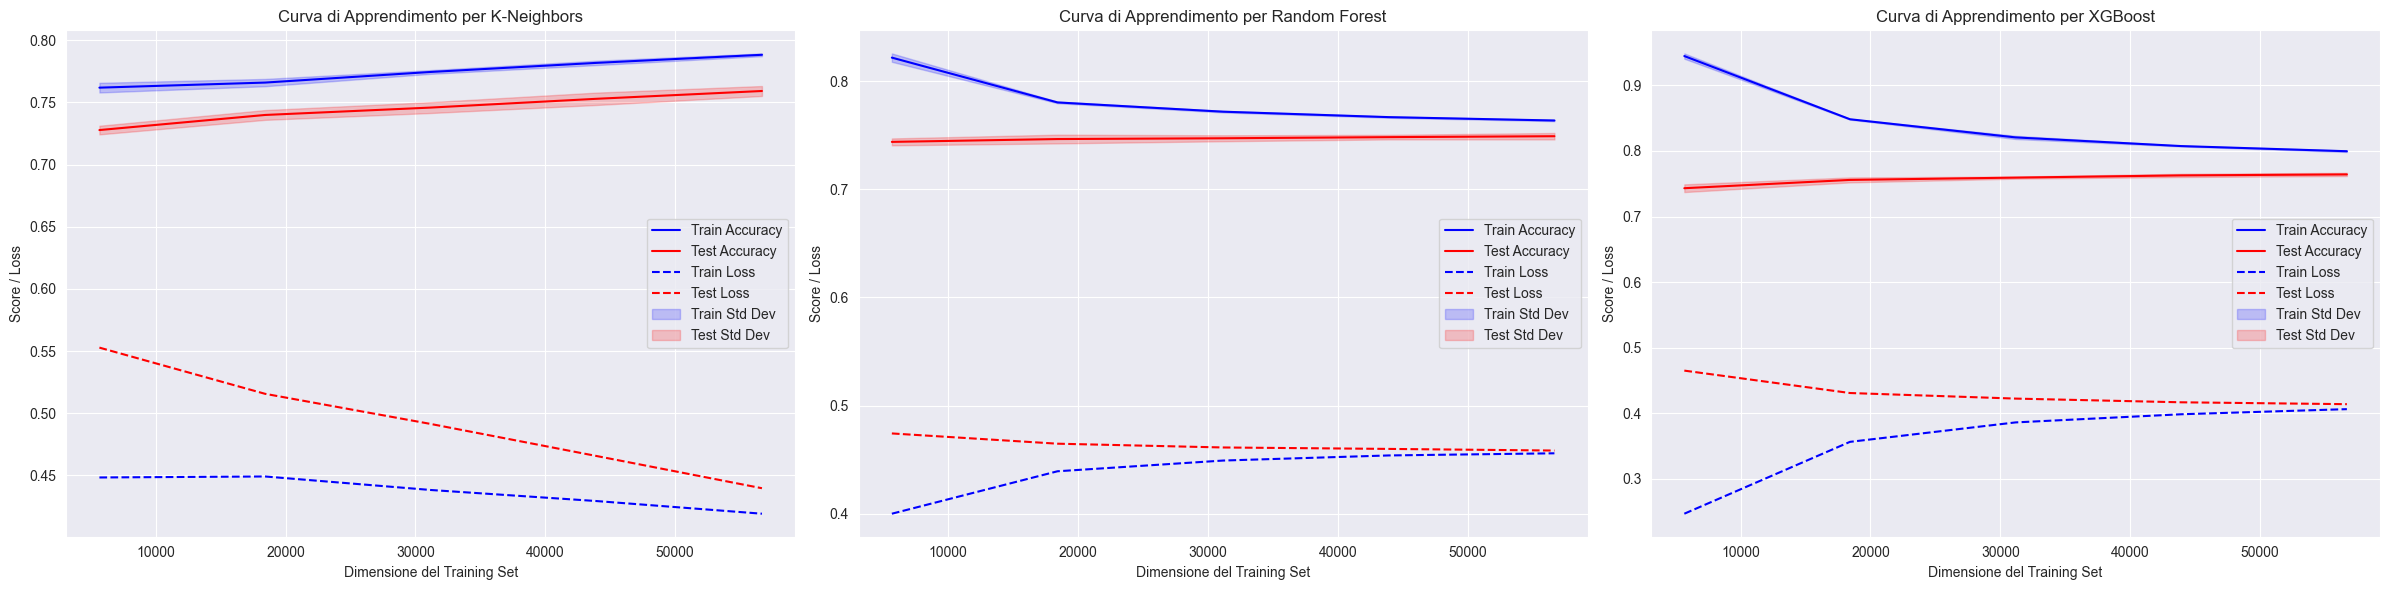

In [73]:
# Traccia le curve di apprendimento
plot_learning_curves(best_models_optimised, X_train, y_train)

/home/pierdamianozagaria/Documenti/Universita/Esami-da-fare/ICon/Progetto-ICON/venv/lib64/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

/home/pierdamianozagaria/Documenti/Universita/Esami-da-fare/ICon/Progetto-ICON/venv/lib64/python3.12/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names



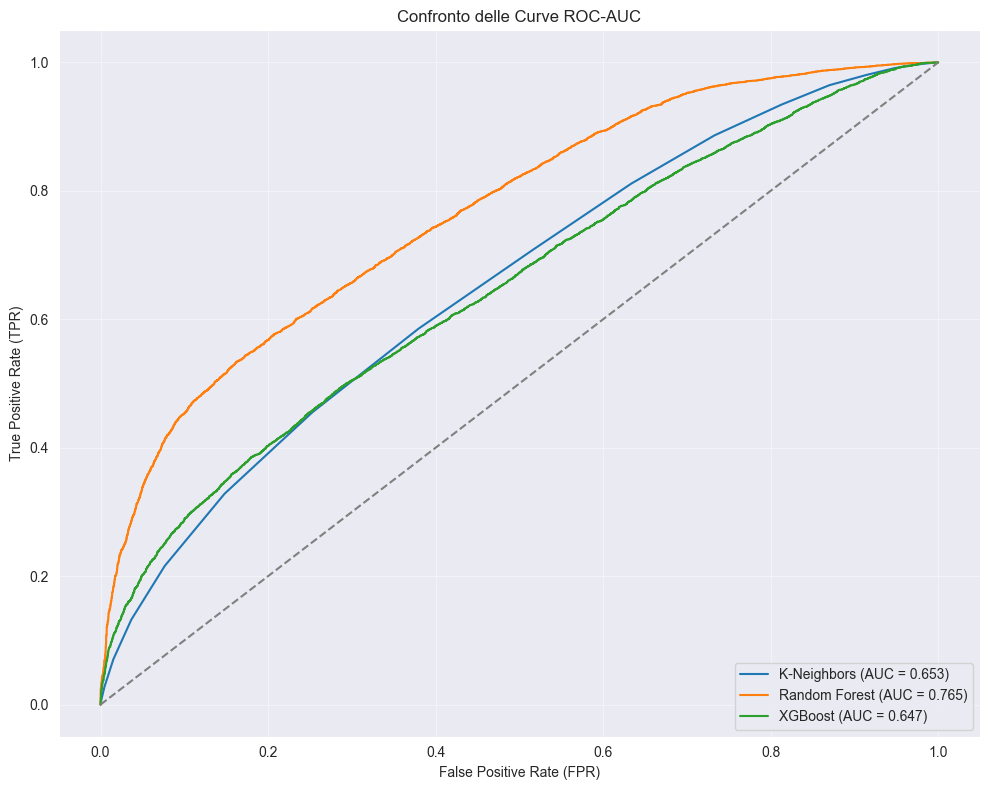

Punteggi ROC-AUC per ciascun modello:
K-Neighbors: 0.653
Random Forest: 0.765
XGBoost: 0.647


In [109]:
roc_auc_optimised = plot_roc_auc(best_models_optimised, X_test, y_test)

Dai risultati ottenuti, possiamo vedere che l'overfitting é stato ridotto con successo in tutti i modelli, con performance molto piú bilanciate tra training e test set, senza perdita eccessiva di Accuracy sul test set e con un miglioramento dei punteggi AUC.
Nello specifico:
- Il modello **K-Neighbors** ha ottenuto un'Accuracy Score del ~77% e un gap tra training e test set molto piú contenuto. Le curve di apprendimento mostrano che il modello non ha raggiunto ancora il massimo della sua capacità di generalizzazione, infatti potrebbe sicuramente beneficiare di un dataset piú grande. In effetti il K-Neighbours é un modello che basa la sua predizione sulla vicinanza dei dati, quindi piú dati ha a disposizione, piú sará in grado di generalizzare. Tuttavia la curva ROC-AUC mostra che il modello fatica a separare in modo netto le due classi.
- Il modello **Random Forest** ha ottenuto un'Accuracy Score del ~75%, ma ha ridotto di molto il gap tra training e test set. In questo caso, le curve di apprendimento mostrano che il modello ha raggiunto la sua massima capacitá di generalizzazione, con curve di train e test che convergono, mostrando assenza di overfitting. La curva ROC-AUC é moderatamente buona, mostra una discriminazione delle classi migliore rispetto al K-Neighbours.
- Il modello **XGBoost** ha ottenuto risultati simili al Random Forest per quanto riguarda la curva di apprendimento e l'overfitting, con un'Accuracy Score del ~77%. Per quanto riguarda la curva ROC-AUC, il modello ha ottenuto risultati simili al K-Neighbours, con una separazione delle classi non netta.

In generale, i risultati ottenuti mostrano che la ricerca degli iperparametri ottimizzati ha portato a una riduzione dell'overfitting e a una maggiore capacitá di generalizzazione dei modelli.
Il modello **Random Forest** sembra essere il modello piú robusto in termini di capacità di generalizzazione e di separazione delle classi.

## Feature selection applicata ai modelli di Apprendimento Supervisionato
Nel dataset in esame, nonostante la pulizia e il clustering, ci sono ancora molte feature, alcune delle quali **potrebbero** non contribuire alla predizione del target.
Utilizziamo la feature selection per:
1. **Identificare le feature più importanti** per il target.
2. **Ridurre la dimensionalità**, eliminando feature non significative.

Per il K-Nearest Neighbors, viene utilizzata la tecnica **`SelectKBest`**, che seleziona le migliori K feature in base a un test statistico (*ANOVA F-Test*).
Per il Random Forest e XGBoost, viene utilizzata la tecnica **`SelectFromModel`**, che seleziona le feature in base all'importanza assegnata direttamente dal modello.

### ANOVA F-Test
L'**ANOVA F-Test** (Analysis of Variance F-Test) è una tecnica statistica che misura quanto una feature è rilevante per predire il target. 

Confronta:
- **Varianza tra i gruppi**: attribuibile alla relazione tra la feature e il target.
- **Varianza intra-gruppo**: attribuibile al rumore o alla variabilità interna ai gruppi.

Il test produce un **F-value** e un **p-value**:
- Un **F-value alto** indica che la varianza tra i gruppi è molto maggiore della varianza intra-gruppo, suggerendo che la feature è rilevante per predire il target.
- Un **P-value basso** (es. < 0.05) indica che la feature ha una relazione statisticamente significativa con il target.


Vediamo quali sono le features piú importanti per i modelli Random Forest e XGBoost.

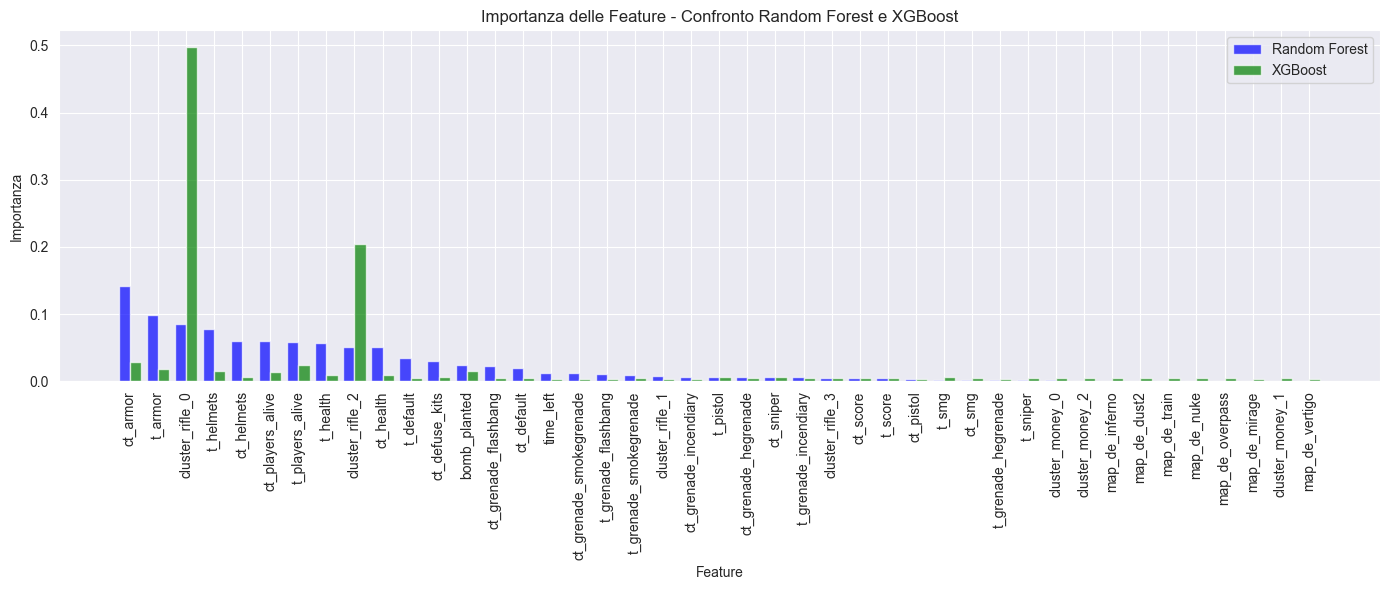

In [74]:
# Importanza delle feature per Random Forest
rf_importances = best_models_optimised['Random Forest'].feature_importances_
rf_indices = np.argsort(rf_importances)[::-1]

# Importanza delle feature per XGBoost
xgb_importances = best_models_optimised['XGBoost'].feature_importances_
xgb_indices = np.argsort(xgb_importances)[::-1]

# Ordine comune delle feature basato su Random Forest
common_indices = rf_indices  # Cambia se preferisci l'ordine di XGBoost

# Recupera nomi delle feature ordinati
feature_names = X.columns[common_indices]

# Recupera le importanze ordinate
rf_sorted = rf_importances[common_indices]
xgb_sorted = xgb_importances[common_indices]

# Crea il plot combinato
x = np.arange(len(feature_names))  # Posizioni delle barre

plt.figure(figsize=(14, 6))
plt.bar(x - 0.2, rf_sorted, width=0.4, label='Random Forest', color='blue', alpha=0.7)
plt.bar(x + 0.2, xgb_sorted, width=0.4, label='XGBoost', color='green', alpha=0.7)

# Configurazione degli assi e delle etichette
plt.title("Importanza delle Feature - Confronto Random Forest e XGBoost")
plt.xticks(x, feature_names, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importanza")
plt.legend()
plt.tight_layout()
plt.show()

In effetti, non sono molte le features che i due modelli considerano importanti per la predizione del target. Questo ci suggerisce che molte delle features presenti nel dataset **potrebbero** non essere rilevanti per la predizione del target.

Quindi la domanda che ci si é posti é: *questa operazione migliorerá o peggiorerá le performance dei modelli?*

In [75]:
%%capture --no-stdout

# Seleziona le migliori 10 caratteristiche
selector_knn = SelectKBest(k=10)
X_train_selected_knn = selector_knn.fit_transform(X_train, y_train)
X_test_selected_knn = selector_knn.transform(X_test)

# Stampa le feature selezionate
selected_features = X.columns[selector_knn.get_support()]

print("Feature Selezionate:")
print(selected_features)

best_model_fs_knn = hyperparameter_search({'K-Neighbors': models['K-Neighbors']}, {'K-Neighbors': params_bayes['K-Neighbors']}, X_train_selected_knn, y_train, method="bayes", scoring='accuracy')

Feature Selezionate:
Index(['ct_armor', 't_armor', 'ct_helmets', 't_helmets', 'ct_defuse_kits',
       'ct_players_alive', 'ct_grenade_flashbang', 'ct_default',
       'cluster_rifle_0', 'cluster_rifle_2'],
      dtype='object')
Ricerca degli iperparametri per K-Neighbors (bayes)
Iperparametri migliori per K-Neighbors: OrderedDict({'metric': 'manhattan', 'n_jobs': -1, 'n_neighbors': 20})
Best accuracy: 0.7387



In [76]:
%%capture --no-stdout

# Seleziona le migliori 10 caratteristiche in base all'importanza delle features del modello ottimizzato random forest
selector_rf = SelectFromModel(best_models_optimised['Random Forest'], max_features=10, threshold=-np.inf)
X_train_selected_rf = selector_rf.fit_transform(X_train, y_train)
X_test_selected_rf = selector_rf.transform(X_test)

# Stampa le feature selezionate
selected_features = X.columns[selector_rf.get_support()]

print("Feature Selezionate:")
print(selected_features)

best_model_fs_rf = hyperparameter_search({'Random Forest': models['Random Forest']}, {'Random Forest': params_bayes['Random Forest']}, X_train_selected_rf, y_train, method="bayes", scoring='accuracy')

Feature Selezionate:
Index(['ct_health', 't_health', 'ct_armor', 't_armor', 'ct_helmets',
       't_helmets', 'ct_players_alive', 't_players_alive', 'cluster_rifle_0',
       'cluster_rifle_2'],
      dtype='object')
Ricerca degli iperparametri per Random Forest (bayes)
Iperparametri migliori per Random Forest: OrderedDict({'bootstrap': True, 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 13, 'n_estimators': 190, 'n_jobs': -1, 'random_state': 13})
Best accuracy: 0.7447



In [77]:
%%capture --no-stdout

# Seleziona le migliori 10 caratteristiche in base all'importanza delle features del modello ottimizzato XGBoost
selector_xgb = SelectFromModel(best_models_optimised['XGBoost'], max_features=10, threshold=-np.inf)
X_train_selected_xgb = selector_xgb.fit_transform(X_train, y_train)
X_test_selected_xgb = selector_xgb.transform(X_test)

# Stampa le feature selezionate
selected_features = X.columns[selector_xgb.get_support()]

print("Feature Selezionate:")
print(selected_features)

best_model_fs_xgb = hyperparameter_search({'XGBoost': models['XGBoost']}, {'XGBoost': params_bayes['XGBoost']}, X_train_selected_xgb, y_train, method="bayes", scoring='accuracy')

Feature Selezionate:
Index(['bomb_planted', 'ct_health', 't_health', 'ct_armor', 't_armor',
       't_helmets', 'ct_players_alive', 't_players_alive', 'cluster_rifle_0',
       'cluster_rifle_2'],
      dtype='object')
Ricerca degli iperparametri per XGBoost (bayes)
Iperparametri migliori per XGBoost: OrderedDict({'colsample_bytree': 0.922953487627113, 'gamma': 0, 'learning_rate': 0.025, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 194, 'n_jobs': -1, 'random_state': 13, 'reg_alpha': 0, 'reg_lambda': 0, 'subsample': 0.8034009939140673})
Best accuracy: 0.7452



In [121]:
%%capture --no-stdout

models_with_data_training = [
    ('K-Neighbors', best_model_fs_knn['K-Neighbors'], X_train_selected_knn, y_train, X_test_selected_knn, y_test),
    ('Random Forest', best_model_fs_rf['Random Forest'], X_train_selected_rf, y_train, X_test_selected_rf, y_test),
    ('XGBoost', best_model_fs_xgb['XGBoost'], X_train_selected_xgb, y_train, X_test_selected_xgb, y_test)
]

score_test_fs, score_train_fs = evaluate_models_multiple(models_with_data_training)


Addestramento e valutazione per il modello: K-Neighbors

Matrice di Confusione - K-Neighbors (Test):
[[6587 1911]
 [2679 6539]]

Matrice di Confusione - K-Neighbors (Train):
[[27325  6768]
 [ 9651 27117]]

Addestramento e valutazione per il modello: Random Forest

Matrice di Confusione - Random Forest (Test):
[[6455 2043]
 [2523 6695]]

Matrice di Confusione - Random Forest (Train):
[[26253  7840]
 [ 9764 27004]]

Addestramento e valutazione per il modello: XGBoost

Matrice di Confusione - XGBoost (Test):
[[6913 1585]
 [2941 6277]]

Matrice di Confusione - XGBoost (Train):
[[28158  5935]
 [11545 25223]]

Metriche sul Test Set:
     Recall  Precision  F1 Score  Accuracy               Modello
0  0.709373   0.773846  0.740208  0.740912    K-Neighbors (Test)
1  0.726296   0.766194  0.745712  0.742267  Random Forest (Test)
2  0.680950   0.798397  0.735012  0.744525        XGBoost (Test)

Metriche sul Training Set:
     Recall  Precision  F1 Score  Accuracy                Modello
0  0.73751

Calcolo delle curve di apprendimento per K-Neighbors...
Calcolo delle curve di apprendimento per Random Forest...
Calcolo delle curve di apprendimento per XGBoost...


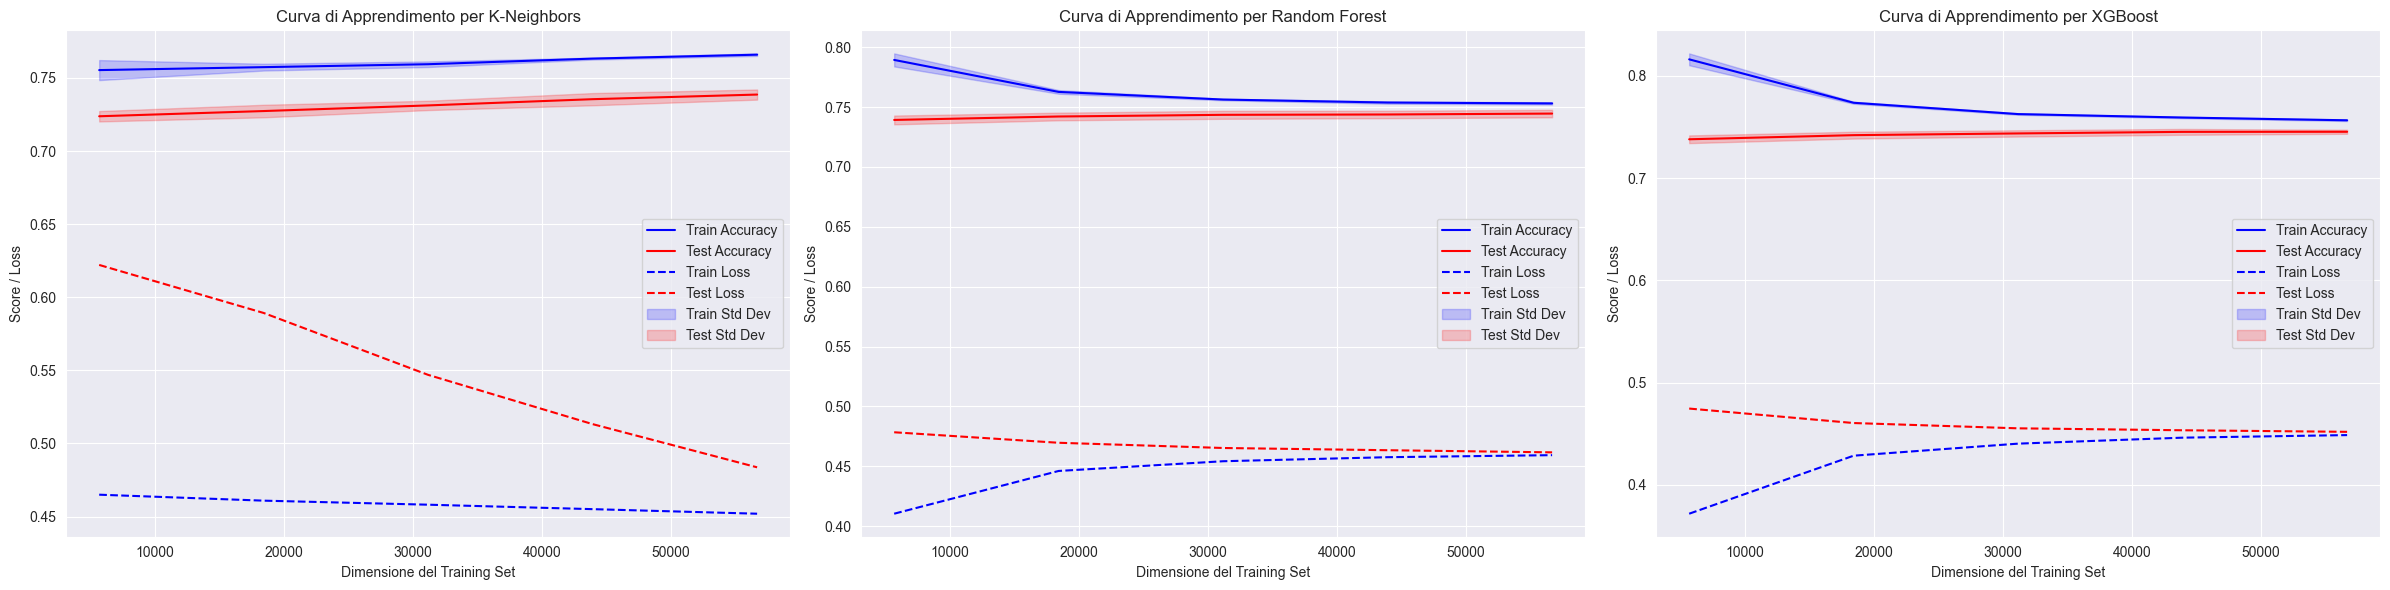

In [120]:
models_with_data = [
    ('K-Neighbors', best_model_fs_knn['K-Neighbors'], X_train_selected_knn, y_train),
    ('Random Forest', best_model_fs_rf['Random Forest'], X_train_selected_rf, y_train),
    ('XGBoost', best_model_fs_xgb['XGBoost'], X_train_selected_xgb, y_train)
]

# Traccia le curve di apprendimento
plot_learning_curves_multiple(models_with_data)

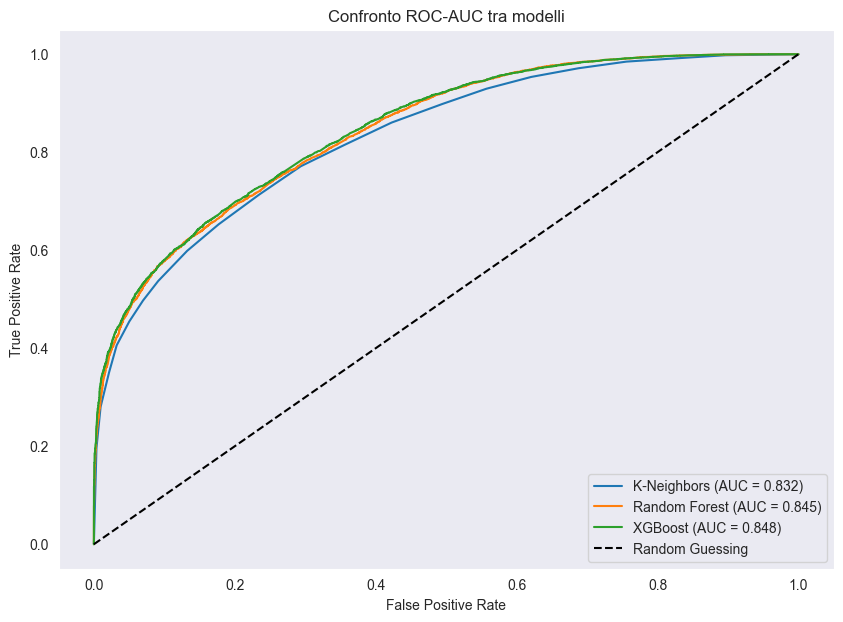

Punteggi ROC-AUC per ciascun modello:
K-Neighbors: 0.832
Random Forest: 0.845
XGBoost: 0.848


In [114]:
roc_auc_fs = plot_roc_auc_multiple(models_with_data)

In questo caso, l'area sotto la curva ROC-AUC é decisamente piú alta rispetto ai modelli precedenti, con tutti i modelli che si attestano tra l'83% e l'85% di AUC, indicando un'ottima capacità di separazione delle classi.

## Confronto finale

In [122]:
categories = ['First', 'Optimised', 'Feature Selected']

combined_scores_test = compare_models(score_test_first, score_test_optimised, score_test_fs, categories=categories)
combined_scores_train = compare_models(score_train_first, score_train_optimised, score_train_fs, categories=categories)

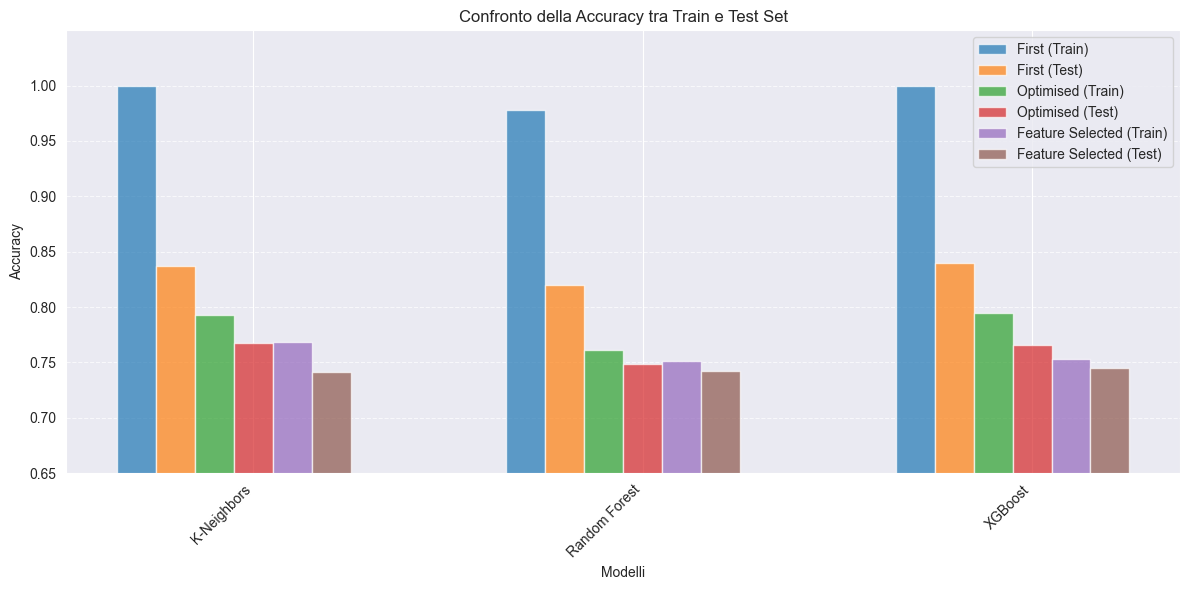

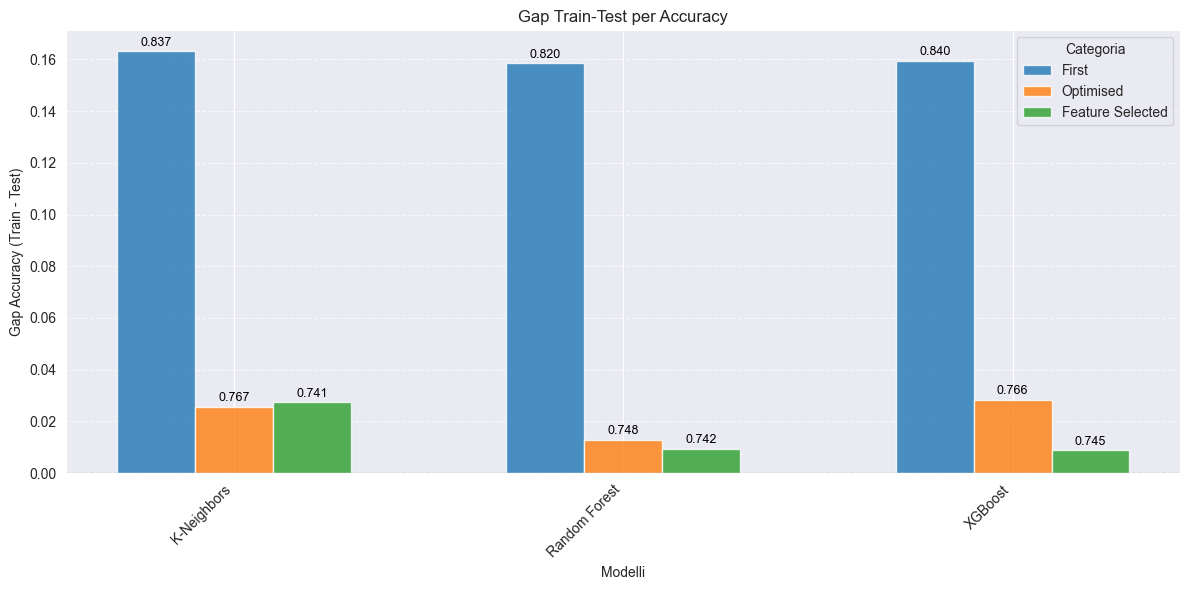

In [123]:
plot_histogram_comparison(combined_scores_train, combined_scores_test, 'Accuracy')

# Traccia il gap tra Train Set e Test Set, su ogni modello testato, sulla metrica Accuracy
# Su ogni barra é indicato il valore dell'Accuracy sul Test Set

plot_train_test_gap(combined_scores_train, combined_scores_test, 'Accuracy')

Dai risultati ottenuti, possiamo vedere che la selezione delle feature ha portato a una *perdita* generale di Accuracy nei modelli, anche se marginale (max. ~2%).

La curva ROC-AUC mostra che i modelli con feature selection hanno ottenuto risultati migliori rispetto ai modelli ottimizzati, con un'area sotto la curva ROC-AUC tra l'83% e l'85%, con un incremento quindi del ~20%, nel caso migliore, rispetto ai modelli ottimizzati.

In conclusione, i modelli con Feature Selection sembrano essere piú robusti e capaci di generalizzare rispetto ai modelli ottimizzati, con una migliore capacità di separazione delle classi, sacrificando solo una piccola quantità di Accuracy e minimizzando, in quasi tutti i casi, ancora di piú l'overfitting.

---

# Apprendimento probabilistico e Feature scaling
In questa sezione, eseguiremo l'apprendimento probabilistico con il modello **Naive Bayes** e valuteremo l'impatto della standardizzazione e della robustezza delle feature sui risultati.

In realtà, il Naive Bayes non è influenzato dalla scala delle feature, poiché assume che le feature siano indipendenti e distribuite normalmente. Tuttavia, potrebbe ancora avere un impatto sulle prestazioni dell'algoritmo in diversi modi:
- **Feature Importance**: se le feature sono definite su scale diverse, alcune di esse potrebbero essere erroneamente considerate piú importanti di altre e potrebbero influenzare la predizione. Lo scaling delle feature può aiutare a bilanciare l'importanza delle feature.
- **Overfitting**: feature definite su scale diverse aumentano la complessitá del modello favorendone l'overfitting. Lo scaling delle feature può aiutare a ridurre questo rischio.

Utilizzeremo due tecniche di scaling differenti:
- **Standard Scaler**: utilizza la media e la deviazione standard delle feature per ridimensionare i dati, assumendo che gli esempi seguano una distribuzione normale e presentando una certa sensibilità agli outliers.
- **Robust Scaler**: utilizza la mediana e l'intervallo interquartile per ridimensionare i dati, rendendolo piú robusto agli outliers.

Dal momento che il nostro dataset presenta per alcune features outliers, come abbiamo giá visto precedentemente, ci aspettiamo che il Robust Scaler sia piú adatto per la nostra classificazione.

Innanzitutto, addestriamo un modello Naive Bayes con le feature originali, senza alcuna trasformazione, in modo da avere un punto di riferimento per i confronti successivi.

In [82]:
# Dividi il dataset in features e target
X = df.drop(columns=['round_winner'])
y = df['round_winner']

# Dividi il dataset in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
params_nb = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}

In [84]:
grid = GridSearchCV(GaussianNB(), params_nb, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

nb = GaussianNB().fit(X_train, y_train)

# Valutazione del modello
y_test_pred_nb = nb.predict(X_test)
y_train_pred_nb = nb.predict(X_train)

accuracy_test_nb = accuracy_score(y_test, y_test_pred_nb)
accuracy_train_nb = accuracy_score(y_train, y_train_pred_nb)

precision_test_nb = precision_score(y_test, y_test_pred_nb)
precision_train_nb = precision_score(y_train, y_train_pred_nb)

recall_test_nb = recall_score(y_test, y_test_pred_nb)
recall_train_nb = recall_score(y_train, y_train_pred_nb)

f1_test_nb = f1_score(y_test, y_test_pred_nb)
f1_train_nb = f1_score(y_train, y_train_pred_nb)

conf_matrix_test_nb = confusion_matrix(y_test, y_test_pred_nb)
conf_matrix_train_nb = confusion_matrix(y_train, y_train_pred_nb)

print(f"Matrice di Confusione - Naive Bayes (Test):")
print(conf_matrix_test_nb)

print(f"\nMatrice di Confusione - Naive Bayes (Train):")
print(conf_matrix_train_nb)

print()

print("Metriche sul Test Set:")
print(f"Accuracy: {accuracy_test_nb:.4f}")
print(f"Precision: {precision_test_nb:.4f}")
print(f"Recall: {recall_test_nb:.4f}")
print(f"F1 Score: {f1_test_nb:.4f}")

print("\nMetriche sul Training Set:")
print(f"Accuracy: {accuracy_train_nb:.4f}")
print(f"Precision: {precision_train_nb:.4f}")
print(f"Recall: {recall_train_nb:.4f}")
print(f"F1 Score: {f1_train_nb:.4f}")

Matrice di Confusione - Naive Bayes (Test):
[[6295 2203]
 [2746 6472]]

Matrice di Confusione - Naive Bayes (Train):
[[25385  8708]
 [10994 25774]]

Metriche sul Test Set:
Accuracy: 0.7206
Precision: 0.7461
Recall: 0.7021
F1 Score: 0.7234

Metriche sul Training Set:
Accuracy: 0.7220
Precision: 0.7475
Recall: 0.7010
F1 Score: 0.7235


## Standard Scaler

In [85]:
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

grid = GridSearchCV(GaussianNB(), params_nb, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_scaled, y_train)

nb_scaled = grid.best_estimator_

# Valutazione del modello
y_test_pred_nb_scaled = nb_scaled.predict(X_test_scaled)
y_train_pred_nb_scaled = nb_scaled.predict(X_train_scaled)

accuracy_test_nb_scaled = accuracy_score(y_test, y_test_pred_nb_scaled)
accuracy_train_nb_scaled = accuracy_score(y_train, y_train_pred_nb_scaled)

precision_test_nb_scaled = precision_score(y_test, y_test_pred_nb_scaled)
precision_train_nb_scaled = precision_score(y_train, y_train_pred_nb_scaled)

recall_test_nb_scaled = recall_score(y_test, y_test_pred_nb_scaled)
recall_train_nb_scaled = recall_score(y_train, y_train_pred_nb_scaled)

f1_test_nb_scaled = f1_score(y_test, y_test_pred_nb_scaled)
f1_train_nb_scaled = f1_score(y_train, y_train_pred_nb_scaled)

conf_matrix_test_nb_scaled = confusion_matrix(y_test, y_test_pred_nb_scaled)
conf_matrix_train_nb_scaled = confusion_matrix(y_train, y_train_pred_nb_scaled)

print(f"Matrice di Confusione - Naive Bayes (Test):")
print(conf_matrix_test_nb_scaled)

print(f"\nMatrice di Confusione - Naive Bayes (Train):")
print(conf_matrix_train_nb_scaled)

print()

print("Metriche sul Test Set:")
print(f"Accuracy: {accuracy_test_nb_scaled:.4f}")
print(f"Precision: {precision_test_nb_scaled:.4f}")
print(f"Recall: {recall_test_nb_scaled:.4f}")
print(f"F1 Score: {f1_test_nb_scaled:.4f}")

print("\nMetriche sul Training Set:")
print(f"Accuracy: {accuracy_train_nb_scaled:.4f}")
print(f"Precision: {precision_train_nb_scaled:.4f}")
print(f"Recall: {recall_train_nb_scaled:.4f}")
print(f"F1 Score: {f1_train_nb_scaled:.4f}")

Matrice di Confusione - Naive Bayes (Test):
[[6295 2203]
 [2746 6472]]

Matrice di Confusione - Naive Bayes (Train):
[[25383  8710]
 [10994 25774]]

Metriche sul Test Set:
Accuracy: 0.7206
Precision: 0.7461
Recall: 0.7021
F1 Score: 0.7234

Metriche sul Training Set:
Accuracy: 0.7219
Precision: 0.7474
Recall: 0.7010
F1 Score: 0.7235


## Robust Scaler

In [86]:
scaler = preprocessing.RobustScaler()
X_train_scaled_rs = scaler.fit_transform(X_train)
X_test_scaled_rs = scaler.transform(X_test)

params_nb = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}
grid = GridSearchCV(GaussianNB(), params_nb, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_scaled_rs, y_train)

nb_scaled_rs = grid.best_estimator_

# Valutazione del modello
y_test_pred_nb_scaled_rs = nb_scaled.predict(X_test_scaled_rs)
y_train_pred_nb_scaled_rs = nb_scaled.predict(X_train_scaled_rs)

accuracy_test_nb_scaled_rs = accuracy_score(y_test, y_test_pred_nb_scaled_rs)
accuracy_train_nb_scaled_rs = accuracy_score(y_train, y_train_pred_nb_scaled_rs)

precision_test_nb_scaled_rs = precision_score(y_test, y_test_pred_nb_scaled_rs)
precision_train_nb_scaled_rs = precision_score(y_train, y_train_pred_nb_scaled_rs)

recall_test_nb_scaled_rs = recall_score(y_test, y_test_pred_nb_scaled_rs)
recall_train_nb_scaled_rs = recall_score(y_train, y_train_pred_nb_scaled_rs)

f1_test_nb_scaled_rs = f1_score(y_test, y_test_pred_nb_scaled_rs)
f1_train_nb_scaled_rs = f1_score(y_train, y_train_pred_nb_scaled_rs)

conf_matrix_test_nb_scaled_rs = confusion_matrix(y_test, y_test_pred_nb_scaled_rs)
conf_matrix_train_nb_scaled_rs = confusion_matrix(y_train, y_train_pred_nb_scaled_rs)

print(f"Matrice di Confusione - Naive Bayes (Test):")
print(conf_matrix_test_nb_scaled_rs)

print(f"\nMatrice di Confusione - Naive Bayes (Train):")
print(conf_matrix_train_nb_scaled_rs)

print()

print("Metriche sul Test Set:")
print(f"Accuracy: {accuracy_test_nb_scaled_rs:.4f}")
print(f"Precision: {precision_test_nb_scaled_rs:.4f}")
print(f"Recall: {recall_test_nb_scaled_rs:.4f}")
print(f"F1 Score: {f1_test_nb_scaled_rs:.4f}")

print("\nMetriche sul Training Set:")
print(f"Accuracy: {accuracy_train_nb_scaled_rs:.4f}")
print(f"Precision: {precision_train_nb_scaled_rs:.4f}")
print(f"Recall: {recall_train_nb_scaled_rs:.4f}")
print(f"F1 Score: {f1_train_nb_scaled_rs:.4f}")



Matrice di Confusione - Naive Bayes (Test):
[[6331 2167]
 [2664 6554]]

Matrice di Confusione - Naive Bayes (Train):
[[25510  8583]
 [10697 26071]]

Metriche sul Test Set:
Accuracy: 0.7273
Precision: 0.7515
Recall: 0.7110
F1 Score: 0.7307

Metriche sul Training Set:
Accuracy: 0.7279
Precision: 0.7523
Recall: 0.7091
F1 Score: 0.7301


## Confronto tra i modelli

In [87]:
# Crea DataFrame per memorizzare le metriche
score_test_nb = pd.DataFrame(columns=['Recall', 'Precision', 'F1 Score', 'Accuracy', 'Modello', 'Order'], dtype=float)
score_train_nb = pd.DataFrame(columns=['Recall', 'Precision', 'F1 Score', 'Accuracy', 'Modello', 'Order'], dtype=float)

# Calcola le metriche per il modello base
test_metrics = pd.DataFrame([('Naive Bayes', recall_test_nb, precision_test_nb, f1_test_nb, accuracy_test_nb, 0)],
                            columns=['Modello', 'Recall', 'Precision', 'F1 Score', 'Accuracy', 'Order'])
score_test_nb = pd.concat([test_metrics, score_test_nb], ignore_index=True)

train_metrics = pd.DataFrame([('Naive Bayes', recall_train_nb, precision_train_nb, f1_train_nb, accuracy_train_nb, 0)],
                             columns=['Modello', 'Recall', 'Precision', 'F1 Score', 'Accuracy', 'Order'])
score_train_nb = pd.concat([train_metrics, score_train_nb], ignore_index=True)

# Calcola le metriche per il modello con Standard Scaler
test_metrics = pd.DataFrame([('Naive Bayes (Standard Scaler)', recall_test_nb_scaled, precision_test_nb_scaled, f1_test_nb_scaled, accuracy_test_nb_scaled, 1)],
                            columns=['Modello', 'Recall', 'Precision', 'F1 Score', 'Accuracy', 'Order'])
score_test_nb = pd.concat([test_metrics, score_test_nb], ignore_index=True)

train_metrics = pd.DataFrame([('Naive Bayes (Standard Scaler)', recall_train_nb_scaled, precision_train_nb_scaled, f1_train_nb_scaled, accuracy_train_nb_scaled, 1)],
                             columns=['Modello', 'Recall', 'Precision', 'F1 Score', 'Accuracy', 'Order'])
score_train_nb = pd.concat([train_metrics, score_train_nb], ignore_index=True)

# Calcola le metriche per il modello con Robust Scaler
test_metrics = pd.DataFrame([('Naive Bayes (Robust Scaler)', recall_test_nb_scaled_rs, precision_test_nb_scaled_rs, f1_test_nb_scaled_rs, accuracy_test_nb_scaled_rs, 2)],
                            columns=['Modello', 'Recall', 'Precision', 'F1 Score', 'Accuracy', 'Order'])
score_test_nb = pd.concat([test_metrics, score_test_nb], ignore_index=True)

train_metrics = pd.DataFrame([('Naive Bayes (Robust Scaler)', recall_train_nb_scaled_rs, precision_train_nb_scaled_rs, f1_train_nb_scaled_rs, accuracy_train_nb_scaled_rs, 2)],
                             columns=['Modello', 'Recall', 'Precision', 'F1 Score', 'Accuracy', 'Order'])
score_train_nb = pd.concat([train_metrics, score_train_nb], ignore_index=True)

# Ordina i DataFrame in base alla colonna "Order"
score_test_nb = score_test_nb.sort_values(by='Order').drop(columns=['Order']).reset_index(drop=True)
score_train_nb = score_train_nb.sort_values(by='Order').drop(columns=['Order']).reset_index(drop=True)

# Stampa le metriche
print("\nMetriche sul Test Set:")
print(score_test_nb)

print("\nMetriche sul Training Set:")
print(score_train_nb)


Metriche sul Test Set:
                         Modello    Recall  Precision  F1 Score  Accuracy
0                    Naive Bayes  0.702105   0.746052  0.723411  0.720648
1  Naive Bayes (Standard Scaler)  0.702105   0.746052  0.723411  0.720648
2    Naive Bayes (Robust Scaler)  0.711000   0.751519  0.730698  0.727309

Metriche sul Training Set:
                         Modello    Recall  Precision  F1 Score  Accuracy
0                    Naive Bayes  0.700990   0.747462  0.723481  0.721963
1  Naive Bayes (Standard Scaler)  0.700990   0.747419  0.723460  0.721934
2    Naive Bayes (Robust Scaler)  0.709068   0.752323  0.730055  0.727918


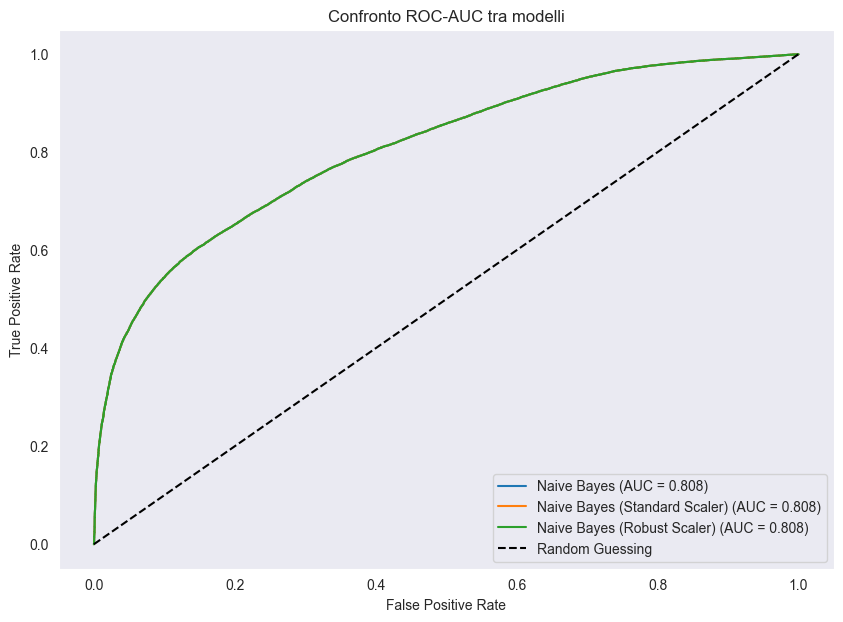

Punteggi ROC-AUC per ciascun modello:
Naive Bayes: 0.808
Naive Bayes (Standard Scaler): 0.808
Naive Bayes (Robust Scaler): 0.808


In [130]:
models_with_data_nb = [
    ('Naive Bayes', nb, X_train, y_train),
    ('Naive Bayes (Standard Scaler)', nb_scaled, X_train_scaled, y_train),
    ('Naive Bayes (Robust Scaler)', nb_scaled_rs, X_train_scaled_rs, y_train)
]

roc_auc_nb = plot_roc_auc_multiple(models_with_data_nb)

Dalle metriche si evince che lo scaling delle features, non ha avuto un impatto significativo sulle performance del modello **Naive Bayes**, con un incremento marginale (+0.7%) dell'Accuracy, ma solo per il **Robust Scaler** (come previsto).
La curva ROC-AUC mostra che il modello ha ottenuto un'area sotto la curva dell'~81% in tutti i casi, indicando ottima capacità di separazione delle classi.
Inoltre, tra tutti i modelli testati, il Naive Bayes ha ottenuto le performance piú basse, con un Accuracy Score del ~73%.

---

# Ragionamento logico: basi di conoscenza e Prolog
In questa sezione finale del caso di studio, costruiremo una **base di conoscenza** utilizzando **Prolog**. Una base di conoscenza è costituita da un insieme di **fatti** e **regole** che formalizzano le informazioni e le relazioni tra gli oggetti appartenenti a un particolare dominio. Prolog, un linguaggio di programmazione logica, è particolarmente adatto per rappresentare e interrogare basi di conoscenza grazie alla sua natura dichiarativa.

L'obiettivo è modellare il **dominio di conoscenza** basandoci sui dati del nostro dataset, definendo le relazioni e le regole necessarie per descrivere il comportamento e le interazioni tra i dati. Una volta completata la rappresentazione, utilizzeremo questa base di conoscenza per **eseguire query logiche** che permetteranno di ottenere informazioni significative e risposte a specifiche domande sul dominio.

## Passaggi del processo

1. **Definizione dei fatti**:
   - Tradurremo i dati del dataset in una serie di fatti che rappresentano relazioni dirette e proprietà degli oggetti.

2. **Definizione delle regole**:
   - Definiremo regole logiche per descrivere relazioni più complesse e comportamenti deducibili dai fatti di base. Le regole permetteranno di inferire nuove conoscenze a partire dai fatti esistenti.

3. **Esecuzione delle query**:
   - Scriveremo query in Prolog per interrogare la base di conoscenza e ottenere risposte a domande specifiche.


In [88]:
# Creazione del file Prolog
with open('knowledge_base.pl', 'w') as file:
    # Mappatura per valori interpretabili
    bomb_map = {1: 'yes', 0: 'no'}
    winner_map = {0: 'ct', 1: 't'}
    map_labels = {
        'map_de_dust2': 'de_dust2',
        'map_de_inferno': 'de_inferno',
        'map_de_mirage': 'de_mirage',
        'map_de_nuke': 'de_nuke',
        'map_de_overpass': 'de_overpass',
        'map_de_train': 'de_train',
        'map_de_vertigo': 'de_vertigo'
    }
    cluster_money_labels = {
        'cluster_money_0': "cluster_money_favorevole_per_t",
        'cluster_money_1': "cluster_money_equilibrato",
        'cluster_money_2': "cluster_money_favorevole_per_ct"
    }
    cluster_rifle_labels = {
        'cluster_rifle_0': "cluster_rifle_favorevole_per_t",
        'cluster_rifle_1': "cluster_rifle_equilibrato_buono",
        'cluster_rifle_2': "cluster_rifle_favorevole_per_ct",
        'cluster_rifle_3': "cluster_rifle_equilibrato_cattivo"
    }

    # Definizione dei fatti sullo stato del round
    file.write("% Fatti sullo stato del round\n")
    for index, row in df.iterrows():
        bomb_status = bomb_map.get(row['bomb_planted'], 'no')
        file.write(f"stato_round({index+1}, {row['time_left']}, {row['ct_score']}, {row['t_score']}, "
                   f"{row['ct_players_alive']}, {row['t_players_alive']}, '{bomb_status}').\n")

    # Definizione dei fatti sulla mappa
    file.write("\n% Fatti sulla mappa\n")
    for index, row in df.iterrows():
        for col, label in map_labels.items():
            if row[col] == 1:
                file.write(f"mappa({index+1}, {label}).\n")

    # Definizione dei fatti sui cluster money
    file.write("\n% Fatti sui cluster money\n")
    for index, row in df.iterrows():
        for i in range(3):
            cluster = f'cluster_money_{i}'
            if row[cluster] == 1:
                file.write(f"cluster_money({index+1}, {cluster_money_labels[cluster]}).\n")

    # Definizione dei fatti sui cluster rifle
    file.write("\n% Fatti sui cluster rifle\n")
    for index, row in df.iterrows():
        for i in range(4):
            cluster = f'cluster_rifle_{i}'
            if row[cluster] == 1:
                file.write(f"cluster_rifle({index+1}, {cluster_rifle_labels[cluster]}).\n")

    # Definizione dei fatti sul vincitore del round
    file.write("\n% Fatti sul vincitore del round\n")
    for index, row in df.iterrows():
        winner_label = winner_map.get(row['round_winner'])
        file.write(f"round_winner({index+1}, '{winner_label}').\n")

    # Definizione delle regole
    file.write("\n% Regole\n")
    # Regola 1: Round sicuro (bomba non piantata e più di 3 CT vivi)
    file.write("round_sicuro(Round, Vincitore) :- stato_round(Round, _, _, _, CtAlive, 1.0, 'no'), CtAlive >= 3, round_winner(Round, Vincitore).\n")

    # Regola 2: Round bilanciato (uguale numero di giocatori vivi per CT e T) ad eccezione di 5vs5
    file.write("round_bilanciato(Round) :- stato_round(Round, _, _, _, CtAlive, TAlive, _), CtAlive =:= TAlive, CtAlive < 5.0, TAlive < 5.0.\n")

    # Regola 3: Vincitore del round per mappa
    file.write("vincitore_per_mappa(Round, Mappa, Vincitore) :- mappa(Round, Mappa), round_winner(Round, Vincitore).\n")

    # Regola 4: Snapshot vinti dai CT in 1vsX con bomba piazzata
    file.write("snapshot_vinti_ct_1vsX_bomba_piazzata(Round, TAlive) :- stato_round(Round, _, _, _, 1.0, TAlive, 'yes'), TAlive >= 1, round_winner(Round, 'ct').\n")

    # Regola 5: Snapshot vinti dai CT in 1vsX senza bomba piazzata
    file.write("snapshot_vinti_ct_1vsX_bomba_non_piazzata(Round, TAlive) :- stato_round(Round, _, _, _, 1.0, TAlive, 'no'), TAlive >= 1, round_winner(Round, 'ct').\n")

    # Regola 6: Snapshot vinti dai CT con cluster rifle favorevole per T
    file.write("snapshot_vinti_ct_cluster_rifle(Round) :- cluster_rifle(Round, cluster_rifle_favorevole_per_t), round_winner(Round, 'ct').\n")

    # Regola 7: Snapshot vinti dai T con cluster money favorevole per CT
    file.write("snapshot_vinti_t_cluster_money(Round) :- cluster_money(Round, cluster_money_favorevole_per_ct), round_winner(Round, 't').\n")

In [89]:
# Esegui il programma Prolog
prolog = Prolog()
prolog.consult("knowledge_base.pl")

### Round in cui la bomba non é piazzata e ci sono piú di 3 CT vivi e 1 solo T vivo
Per tutte le query verranno stampati solo i primi 50 risultati.

In [90]:
# Query 1: Trova i round in cui la bomba non è piantata e ci sono più di 3 CT vivi e 1 solo T vivo
print("Query 1: Round apparentemente sicuri (bomba non piantata e >3 CT vivi):")
results = list(prolog.query("round_sicuro(Round, Vincitore)"))

for result in results[:50]:
    print(f"Snapshot: {result['Round']} - Vincitore: {result['Vincitore']}")

print(f"Numero di risultati: {len(results)}")

Query 1: Round apparentemente sicuri (bomba non piantata e >3 CT vivi):
Snapshot: 6 - Vincitore: ct
Snapshot: 41 - Vincitore: ct
Snapshot: 189 - Vincitore: ct
Snapshot: 280 - Vincitore: ct
Snapshot: 367 - Vincitore: ct
Snapshot: 373 - Vincitore: ct
Snapshot: 430 - Vincitore: ct
Snapshot: 457 - Vincitore: ct
Snapshot: 458 - Vincitore: ct
Snapshot: 511 - Vincitore: ct
Snapshot: 636 - Vincitore: ct
Snapshot: 671 - Vincitore: ct
Snapshot: 695 - Vincitore: ct
Snapshot: 763 - Vincitore: ct
Snapshot: 816 - Vincitore: ct
Snapshot: 817 - Vincitore: ct
Snapshot: 840 - Vincitore: ct
Snapshot: 873 - Vincitore: ct
Snapshot: 878 - Vincitore: ct
Snapshot: 897 - Vincitore: ct
Snapshot: 898 - Vincitore: ct
Snapshot: 1010 - Vincitore: ct
Snapshot: 1115 - Vincitore: ct
Snapshot: 1134 - Vincitore: ct
Snapshot: 1144 - Vincitore: ct
Snapshot: 1209 - Vincitore: ct
Snapshot: 1210 - Vincitore: ct
Snapshot: 1211 - Vincitore: ct
Snapshot: 1230 - Vincitore: t
Snapshot: 1252 - Vincitore: ct
Snapshot: 1268 - Vincit

### Round bilanciati (stesso numero di giocatori vivi per CT e T, eccetto 5vs5)

In [91]:
# Query 2: Trova i round bilanciati (stesso numero di giocatori vivi per CT e T)
print("\nQuery 2: Round bilanciati (stesso numero di giocatori vivi):")
results = list(prolog.query("round_bilanciato(Round)"))
for result in results[:50]:
    print(f"Snapshot: {result['Round']}")

print(f"Numero di risultati: {len(results)}")


Query 2: Round bilanciati (stesso numero di giocatori vivi):
Snapshot: 1
Snapshot: 2
Snapshot: 10
Snapshot: 29
Snapshot: 38
Snapshot: 46
Snapshot: 59
Snapshot: 60
Snapshot: 76
Snapshot: 78
Snapshot: 79
Snapshot: 81
Snapshot: 83
Snapshot: 102
Snapshot: 125
Snapshot: 132
Snapshot: 147
Snapshot: 151
Snapshot: 152
Snapshot: 173
Snapshot: 177
Snapshot: 184
Snapshot: 196
Snapshot: 197
Snapshot: 215
Snapshot: 216
Snapshot: 220
Snapshot: 236
Snapshot: 237
Snapshot: 242
Snapshot: 265
Snapshot: 266
Snapshot: 267
Snapshot: 286
Snapshot: 322
Snapshot: 326
Snapshot: 327
Snapshot: 344
Snapshot: 359
Snapshot: 362
Snapshot: 389
Snapshot: 391
Snapshot: 395
Snapshot: 406
Snapshot: 461
Snapshot: 467
Snapshot: 479
Snapshot: 480
Snapshot: 527
Snapshot: 528
Numero di risultati: 9146


### Vincitori dei round sulla mappa 'de_vertigo'

In [92]:
# Query 3: Trova il vincitore dei round sulla mappa 'de_vertigo'
print("\nQuery 3: Vincitore dei round giocati su 'de_vertigo':")
results = list(prolog.query("vincitore_per_mappa(Round, de_vertigo, Vincitore)"))
for result in results[:50]:
    print(f"Snapshot: {result['Round']} - Vincitore: {result['Vincitore']}")

print(f"Numero di risultati: {len(results)}")


Query 3: Vincitore dei round giocati su 'de_vertigo':
Snapshot: 1135 - Vincitore: ct
Snapshot: 1136 - Vincitore: ct
Snapshot: 1137 - Vincitore: ct
Snapshot: 1138 - Vincitore: ct
Snapshot: 1139 - Vincitore: ct
Snapshot: 1140 - Vincitore: ct
Snapshot: 1141 - Vincitore: ct
Snapshot: 1142 - Vincitore: ct
Snapshot: 1143 - Vincitore: ct
Snapshot: 1144 - Vincitore: ct
Snapshot: 1145 - Vincitore: ct
Snapshot: 1146 - Vincitore: ct
Snapshot: 1147 - Vincitore: ct
Snapshot: 1148 - Vincitore: ct
Snapshot: 1149 - Vincitore: t
Snapshot: 1150 - Vincitore: t
Snapshot: 1151 - Vincitore: t
Snapshot: 1152 - Vincitore: t
Snapshot: 1153 - Vincitore: t
Snapshot: 1154 - Vincitore: t
Snapshot: 1155 - Vincitore: t
Snapshot: 1156 - Vincitore: t
Snapshot: 1157 - Vincitore: t
Snapshot: 1158 - Vincitore: t
Snapshot: 1159 - Vincitore: t
Snapshot: 1160 - Vincitore: t
Snapshot: 1161 - Vincitore: t
Snapshot: 1162 - Vincitore: t
Snapshot: 1163 - Vincitore: t
Snapshot: 1164 - Vincitore: t
Snapshot: 1165 - Vincitore: t
S

### Snapshot con cluster 'favorevole_per_t' per i soldi

In [93]:
# Query 4: Trova i round appartenenti al cluster 'favorevole_per_t' per i soldi
print("\nQuery 4: Snapshot con cluster soldi 'cluster_money_favorevole_per_t':")
results = list(prolog.query("cluster_money(Round, cluster_money_favorevole_per_t)"))
for result in results[:50]:
    print(f"Snapshot: {result['Round']}")

print(f"Numero di risultati: {len(results)}")


Query 4: Snapshot con cluster soldi 'cluster_money_favorevole_per_t':
Snapshot: 27
Snapshot: 28
Snapshot: 40
Snapshot: 68
Snapshot: 69
Snapshot: 70
Snapshot: 71
Snapshot: 74
Snapshot: 75
Snapshot: 88
Snapshot: 89
Snapshot: 90
Snapshot: 91
Snapshot: 137
Snapshot: 229
Snapshot: 230
Snapshot: 231
Snapshot: 234
Snapshot: 235
Snapshot: 244
Snapshot: 251
Snapshot: 252
Snapshot: 273
Snapshot: 274
Snapshot: 275
Snapshot: 301
Snapshot: 302
Snapshot: 303
Snapshot: 319
Snapshot: 320
Snapshot: 321
Snapshot: 322
Snapshot: 323
Snapshot: 324
Snapshot: 325
Snapshot: 326
Snapshot: 327
Snapshot: 328
Snapshot: 329
Snapshot: 330
Snapshot: 331
Snapshot: 332
Snapshot: 333
Snapshot: 334
Snapshot: 335
Snapshot: 336
Snapshot: 339
Snapshot: 340
Snapshot: 341
Snapshot: 342
Numero di risultati: 15936


### Snapshot con cluster 'rifle_equilibrato_buono'

In [94]:
# Query 5: Trova i round appartenenti al cluster 'rifle_equilibrato_buono'
print("\nQuery 5: Snapshot con cluster rifle 'cluster_rifle_equilibrato_buono':")
results = list(prolog.query("cluster_rifle(Round, cluster_rifle_equilibrato_buono)"))
for result in results[:50]:
    print(f"Snapshot: {result['Round']}")

print(f"Numero di risultati: {len(results)}")


Query 5: Snapshot con cluster rifle 'cluster_rifle_equilibrato_buono':
Snapshot: 7
Snapshot: 8
Snapshot: 17
Snapshot: 18
Snapshot: 31
Snapshot: 32
Snapshot: 33
Snapshot: 42
Snapshot: 43
Snapshot: 44
Snapshot: 45
Snapshot: 51
Snapshot: 58
Snapshot: 59
Snapshot: 69
Snapshot: 94
Snapshot: 95
Snapshot: 98
Snapshot: 99
Snapshot: 100
Snapshot: 101
Snapshot: 107
Snapshot: 108
Snapshot: 109
Snapshot: 113
Snapshot: 114
Snapshot: 115
Snapshot: 120
Snapshot: 121
Snapshot: 122
Snapshot: 127
Snapshot: 128
Snapshot: 141
Snapshot: 142
Snapshot: 143
Snapshot: 149
Snapshot: 161
Snapshot: 162
Snapshot: 163
Snapshot: 164
Snapshot: 165
Snapshot: 170
Snapshot: 185
Snapshot: 186
Snapshot: 187
Snapshot: 188
Snapshot: 194
Snapshot: 195
Snapshot: 196
Snapshot: 197
Numero di risultati: 28941


### Round vinti dai CT in 1vsX con bomba piazzata

In [95]:
# Query 6: Trova i round in cui i CT vincono in un 1vsX con la bomba piazzata
print("\nQuery 6: Snapshot in cui i CT vincono in un 1vsX con la bomba piazzata:")
results = list(prolog.query("snapshot_vinti_ct_1vsX_bomba_piazzata(Round, TAlive)"))
for result in results[:50]:
    print(f"Snapshot: {result['Round']} - Giocatori T vivi: {result['TAlive']}")

print(f"Numero di risultati: {len(results)}")


Query 6: Snapshot in cui i CT vincono in un 1vsX con la bomba piazzata:
Snapshot: 125 - Giocatori T vivi: 1.0
Snapshot: 1180 - Giocatori T vivi: 1.0
Snapshot: 1701 - Giocatori T vivi: 1.0
Snapshot: 1901 - Giocatori T vivi: 1.0
Snapshot: 2126 - Giocatori T vivi: 1.0
Snapshot: 2461 - Giocatori T vivi: 1.0
Snapshot: 2844 - Giocatori T vivi: 1.0
Snapshot: 2987 - Giocatori T vivi: 1.0
Snapshot: 3581 - Giocatori T vivi: 2.0
Snapshot: 4134 - Giocatori T vivi: 1.0
Snapshot: 4144 - Giocatori T vivi: 1.0
Snapshot: 6373 - Giocatori T vivi: 1.0
Snapshot: 6460 - Giocatori T vivi: 1.0
Snapshot: 7248 - Giocatori T vivi: 1.0
Snapshot: 7548 - Giocatori T vivi: 1.0
Snapshot: 8213 - Giocatori T vivi: 2.0
Snapshot: 8731 - Giocatori T vivi: 1.0
Snapshot: 9148 - Giocatori T vivi: 1.0
Snapshot: 9190 - Giocatori T vivi: 1.0
Snapshot: 9466 - Giocatori T vivi: 2.0
Snapshot: 9884 - Giocatori T vivi: 1.0
Snapshot: 9984 - Giocatori T vivi: 1.0
Snapshot: 10027 - Giocatori T vivi: 1.0
Snapshot: 10028 - Giocatori T 

### Round vinti dai CT in 1vsX senza la bomba piazzata

In [96]:
# Query 7: Trova i round in cui i CT vincono in un 1vsX senza la bomba piazzata
print("\nQuery 7: Snapshot in cui i CT vincono in un 1vsX senza la bomba piazzata:")
results = list(prolog.query("snapshot_vinti_ct_1vsX_bomba_non_piazzata(Round, TAlive)"))
for result in results[:50]:
    print(f"Snapshot: {result['Round']} - Giocatori T vivi: {result['TAlive']}")

print(f"Numero di risultati: {len(results)}")


Query 7: Snapshot in cui i CT vincono in un 1vsX senza la bomba piazzata:
Snapshot: 767 - Giocatori T vivi: 1.0
Snapshot: 768 - Giocatori T vivi: 1.0
Snapshot: 844 - Giocatori T vivi: 1.0
Snapshot: 1234 - Giocatori T vivi: 1.0
Snapshot: 2558 - Giocatori T vivi: 1.0
Snapshot: 3421 - Giocatori T vivi: 2.0
Snapshot: 3580 - Giocatori T vivi: 2.0
Snapshot: 3704 - Giocatori T vivi: 1.0
Snapshot: 3906 - Giocatori T vivi: 1.0
Snapshot: 3907 - Giocatori T vivi: 1.0
Snapshot: 3948 - Giocatori T vivi: 1.0
Snapshot: 3949 - Giocatori T vivi: 1.0
Snapshot: 4082 - Giocatori T vivi: 1.0
Snapshot: 4453 - Giocatori T vivi: 1.0
Snapshot: 4454 - Giocatori T vivi: 1.0
Snapshot: 6035 - Giocatori T vivi: 1.0
Snapshot: 6418 - Giocatori T vivi: 1.0
Snapshot: 6582 - Giocatori T vivi: 1.0
Snapshot: 6664 - Giocatori T vivi: 2.0
Snapshot: 6691 - Giocatori T vivi: 1.0
Snapshot: 7176 - Giocatori T vivi: 1.0
Snapshot: 7436 - Giocatori T vivi: 1.0
Snapshot: 7441 - Giocatori T vivi: 1.0
Snapshot: 7627 - Giocatori T vi

### Round vinti dai CT con cluster rifle favorevole per T

In [97]:
# Query 8: Trova i round vinti dai CT con cluster rifle favorevole per T
print("\nQuery 8: Snapshot in cui i CT vincono con cluster rifle favorevole per T:")
results = list(prolog.query("snapshot_vinti_ct_cluster_rifle(Round)"))
for result in results[:50]:
    print(f"Snapshot: {result['Round']}")

print(f"Numero di risultati: {len(results)}")



Query 8: Snapshot in cui i CT vincono con cluster rifle favorevole per T:
Snapshot: 12
Snapshot: 13
Snapshot: 14
Snapshot: 15
Snapshot: 27
Snapshot: 28
Snapshot: 36
Snapshot: 37
Snapshot: 38
Snapshot: 96
Snapshot: 102
Snapshot: 137
Snapshot: 174
Snapshot: 175
Snapshot: 176
Snapshot: 177
Snapshot: 178
Snapshot: 206
Snapshot: 207
Snapshot: 208
Snapshot: 363
Snapshot: 364
Snapshot: 365
Snapshot: 389
Snapshot: 476
Snapshot: 477
Snapshot: 478
Snapshot: 479
Snapshot: 480
Snapshot: 481
Snapshot: 500
Snapshot: 501
Snapshot: 502
Snapshot: 503
Snapshot: 504
Snapshot: 609
Snapshot: 610
Snapshot: 611
Snapshot: 612
Snapshot: 613
Snapshot: 632
Snapshot: 633
Snapshot: 644
Snapshot: 645
Snapshot: 646
Snapshot: 682
Snapshot: 683
Snapshot: 684
Snapshot: 826
Snapshot: 827
Numero di risultati: 4345


### Snapshot vinti dai T con cluster money favorevole per CT

In [98]:
# Query 9: Snapshot vinti dai T con cluster money favorevole per CT
print("\nQuery 9: Snapshot vinti dai T con cluster money favorevole per CT:")
results = list(prolog.query("snapshot_vinti_t_cluster_money(Round)"))

# Stampa i risultati
for result in results[:50]:
    print(f"Snapshot: {result['Round']}")

# Stampa il numero di risultati
print(f"Numero di risultati: {len(results)}")



Query 9: Snapshot vinti dai T con cluster money favorevole per CT:
Snapshot: 107
Snapshot: 133
Snapshot: 134
Snapshot: 194
Snapshot: 195
Snapshot: 196
Snapshot: 197
Snapshot: 376
Snapshot: 377
Snapshot: 378
Snapshot: 379
Snapshot: 380
Snapshot: 392
Snapshot: 393
Snapshot: 394
Snapshot: 395
Snapshot: 398
Snapshot: 399
Snapshot: 432
Snapshot: 433
Snapshot: 434
Snapshot: 435
Snapshot: 487
Snapshot: 488
Snapshot: 489
Snapshot: 696
Snapshot: 697
Snapshot: 698
Snapshot: 699
Snapshot: 1015
Snapshot: 1016
Snapshot: 1017
Snapshot: 1018
Snapshot: 1149
Snapshot: 1150
Snapshot: 1151
Snapshot: 1152
Snapshot: 1259
Snapshot: 1260
Snapshot: 1261
Snapshot: 1437
Snapshot: 1438
Snapshot: 1439
Snapshot: 1440
Snapshot: 1441
Snapshot: 1442
Snapshot: 1443
Snapshot: 1452
Snapshot: 1498
Snapshot: 1499
Numero di risultati: 3861
